In [ ]:
import unicodedata
from collections import defaultdict

def get_vocab(text):
    """
    Create a vocabulary dictionary with frequencies from the input text.
    Words are normalized using NFC to combine dependent vowels and other combining marks.
    """
    vocab = defaultdict(int)
    for word in text.split():
        word = unicodedata.normalize('NFC', word)  # Normalize combining marks
        tokens = list(word) + ["</w>"]  # Add end-of-word marker
        vocab[" ".join(tokens)] += 1
    return vocab

def get_stats(vocab):
    """
    Compute the frequency of all character pairs in the vocabulary.
    """
    pairs = defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += freq
    return pairs

def merge_vocab(pair, vocab):
    """
    Merge the most frequent pair in the vocabulary.
    """
    merged_vocab = {}
    bigram = " ".join(pair)
    replacement = "".join(pair)
    for word in vocab:
        new_word = word.replace(bigram, replacement)
        merged_vocab[new_word] = vocab[word]
    return merged_vocab

def finalize_vocab(vocab, original_text):
    """
    Finalize the vocabulary by ensuring full-word tokens are prioritized.
    Only subword tokens explicitly appearing in the input text are kept.
    """
    finalized_vocab = defaultdict(int)
    for word, freq in vocab.items():
        # Normalize the final token and remove separators
        normalized_word = unicodedata.normalize('NFC', word.replace(" ", "").replace("</w>", ""))
        finalized_vocab[normalized_word] += freq

    # Cross-check against original text for standalone subwords
    for word in original_text.split():
        normalized_word = unicodedata.normalize('NFC', word)
        if normalized_word in finalized_vocab:
            finalized_vocab[normalized_word] += finalized_vocab.pop(normalized_word, 0)

    return finalized_vocab

def bpe_tokenizer(text, num_merges=10):
    """
    Perform Byte Pair Encoding (BPE) on the input text.
    """
    vocab = get_vocab(text)
    for _ in range(num_merges):
        pairs = get_stats(vocab)
        if not pairs:
            break
        best_pair = max(pairs, key=pairs.get)
        vocab = merge_vocab(best_pair, vocab)
        print(f"Merge: {best_pair} -> {''.join(best_pair)}")
        print(f"Updated vocab: {vocab}")

    # Finalize vocabulary
    finalized_vocab = finalize_vocab(vocab, text)
    return finalized_vocab

# Example input
text = '''अस्त्युत्तरस्यां दिशि देवतात्मा हिमालयो नाम नगाधिराजः
पूर्वापरौ तोयनिधी विगाह्य स्थितः पृथिव्या इव मानदण्डः
यं सर्वशैलाः परिकल्प्य वत्सं मेरौ स्थिते दोग्धरि दोहदक्षे
भास्वन्ति रत्नानि महौषधीश्च पृथूपदिष्टां दुदुहुर् धरित्रीम्
अनन्तरत्नप्रभवस्य यस्य हिमं न सौभाग्यविलोपि जातम्
एको हि दोषो गुणसंपाते निमज्जतीन्दोः किरणेष्विवाङ्कः
यश्चाप्सरोविभ्रममण्डनानां संपादयित्रीं शिखरैर् बिभर्ति
बलाहकच्छेदविभक्तरागामकालसंध्यामिव धातुमत्ताम्
आमेखलं संचरतां घनानां छायामधःसानुगतां निषेव्य
उद्वेजिता वृष्टिभिराश्रयन्ते श्रृङ्गाणि यस्यातपवन्ति सिद्धाः
पदं तुषारस्रुतिधौतारक्तं यस्मिन्नदृष्ट्वापि हतद्विपानाम्
विदन्ति मार्गं नखरन्ध्रमुक्तैर् मुक्ताफलैः केसरीणां किराताः
न्यस्ताक्षरा धातुरसेन यत्र भूर्जत्वचः कुञ्जरबिन्दुशोणाः
व्रजन्ति विद्याधरसुन्दरीणामनङ्गलेखाक्रियायोपयोगम्
यः पूरयन् कीचकरेन्द्रभागान् दरीमुखोत्थेन समीरेण
उद्गास्यतामिच्छति किंनराणां तानप्रदायित्वमिवोपगन्तुम्
कपोलकण्डूः करिभिर्विनेतुं विघट्टितानां सरलद्रुमाणाम्
यत्र स्रुतक्षीरतया प्रसूतः सानूनि गन्धः सुरभीकरोति
वनेचराणां वनितासखानां दरीगृहोत्सङ्गनिषक्तभासः
भवन्ति यत्रौषधयो रजनीषु अतैलपूराः सुरतप्रदीपाः
उद्वेजयत्यङ्गुलिपार्ष्णिभागान् मार्गे शिलीभूतहिमेऽपि यत्र
न दुर्वहश्रोणिपयोधरार्ता भिनन्ति मन्दां गतिमश्वमुख्याः
दिवाकराद्रक्षति यो गुहासु लीनं दिवा भीतमिवान्धकारम्
क्षुद्रेऽपि नूनं शरणं प्रपन्ने ममत्वमुच्चैःशिरसां सतीव
लाङ्गूलविक्षेपविसर्पिशोभैरितस्ततः चन्द्रमरीचिगौरैः
यस्यार्थयुक्तं गिरिराजशब्दं कुर्वन्ति वालव्यजनैश्चमर्यः
यत्रांशुकाक्षेपविलज्जितानां यदृच्छया किंपुरुषाङ्गनानाम्
दरीगृहद्वारविलम्बिबिम्बास्तिरस्करीण्यो जलदा भवन्ति
भागीरथीनिर्झरसिकराणां वोढा मुहुः कम्पितदेवदारुः
यद्वायुरन्विष्टमृगैः किरातैरासेवते भिन्नशिखण्डिबर्हः
सप्तर्षिहस्तावचितावशेषाण्यधो विवस्वान् परिवर्तमानः
पद्मानि यस्याग्रसरोरुहाणि प्रबोधयत्यूर्ध्वमुखैर् मयूखैः
यज्ञाङ्गयोनित्वमवेक्ष्य यस्य सारं धरित्रीधरकषमं च
प्रजापतिः कल्पितयज्ञभागं शैलाधिपत्यं स्वयमन्वतिष्ठत्
स मानसिं मेरुसखः पितॄणां कन्यां कुलस्य स्थितये स्थितिज्ञः
मेनां मुनीनामपि माननीयामात्मानुरूपां विधिनोपयेमे
कालक्रमेणाथ तयोः प्रवृत्ते स्वरूपयोग्ये सुरतप्रसङ्गे
मनोरमं यौवनमुद्वहन्त्या गर्भोऽभवद्भूधरराजपत्न्याः
असूता सा नागवधूपभोग्यं मैनाकमम्भोनिधिबद्धसख्यम्
क्रुद्धेऽपि पक्षच्छिदि वृत्रशत्राववेदनाज्ञं कुलिशक्षतानाम्
अथावमानेन पितुः प्रयुक्ता दक्षस्य कन्या भवपूर्वपत्नी
सती सती योगविसृष्टदेहा तां जन्मने शैलवधूं प्रपेदे
सा भूधराणामधिपेन तस्यां समाधिमत्यामुदपादि भव्याः
सम्यक्प्रयोगादपरिक्षतायां नीताविवोत्साहगुणेन संपत्
प्रसन्नदिक् पांसुविविक्तवातं शङ्खस्वनानन्तरपुष्पवृष्टि
शरीरिणां स्थावरजङ्गमानां सुखाय तज्जन्मदिनं बभूव
तया दुहित्रा सुतरां सवित्री स्फुरत्प्रभामण्डलया चकासे
विदूरभूमिर्नवमेघशब्दादुद्भिन्नया रत्नशलाकयेव
दिने दिने सा परिवर्धमाना लब्धोदयाचान्द्रमसीव लेखा
पुपोष लावण्यमयान्विशेषान् ज्योत्स्नान्तराणीव कलान्तराणि
तां पार्वतीत्याभिजनन नाम्ना बन्धुप्रियां बन्धुजनो जुहाव
उ मेति मात्रा तपसो निषिद्धा पश्चादुमाख्यां सुमुखी जगाम
महीभृतः पुत्रवतोऽपि दृष्टिस्तस्मिन्नपत्ये न जगाम तृप्तिम्
अनन्तपुष्पस्य मधोर् हि चूते द्विरेफमाला सविशेषसङ्गा
प्रभामहत्याः शिखयेव दीपस्त्रिमार्गयेव त्रिदिवस्य मार्गः
संस्कारवत्येव गिरा मनीषी तया स पूतश्च विभूषितश्च
मन्दाकिनीसैकतवेदिकाभिः सा कन्दुकैः कृतिमपुत्रकैश्च
रेमे मुहुर् मध्यगता सखीना क्रीडारसं निर्विशतीव बाल्ये
तां हंसमालाः शरदीव गङ्गां महौषधिं नक्तमिवात्मभासः
स्थिरोपदेशामुपदेशकाले प्रपेदिरे प्राक्तनजन्मविद्याः
असंभृतं मण्डनमङ्गयष्टेरनासवाख्यं करणं मदस्य
कामस्य पुष्पव्यतिरिक्तमस्त्रं बाल्यात्परं साऽथ वयः प्रपेदे
उन्मीलितं तूलिकयेव चित्रं सूर्यांशुभिर्भिन्नमिवारविन्दम्
बभूव तस्याश्चतुरस्रशोभि वपुर्विभक्तं नवयौवनेन
अभ्युन्ताङ्गुष्ठनखप्रभाभिर्निक्षेपणाद्रागमिवोद्गिरन्तौ
आजह्रतुस् तच्चरणौ पृथिव्यां स्थलारविन्दश्रियं अव्यवस्थाम्
सा राजहंसैरिव संनताङ्गी गतेषु लीलाञ्चितविक्रमेषु
व्यानीयत प्रत्युपदेशलुब्धैरादित्सुभिर्नूपुरसिञ्जितानि
वृत्तानुपूर्वे च न चातिदीर्घे जङ्घे शुभे सृष्टवतः तदीये
शेषाङ्गनिर्माणविधौ विधातुर्लावण्य उत्पाद्य इवास यत्नः
नागेन्द्रहस्तास्त्वचि कर्कशत्वादेकान्तशैत्यात्कदलीविशेषाः
लब्ध्वापि लोके परिणाहिरूपं जातास्तदूर्वोरुपमानबाह्याः
एतावतानन्वनुमेयशोभं काञ्चीगुणस्थानमनिन्दितायाः
आरोपितं यद् गिरिशेन पश्चादनन्यनारीकमनीयमङ्कम्
तस्याः प्रविष्टा नतनाभिरन्ध्रं रराज तन्वी नवलोमराजिः
नीवीं अतिक्रम्य सितेतरस्य तन्मेखलामध्यमणे रिवार्चिः
मध्येन सा वेदिविलग्नमध्या वलित्रयं चारु बभारा ब'''
num_merges = 10
final_vocab = bpe_tokenizer(text, num_merges)

# Print final output
print("\nFinal Tokens and Frequencies:")
for token, freq in final_vocab.items():
    print(f"{token} {freq}")


Merge: ('्', 'य') -> ्य
Updated vocab: {'अ स ् त ्य ु त ् त र स ्य ा ं </w>': 1, 'द ि श ि </w>': 1, 'द े व त ा त ् म ा </w>': 1, 'ह ि म ा ल य ो </w>': 1, 'न ा म </w>': 1, 'न ग ा ध ि र ा ज ः </w>': 1, 'प ू र ् व ा प र ौ </w>': 1, 'त ो य न ि ध ी </w>': 1, 'व ि ग ा ह ्य </w>': 1, 'स ् थ ि त ः </w>': 1, 'प ृ थ ि व ्य ा </w>': 1, 'इ व </w>': 1, 'म ा न द ण ् ड ः </w>': 1, 'य ं </w>': 1, 'स र ् व श ै ल ा ः </w>': 1, 'प र ि क ल ् प ्य </w>': 1, 'व त ् स ं </w>': 1, 'म े र ौ </w>': 1, 'स ् थ ि त े </w>': 1, 'द ो ग ् ध र ि </w>': 1, 'द ो ह द क ् ष े </w>': 1, 'भ ा स ् व न ् त ि </w>': 1, 'र त ् न ा न ि </w>': 1, 'म ह ौ ष ध ी श ् च </w>': 1, 'प ृ थ ू प द ि ष ् ट ा ं </w>': 1, 'द ु द ु ह ु र ् </w>': 1, 'ध र ि त ् र ी म ् </w>': 1, 'अ न न ् त र त ् न प ् र भ व स ्य </w>': 1, 'य स ्य </w>': 2, 'ह ि म ं </w>': 1, 'न </w>': 4, 'स ौ भ ा ग ्य व ि ल ो प ि </w>': 1, 'ज ा त म ् </w>': 1, 'ए क ो </w>': 1, 'ह ि </w>': 2, 'द ो ष ो </w>': 1, 'ग ु ण स ं प ा त े </w>': 1, 'न ि म ज ् ज त ी न ् द ो ः </w>': 1, 'क

In [ ]:
import numpy as np
from collections import defaultdict
import math
from typing import Dict, List
import random

class SanskritEmbeddings:
    def __init__(self, dimension: int = 512, window_size: int = 5, min_count: int = 1):
        self.dimension = dimension
        self.window_size = window_size
        self.min_count = min_count
        self.embeddings = {}
        self.vocab = defaultdict(int)
        self.context_pairs = []

    def build_vocabulary(self, tokens_with_freq: Dict[str, int]):
        """Initialize vocabulary from BPE tokens."""
        self.vocab = {token: freq for token, freq in tokens_with_freq.items()
                     if freq >= self.min_count}

        # Initialize random embeddings for each token
        for token in self.vocab:
            # Use Xavier/Glorot initialization
            limit = math.sqrt(6 / self.dimension)
            self.embeddings[token] = np.random.uniform(
                -limit, limit, (self.dimension,))

    def create_context_pairs(self, text: str):
        """Create context pairs using sliding window approach."""
        tokens = text.split()
        for i, target in enumerate(tokens):
            # Define context window
            start = max(0, i - self.window_size)
            end = min(len(tokens), i + self.window_size + 1)

            # Collect context words
            context = tokens[start:i] + tokens[i+1:end]
            for ctx in context:
                if target in self.vocab and ctx in self.vocab:
                    self.context_pairs.append((target, ctx))

    def negative_sampling(self, n_samples: int = 5):
        """Generate negative samples based on token frequencies."""
        token_frequencies = np.array(list(self.vocab.values()), dtype=np.float32)
        token_frequencies = np.power(token_frequencies, 0.75)
        token_frequencies = token_frequencies / token_frequencies.sum()

        tokens = list(self.vocab.keys())
        return lambda: list(np.random.choice(
            tokens, size=n_samples, p=token_frequencies))

    def train(self, n_epochs: int = 5, learning_rate: float = 0.025,
             n_negative: int = 5):
        """Train word embeddings using negative sampling."""
        negative_sampler = self.negative_sampling(n_negative)

        for epoch in range(n_epochs):
            np.random.shuffle(self.context_pairs)
            total_loss = 0

            for target, context in self.context_pairs:
                # Positive sample
                target_vec = self.embeddings[target]
                context_vec = self.embeddings[context]

                # Compute positive score
                score = self._sigmoid(np.dot(target_vec, context_vec))
                gradient = learning_rate * (1 - score)

                # Update vectors
                self.embeddings[target] += gradient * context_vec
                self.embeddings[context] += gradient * target_vec

                # Negative samples
                neg_samples = negative_sampler()
                for neg in neg_samples:
                    neg_vec = self.embeddings[neg]
                    score = self._sigmoid(np.dot(target_vec, neg_vec))
                    gradient = -learning_rate * score

                    self.embeddings[target] += gradient * neg_vec
                    self.embeddings[neg] += gradient * target_vec

                # Normalize vectors
                self.embeddings[target] = self._normalize(self.embeddings[target])
                self.embeddings[context] = self._normalize(self.embeddings[context])

            print(f"Epoch {epoch+1}/{n_epochs} completed")

    def _sigmoid(self, x):
        """Compute sigmoid function."""
        return 1 / (1 + np.exp(-x))

    def _normalize(self, vector):
        """L2 normalize vector."""
        norm = np.linalg.norm(vector)
        if norm > 0:
            return vector / norm
        return vector

    def get_similar_tokens(self, token: str, n: int = 5) -> List[tuple]:
        """Find n most similar tokens using cosine similarity."""
        if token not in self.embeddings:
            return []

        target_vec = self.embeddings[token]
        similarities = []

        for other_token, other_vec in self.embeddings.items():
            if other_token != token:
                sim = np.dot(target_vec, other_vec)
                similarities.append((other_token, sim))

        return sorted(similarities, key=lambda x: x[1], reverse=True)[:n]

# Example usage with the BPE tokenizer output
def create_embeddings(text: str, final_vocab: Dict[str, int],
                     dimension: int = 512) -> SanskritEmbeddings:
    """Create embeddings from BPE tokens."""
    embedder = SanskritEmbeddings(dimension=dimension)
    embedder.build_vocabulary(final_vocab)
    embedder.create_context_pairs(text)
    embedder.train()
    return embedder

# Use the embedder
embedder = create_embeddings(text, final_vocab)

# Example of finding similar tokens
for token in list(final_vocab.keys())[:5]:  # Look at first 5 tokens
    print(f"\nSimilar tokens to '{token}':")
    similar_tokens = embedder.get_similar_tokens(token)
    for similar_token, similarity in similar_tokens:
        print(f"{similar_token}: {similarity:.4f}")

Epoch 1/5 completed
Epoch 2/5 completed
Epoch 3/5 completed
Epoch 4/5 completed
Epoch 5/5 completed

Similar tokens to 'अस्त्युत्तरस्यां':
दिशि: 0.3660
नगाधिराजः: 0.3507
हिमालयो: 0.3477
देवतात्मा: 0.3476
नाम: 0.3219

Similar tokens to 'दिशि':
देवतात्मा: 0.4118
हिमालयो: 0.3961
नाम: 0.3872
अस्त्युत्तरस्यां: 0.3660
नगाधिराजः: 0.3651

Similar tokens to 'देवतात्मा':
हिमालयो: 0.4679
दिशि: 0.4118
पूर्वापरौ: 0.4035
तोयनिधी: 0.3912
नगाधिराजः: 0.3809

Similar tokens to 'हिमालयो':
देवतात्मा: 0.4679
नगाधिराजः: 0.4090
पूर्वापरौ: 0.4064
नाम: 0.4016
दिशि: 0.3961

Similar tokens to 'नाम':
विगाह्य: 0.4580
पूर्वापरौ: 0.4533
तोयनिधी: 0.4246
नगाधिराजः: 0.4076
हिमालयो: 0.4016


Detailed Token Relationships:

Relationships for 'सा':
--------------------------------------------------
→ न                    0.3688
→ दिने                 0.2376
→ यत्र                 0.0801
→ जगाम                 0.0519
→ च                    0.0497


Relationships for 'न':
--------------------------------------------------
→ जगाम                 0.3958
→ सा                   0.3688
→ यत्र                 0.2688
→ च                    0.2493
→ हि                   0.2265


Relationships for 'यत्र':
--------------------------------------------------
→ न                    0.2688
→ भवन्ति               0.1064
→ सा                   0.0801
→ जगाम                 0.0371
→ दिने                 -0.0120


Relationships for 'तां':
--------------------------------------------------
→ सती                  0.4424
→ प्रपेदे              0.3449
→ बभूव                 0.0246
→ देवतात्मा            0.0122
→ दिशि                 0.0092


Relationships for 'भवन्ति':
------------------------------

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2351 (\N{DEVANAGARI LETTER YA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/li

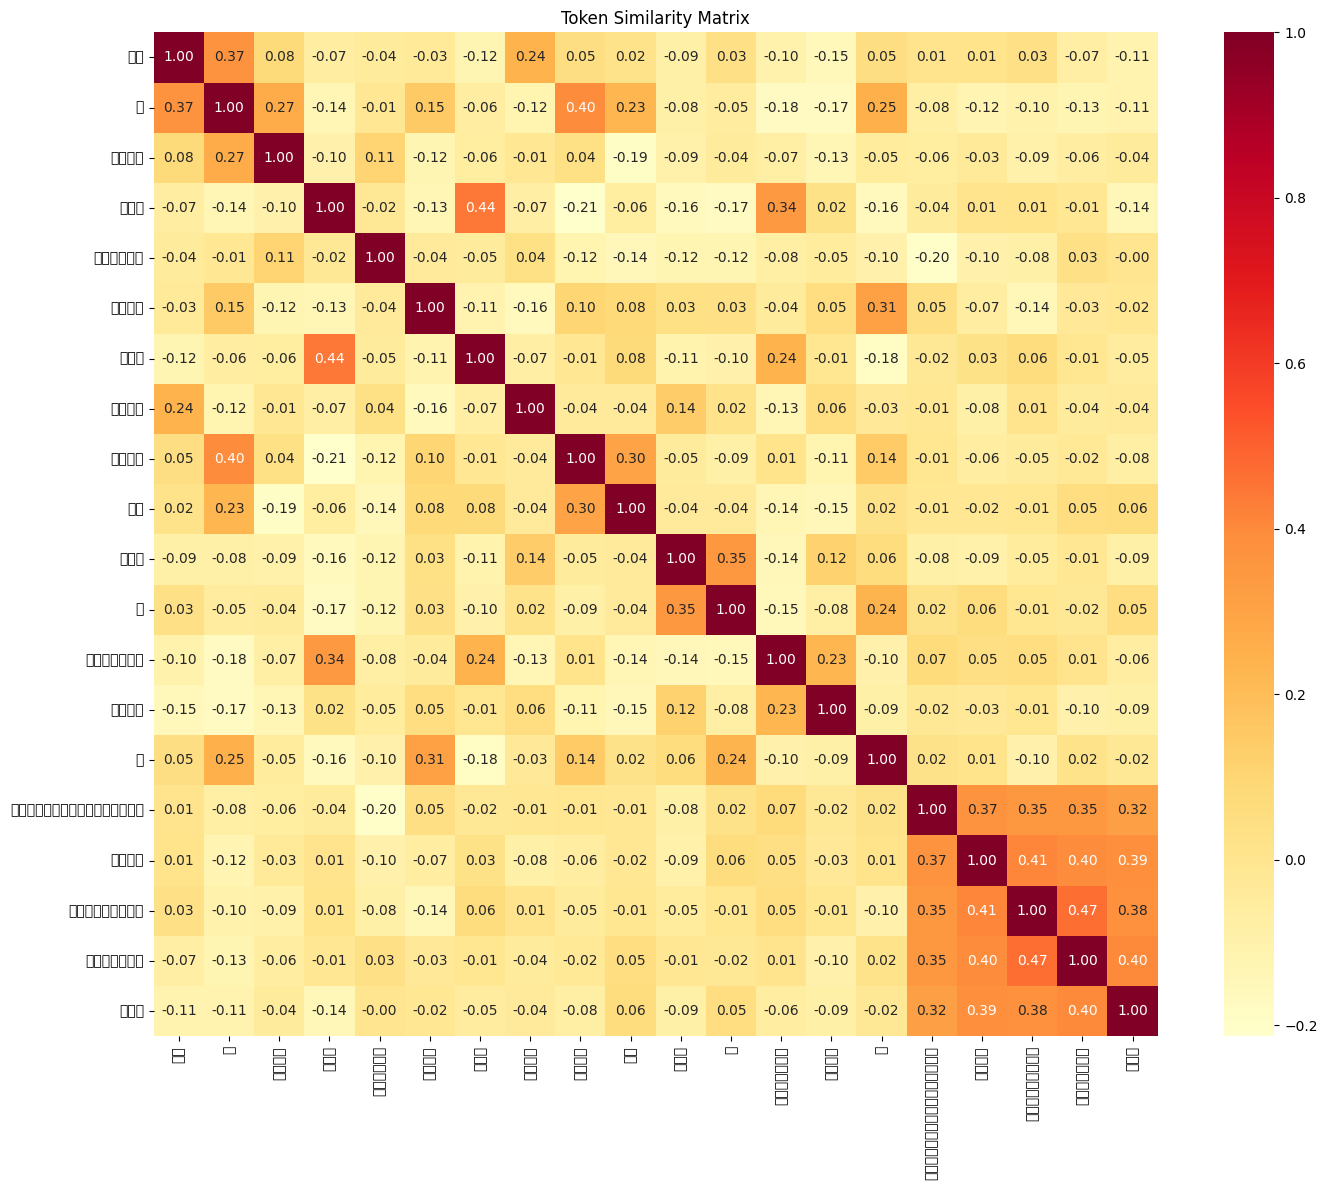

In [ ]:
import numpy as np
import pandas as pd
from typing import Dict, List
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

class SimilarityAnalyzer:
    def __init__(self, embedder: SanskritEmbeddings, n_tokens: int = 20):
        self.embedder = embedder
        self.n_tokens = n_tokens

    def create_similarity_matrix(self) -> pd.DataFrame:
        """Create a similarity matrix for the top N most frequent tokens."""
        # Get most frequent tokens
        tokens = sorted(self.embedder.vocab.items(),
                       key=lambda x: x[1],
                       reverse=True)[:self.n_tokens]
        token_list = [t[0] for t in tokens]

        # Create embedding matrix
        embeddings = np.array([self.embedder.embeddings[token]
                             for token in token_list])

        # Calculate cosine similarity
        similarity_matrix = cosine_similarity(embeddings)

        # Create DataFrame
        return pd.DataFrame(similarity_matrix,
                          index=token_list,
                          columns=token_list)

    def plot_similarity_heatmap(self, figsize=(15, 12)):
        """Plot similarity matrix as a heatmap."""
        similarity_df = self.create_similarity_matrix()

        plt.figure(figsize=figsize)
        sns.heatmap(similarity_df,
                   annot=True,
                   fmt='.2f',
                   cmap='YlOrRd',
                   square=True)
        plt.title('Token Similarity Matrix')
        plt.tight_layout()
        plt.show()

    def get_token_clusters(self, threshold: float = 0.3) -> List[List[str]]:
        """Group tokens into clusters based on similarity threshold."""
        similarity_df = self.create_similarity_matrix()
        clusters = []
        used_tokens = set()

        for token in similarity_df.index:
            if token in used_tokens:
                continue

            # Find similar tokens
            similar_tokens = similarity_df[token][
                similarity_df[token] >= threshold].index.tolist()

            if len(similar_tokens) > 1:  # Only create cluster if more than one token
                clusters.append(similar_tokens)
                used_tokens.update(similar_tokens)

        return clusters

    def print_detailed_similarities(self):
        """Print detailed similarity analysis for each token."""
        similarity_df = self.create_similarity_matrix()

        for token in similarity_df.index:
            # Get similarities sorted in descending order
            similarities = similarity_df[token].sort_values(ascending=False)

            print(f"\nRelationships for '{token}':")
            print("-" * 50)

            # Print top 5 most similar tokens
            for similar_token, score in similarities[1:6].items():
                print(f"→ {similar_token:<20} {score:.4f}")
            print()

# Example usage with your existing embedder
analyzer = SimilarityAnalyzer(embedder, n_tokens=20)

# Print detailed similarity analysis
print("Detailed Token Relationships:")
analyzer.print_detailed_similarities()

# Find and print token clusters
print("\nToken Clusters (similarity threshold = 0.3):")
clusters = analyzer.get_token_clusters(threshold=0.3)
for i, cluster in enumerate(clusters, 1):
    print(f"\nCluster {i}:")
    print(", ".join(cluster))

# Create and show heatmap
print("\nGenerating similarity heatmap...")
analyzer.plot_similarity_heatmap()

In [ ]:
pip install adjustText

Generating interactive t-SNE plot...


/usr/local/lib/python3.11/dist-packages/adjustText/__init__.py:419: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from font(s) DejaVu Sans.
  ax.figure.draw_without_rendering()
/usr/local/lib/python3.11/dist-packages/adjustText/__init__.py:419: UserWarning: Matplotlib currently does not support Devanagari natively.
  ax.figure.draw_without_rendering()
/usr/local/lib/python3.11/dist-packages/adjustText/__init__.py:419: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  ax.figure.draw_without_rendering()
/usr/local/lib/python3.11/dist-packages/adjustText/__init__.py:419: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from font(s) DejaVu Sans.
  ax.figure.draw_without_rendering()
/usr/local/lib/python3.11/dist-packages/adjustText/__init__.py:419: UserWarning: Glyph 2351 (\N{DEVANAGARI LETTER YA}) missing from font(s) DejaVu Sans.
  ax.figure.draw_without_rendering()
/usr/local/lib/python3.11/dist-packages/adjustText/__init__

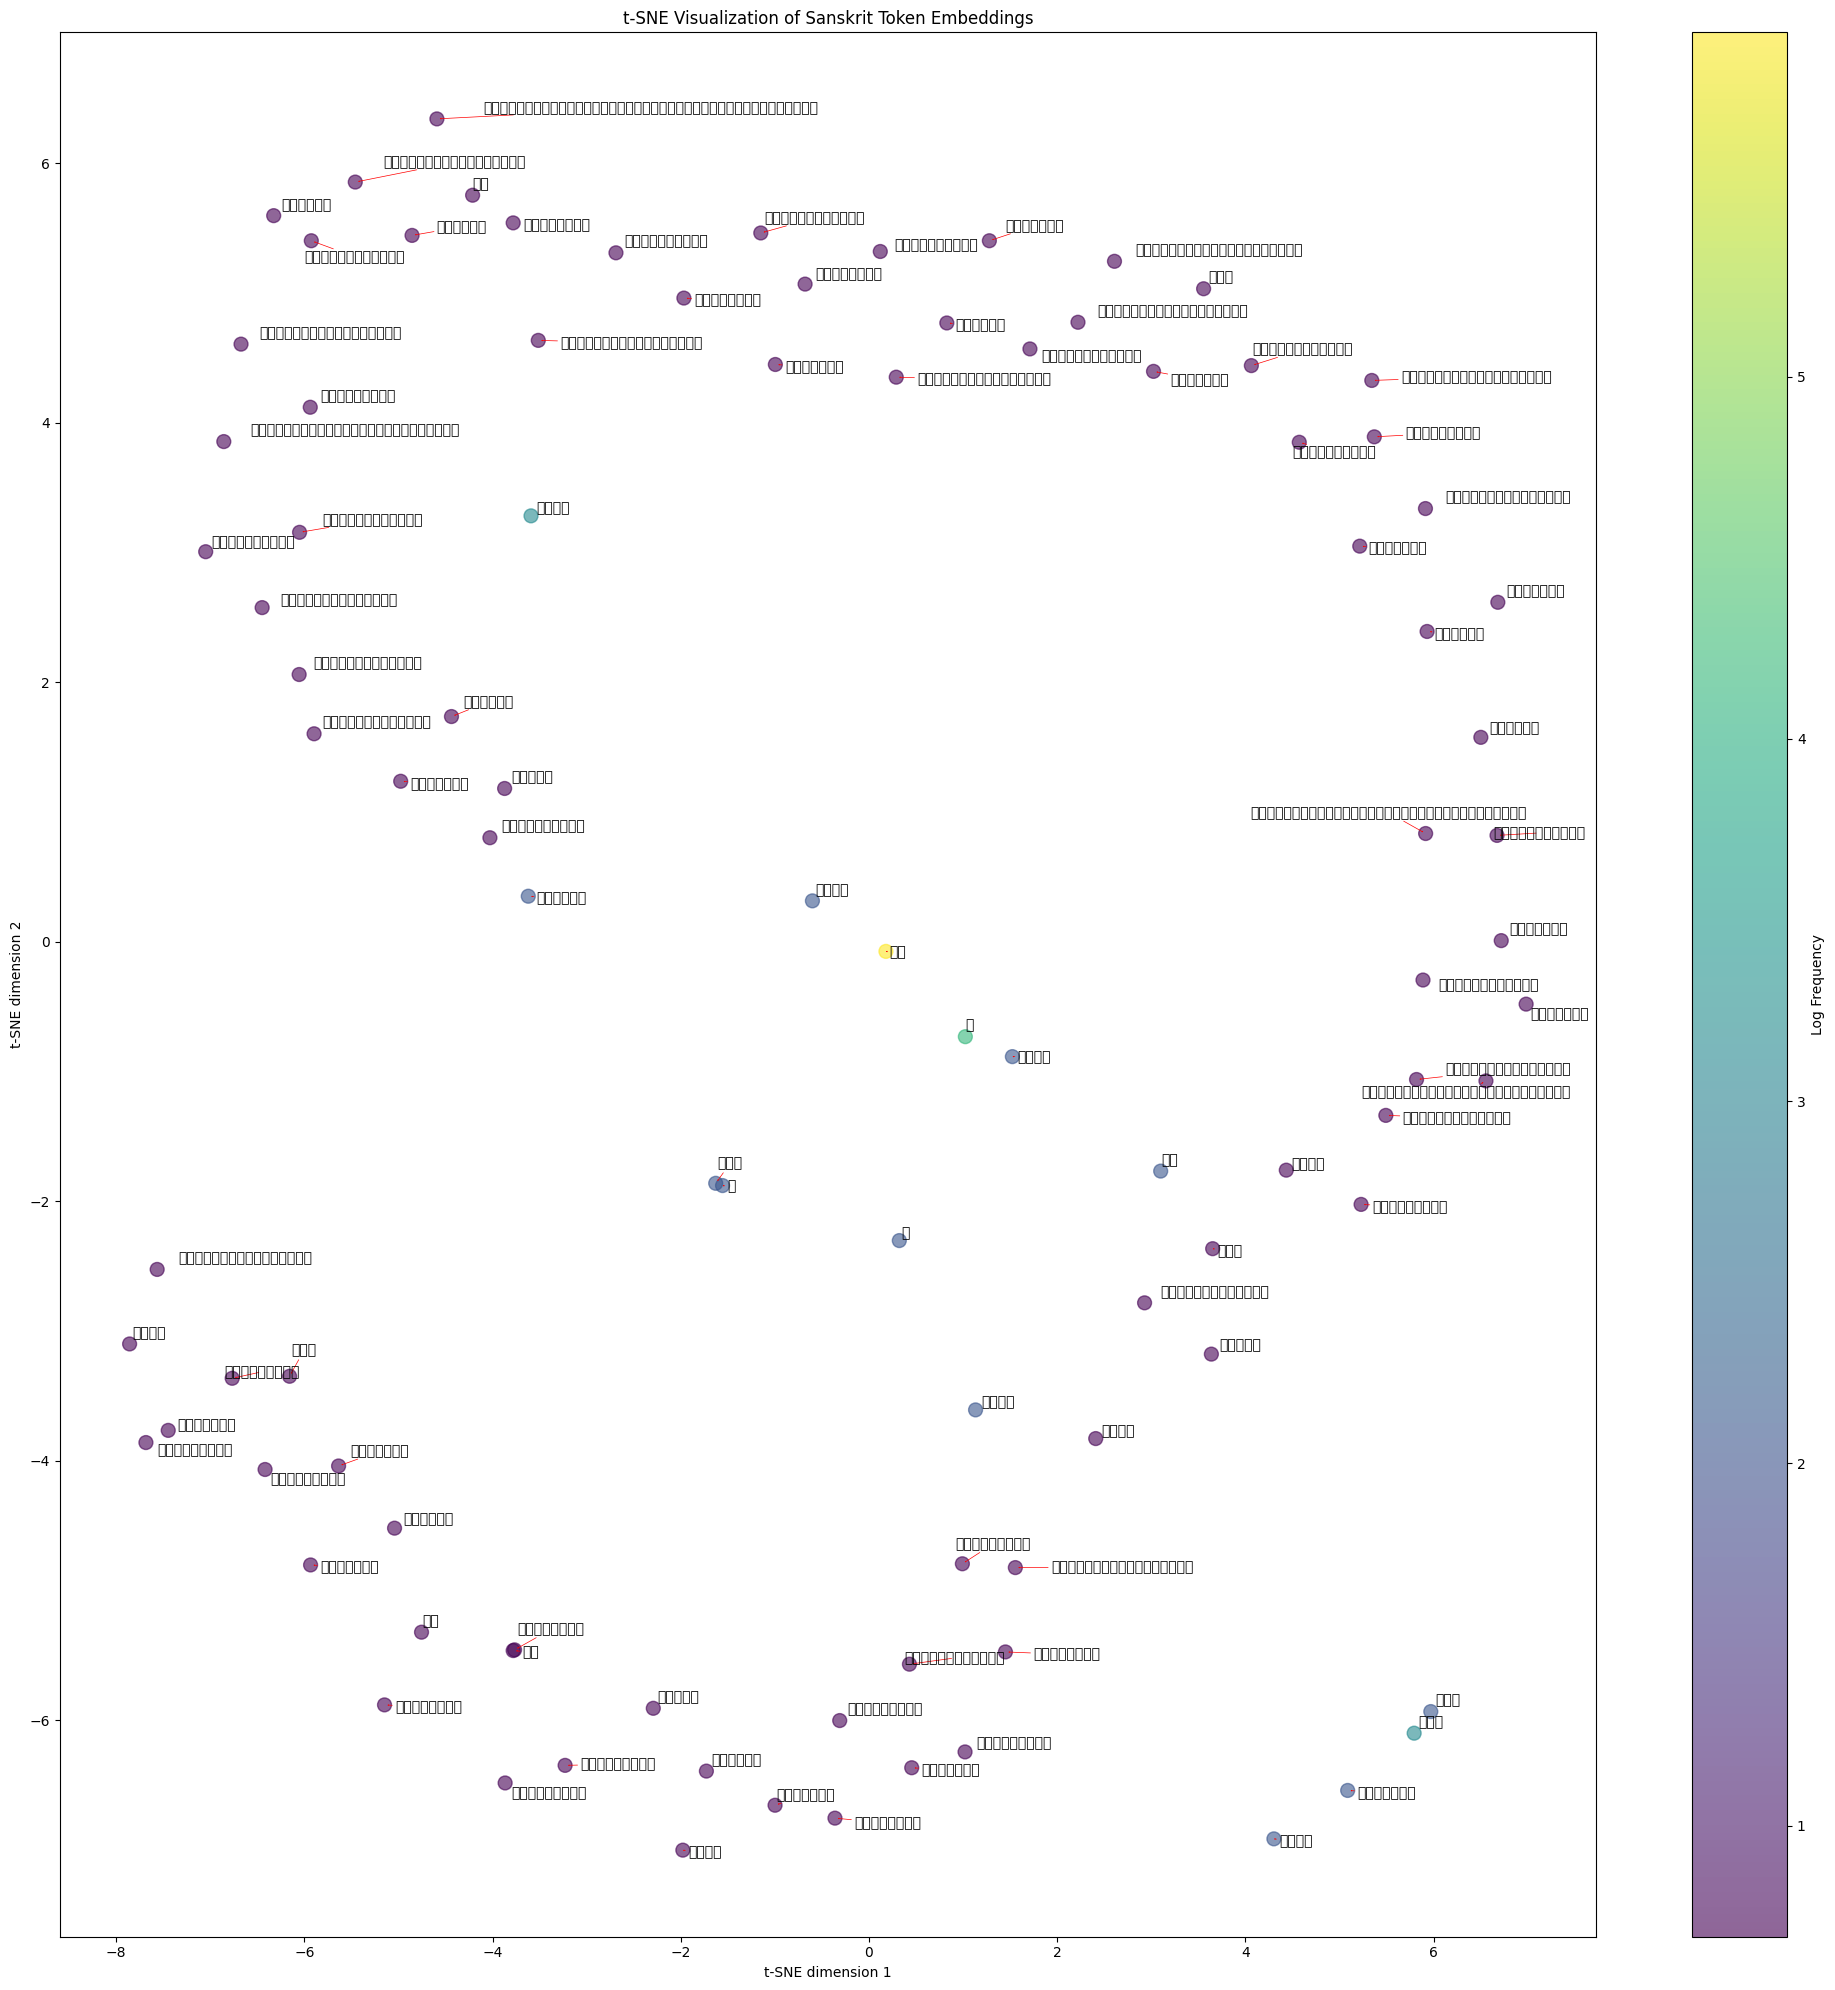


Generating clustered t-SNE plot...


/usr/local/lib/python3.11/dist-packages/adjustText/__init__.py:419: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from font(s) DejaVu Sans.
  ax.figure.draw_without_rendering()
/usr/local/lib/python3.11/dist-packages/adjustText/__init__.py:419: UserWarning: Matplotlib currently does not support Devanagari natively.
  ax.figure.draw_without_rendering()
/usr/local/lib/python3.11/dist-packages/adjustText/__init__.py:419: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  ax.figure.draw_without_rendering()
/usr/local/lib/python3.11/dist-packages/adjustText/__init__.py:419: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from font(s) DejaVu Sans.
  ax.figure.draw_without_rendering()
/usr/local/lib/python3.11/dist-packages/adjustText/__init__.py:419: UserWarning: Glyph 2351 (\N{DEVANAGARI LETTER YA}) missing from font(s) DejaVu Sans.
  ax.figure.draw_without_rendering()
/usr/local/lib/python3.11/dist-packages/adjustText/__init__

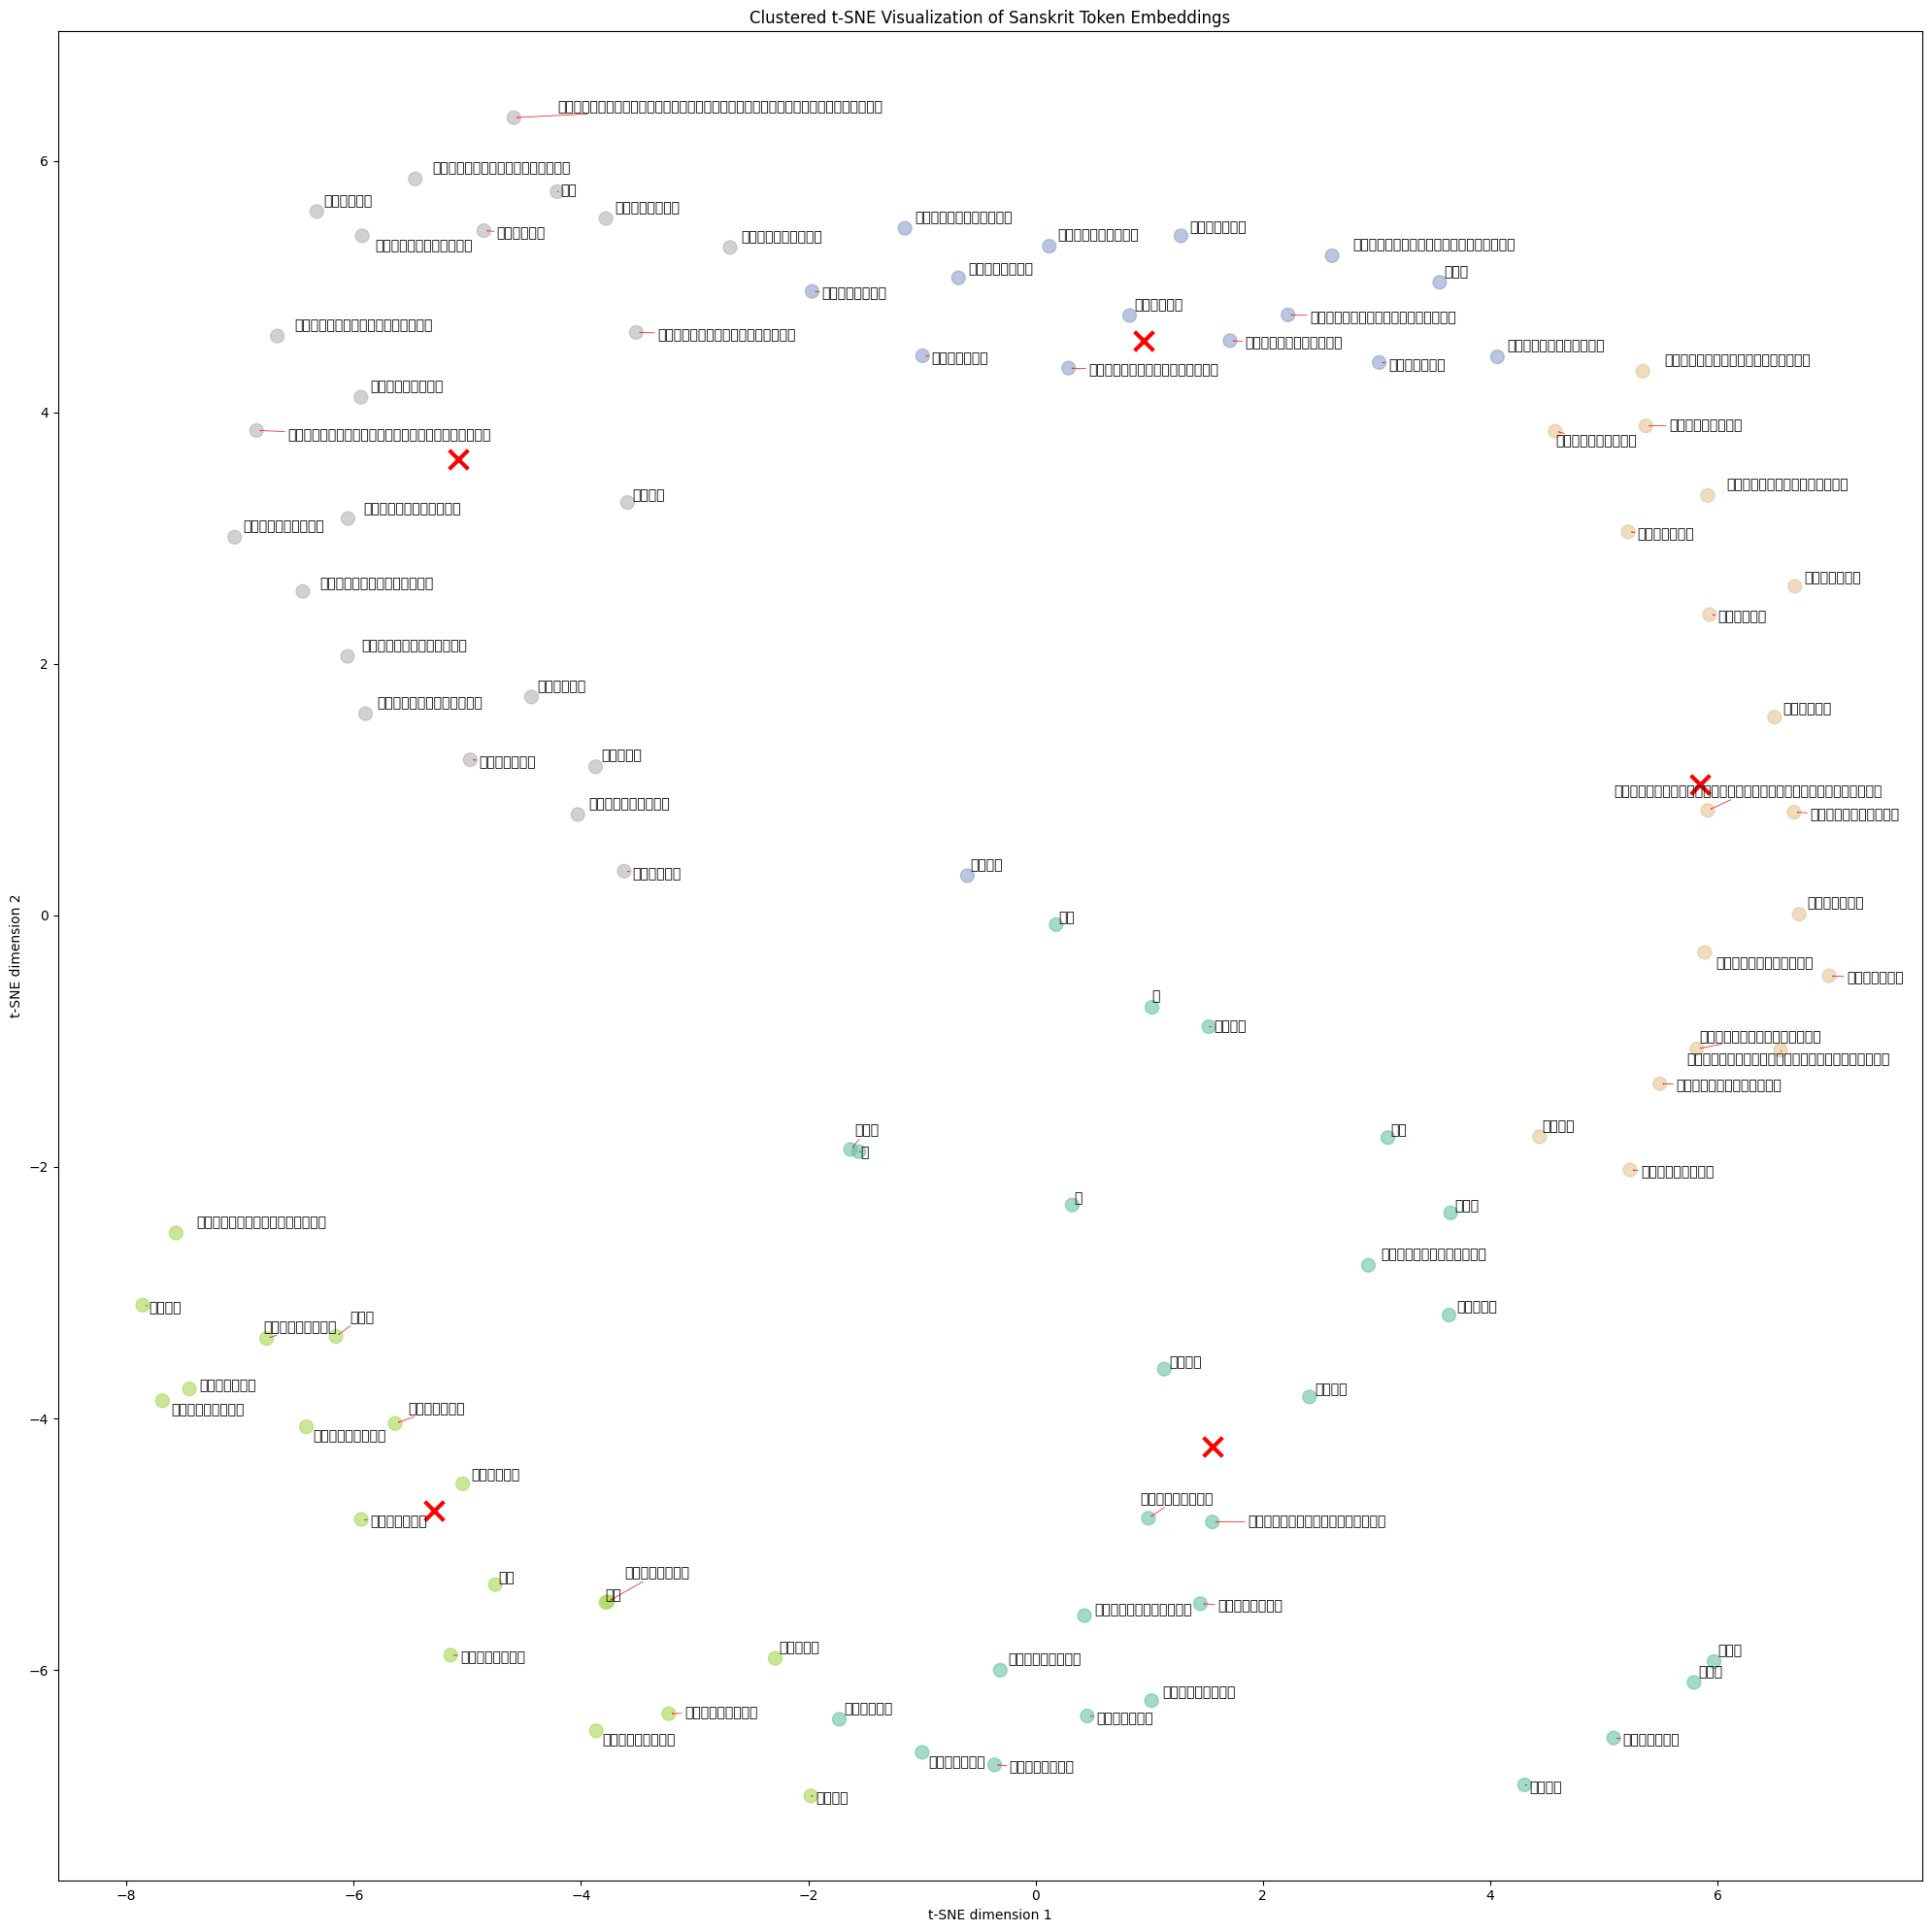


Cluster Analysis:

Cluster 1:
सा, न, तां, यस्य, सती, जगाम, हि, तया, स, प्रपेदे, बभूव, च, स्थिते, दोग्धरि, दोहदक्षे, भास्वन्ति, रत्नानि, महौषधीश्च, पृथूपदिष्टां, दुदुहुर्, धरित्रीम्, अनन्तरत्नप्रभवस्य, हिमं, सौभाग्यविलोपि, जातम्, एको

Cluster 2:
दिने, यस्यातपवन्ति, सिद्धाः, पदं, तुषारस्रुतिधौतारक्तं, यस्मिन्नदृष्ट्वापि, हतद्विपानाम्, विदन्ति, मार्गं, नखरन्ध्रमुक्तैर्, मुक्ताफलैः, केसरीणां, किराताः, न्यस्ताक्षरा, धातुरसेन

Cluster 3:
अस्त्युत्तरस्यां, दिशि, देवतात्मा, हिमालयो, नाम, नगाधिराजः, पूर्वापरौ, तोयनिधी, विगाह्य, स्थितः, पृथिव्या, इव, मानदण्डः, यं, सर्वशैलाः, परिकल्प्य, वत्सं, मेरौ

Cluster 4:
दोषो, गुणसंपाते, निमज्जतीन्दोः, किरणेष्विवाङ्कः, यश्चाप्सरोविभ्रममण्डनानां, संपादयित्रीं, शिखरैर्, बिभर्ति, बलाहकच्छेदविभक्तरागामकालसंध्यामिव, धातुमत्ताम्, आमेखलं, संचरतां, घनानां, छायामधःसानुगतां, निषेव्य, उद्वेजिता, वृष्टिभिराश्रयन्ते, श्रृङ्गाणि

Cluster 5:
यत्र, भवन्ति, भूर्जत्वचः, कुञ्जरबिन्दुशोणाः, व्रजन्ति, विद्याधरसुन्दरीणामनङ्गलेखाक्रियायोपयोगम्, यः, पूरयन्, कीचकरेन्द्रभागान्, दरी

In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List
from adjustText import adjust_text

class TSNEVisualizer:
    def __init__(self, embedder: SanskritEmbeddings, n_tokens: int = 100):
        self.embedder = embedder
        self.n_tokens = n_tokens

    def create_tsne_mapping(self, perplexity: float = 30.0,
                           learning_rate: float = 200.0) -> tuple:
        """Create t-SNE mapping of embeddings."""
        # Get most frequent tokens
        tokens = sorted(self.embedder.vocab.items(),
                       key=lambda x: x[1],
                       reverse=True)[:self.n_tokens]
        token_list = [t[0] for t in tokens]
        frequencies = [t[1] for t in tokens]

        # Create embedding matrix
        embeddings = np.array([self.embedder.embeddings[token]
                             for token in token_list])

        # Apply t-SNE
        tsne = TSNE(n_components=2,
                    perplexity=perplexity,
                    learning_rate=learning_rate,
                    init='pca',
                    random_state=42)

        tsne_coords = tsne.fit_transform(embeddings)

        return tsne_coords, token_list, frequencies

    def plot_tsne_interactive(self, figsize=(20, 20)):
        """Create interactive t-SNE plot with adjustable labels."""
        tsne_coords, tokens, frequencies = self.create_tsne_mapping()

        # Create figure
        plt.figure(figsize=figsize)

        # Create scatter plot
        scatter = plt.scatter(tsne_coords[:, 0],
                            tsne_coords[:, 1],
                            c=np.log(frequencies),  # Color by log frequency
                            cmap='viridis',
                            alpha=0.6,
                            s=100)

        # Add colorbar
        plt.colorbar(scatter, label='Log Frequency')

        # Add labels with adjust_text to prevent overlap
        texts = []
        for i, token in enumerate(tokens):
            texts.append(plt.text(tsne_coords[i, 0],
                                tsne_coords[i, 1],
                                token,
                                fontsize=10))

        # Adjust label positions to minimize overlap
        adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

        plt.title('t-SNE Visualization of Sanskrit Token Embeddings')
        plt.xlabel('t-SNE dimension 1')
        plt.ylabel('t-SNE dimension 2')
        plt.tight_layout()
        plt.show()

    def plot_tsne_clusters(self, n_clusters: int = 5, figsize=(20, 20)):
        """Create t-SNE plot with cluster analysis."""
        from sklearn.cluster import KMeans

        tsne_coords, tokens, frequencies = self.create_tsne_mapping()

        # Apply K-means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(tsne_coords)

        # Create figure
        plt.figure(figsize=figsize)

        # Plot points colored by cluster
        scatter = plt.scatter(tsne_coords[:, 0],
                            tsne_coords[:, 1],
                            c=clusters,
                            cmap='Set2',
                            alpha=0.6,
                            s=100)

        # Add labels with adjust_text
        texts = []
        for i, token in enumerate(tokens):
            texts.append(plt.text(tsne_coords[i, 0],
                                tsne_coords[i, 1],
                                token,
                                fontsize=10))

        # Adjust label positions
        adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

        # Add cluster centers
        centers = kmeans.cluster_centers_
        plt.scatter(centers[:, 0], centers[:, 1],
                   c='red', marker='x', s=200, linewidths=3)

        plt.title('Clustered t-SNE Visualization of Sanskrit Token Embeddings')
        plt.xlabel('t-SNE dimension 1')
        plt.ylabel('t-SNE dimension 2')
        plt.tight_layout()
        plt.show()

        # Print cluster contents
        print("\nCluster Analysis:")
        for i in range(n_clusters):
            cluster_tokens = [tokens[j] for j in range(len(tokens))
                            if clusters[j] == i]
            print(f"\nCluster {i+1}:")
            print(", ".join(cluster_tokens))

    def analyze_local_structure(self, n_neighbors: int = 5):
        """Analyze local neighborhood structure in t-SNE space."""
        tsne_coords, tokens, _ = self.create_tsne_mapping()

        # Calculate pairwise distances in t-SNE space
        from scipy.spatial.distance import pdist, squareform
        distances = squareform(pdist(tsne_coords))

        # For each point, find nearest neighbors
        for i, token in enumerate(tokens):
            # Get indices of nearest neighbors
            nearest = np.argsort(distances[i])[1:n_neighbors+1]

            print(f"\nNearest neighbors to '{token}':")
            for idx in nearest:
                distance = distances[i][idx]
                print(f"  {tokens[idx]:<20} (distance: {distance:.4f})")

# Example usage
visualizer = TSNEVisualizer(embedder, n_tokens=100)

# Create interactive t-SNE plot
print("Generating interactive t-SNE plot...")
visualizer.plot_tsne_interactive()

# Create clustered t-SNE plot
print("\nGenerating clustered t-SNE plot...")
visualizer.plot_tsne_clusters(n_clusters=5)

# Analyze local structure
print("\nAnalyzing local neighborhood structure...")
visualizer.analyze_local_structure()

In [ ]:
import numpy as np
from collections import defaultdict
from typing import Dict, Tuple
import math

class GloVeSanskritEmbeddings:
    def __init__(self, dimension: int = 512, window_size: int = 5, x_max: int = 100, alpha: float = 0.75):
        self.dimension = dimension
        self.window_size = window_size
        self.x_max = x_max  # Parameter for weighting function
        self.alpha = alpha  # Parameter for weighting function
        self.cooccurrence_matrix = defaultdict(lambda: defaultdict(float))
        self.vocab = defaultdict(int)
        self.word_vectors = {}      # Target vectors
        self.context_vectors = {}   # Context vectors
        self.word_biases = {}      # Target biases
        self.context_biases = {}    # Context biases

    def build_vocabulary(self, tokens_with_freq: Dict[str, int]):
        """Initialize vocabulary from BPE tokens."""
        self.vocab = tokens_with_freq.copy()

        # Initialize vectors and biases
        for token in self.vocab:
            limit = 0.5 / self.dimension
            self.word_vectors[token] = np.random.uniform(
                -limit, limit, (self.dimension,))
            self.context_vectors[token] = np.random.uniform(
                -limit, limit, (self.dimension,))
            self.word_biases[token] = 0.0
            self.context_biases[token] = 0.0

    def build_cooccurrence_matrix(self, text: str):
        """Build co-occurrence matrix with distance-based weighting."""
        tokens = text.split()

        for i, target in enumerate(tokens):
            if target not in self.vocab:
                continue

            # Context window with distance-based weighting
            start = max(0, i - self.window_size)
            end = min(len(tokens), i + self.window_size + 1)

            for j, context in enumerate(tokens[start:end], start=start):
                if i != j and context in self.vocab:
                    # Calculate distance-based weight
                    distance = abs(i - j)
                    weight = 1.0 / distance

                    self.cooccurrence_matrix[target][context] += weight

    def weighting_function(self, x: float) -> float:
        """GloVe weighting function."""
        if x < self.x_max:
            return (x / self.x_max) ** self.alpha
        return 1.0

    def train(self, n_epochs: int = 25, learning_rate: float = 0.05):
        """Train embeddings using GloVe-style optimization."""
        print("Starting GloVe-style training...")

        for epoch in range(n_epochs):
            total_loss = 0.0

            # Iterate over all word pairs in co-occurrence matrix
            for target in self.cooccurrence_matrix:
                for context, count in self.cooccurrence_matrix[target].items():
                    # Get current vectors and biases
                    w_i = self.word_vectors[target]
                    w_j = self.context_vectors[context]
                    b_i = self.word_biases[target]
                    b_j = self.context_biases[context]

                    # Calculate weight for this pair
                    weight = self.weighting_function(count)

                    # Calculate prediction and error
                    prediction = np.dot(w_i, w_j) + b_i + b_j
                    error = prediction - np.log(count + 1)

                    # Calculate cost
                    cost = weight * (error ** 2)
                    total_loss += cost

                    # Calculate gradients
                    grad_mul = weight * error
                    grad_w_i = grad_mul * w_j
                    grad_w_j = grad_mul * w_i
                    grad_b_i = grad_mul
                    grad_b_j = grad_mul

                    # Update vectors and biases
                    self.word_vectors[target] -= learning_rate * grad_w_i
                    self.context_vectors[context] -= learning_rate * grad_w_j
                    self.word_biases[target] -= learning_rate * grad_b_i
                    self.context_biases[context] -= learning_rate * grad_b_j

            # Print progress
            if (epoch + 1) % 5 == 0:
                print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {total_loss:.4f}")

    def get_final_embeddings(self) -> Dict[str, np.ndarray]:
        """Get final embeddings by adding word and context vectors."""
        final_embeddings = {}
        for token in self.vocab:
            final_embeddings[token] = (
                self.word_vectors[token] + self.context_vectors[token])
            # Normalize vector
            final_embeddings[token] /= np.linalg.norm(
                final_embeddings[token]) + 1e-8
        return final_embeddings

    def get_similar_tokens(self, token: str, n: int = 5) -> List[Tuple[str, float]]:
        """Find n most similar tokens using cosine similarity."""
        embeddings = self.get_final_embeddings()
        if token not in embeddings:
            return []

        target_vec = embeddings[token]
        similarities = []

        for other_token, other_vec in embeddings.items():
            if other_token != token:
                sim = np.dot(target_vec, other_vec)
                similarities.append((other_token, sim))

        return sorted(similarities, key=lambda x: x[1], reverse=True)[:n]

# Example usage
def create_glove_embeddings(text: str, final_vocab: Dict[str, int],
                          dimension: int = 512) -> GloVeSanskritEmbeddings:
    """Create GloVe-style embeddings from BPE tokens."""
    embedder = GloVeSanskritEmbeddings(dimension=dimension)
    embedder.build_vocabulary(final_vocab)
    embedder.build_cooccurrence_matrix(text)
    embedder.train()
    return embedder

# Use the embedder
glove_embedder = create_glove_embeddings(text, final_vocab)

# Print similar tokens
print("\nSimilar tokens using GloVe-style embeddings:")
for token in list(final_vocab.keys())[:5]:
    print(f"\nSimilar tokens to '{token}':")
    similar_tokens = glove_embedder.get_similar_tokens(token)
    for similar_token, similarity in similar_tokens:
        print(f"{similar_token}: {similarity:.4f}")

Starting GloVe-style training...
Epoch 5/25, Loss: 12.9285
Epoch 10/25, Loss: 11.0863
Epoch 15/25, Loss: 9.6123
Epoch 20/25, Loss: 8.4208
Epoch 25/25, Loss: 7.4497

Similar tokens using GloVe-style embeddings:

Similar tokens to 'अस्त्युत्तरस्यां':
रेमे: 0.1277
तच्चरणौ: 0.1207
त्रिदिवस्य: 0.1197
तज्जन्मदिनं: 0.1111
देवतात्मा: 0.1056

Similar tokens to 'दिशि':
दिवा: 0.1283
तस्याः: 0.1145
ममत्वमुच्चैःशिरसां: 0.1077
हिमालयो: 0.1041
भव्याः: 0.1030

Similar tokens to 'देवतात्मा':
चकासे: 0.1339
अव्यवस्थाम्: 0.1131
तूलिकयेव: 0.1067
व्रजन्ति: 0.1060
अस्त्युत्तरस्यां: 0.1056

Similar tokens to 'हिमालयो':
संपादयित्रीं: 0.1203
मण्डनमङ्गयष्टेरनासवाख्यं: 0.1152
यत्रांशुकाक्षेपविलज्जितानां: 0.1148
तज्जन्मदिनं: 0.1118
मार्गे: 0.1103

Similar tokens to 'नाम':
शरणं: 0.1240
सिद्धाः: 0.1156
सप्तर्षिहस्तावचितावशेषाण्यधो: 0.1098
यत्र: 0.1089
भूधराणामधिपेन: 0.1077


Plotting all tokens...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/adjustText/__init__.py:419: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from font(s) DejaVu Sans.
  ax.figure.draw_without_rendering()
/usr/local/lib/python3.11/dist-packages/adjustText/__init__.py:419: UserWarning: Matplotlib currently does not support Devanagari natively.
  ax.figure.draw_without_rendering()
/usr/local/lib/python3.11/dist-packages/adjustText/__init__.py:419: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from font(s) DejaVu Sans.
  ax.figure.draw_without_rendering()
/usr/local/lib/python3.11/dist-packages/adjustText/__init__.py:419: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  ax.figure.draw_without_rendering()
/usr/local/lib/python3.11/dist-packages/adjustText/__init__.py:419: U

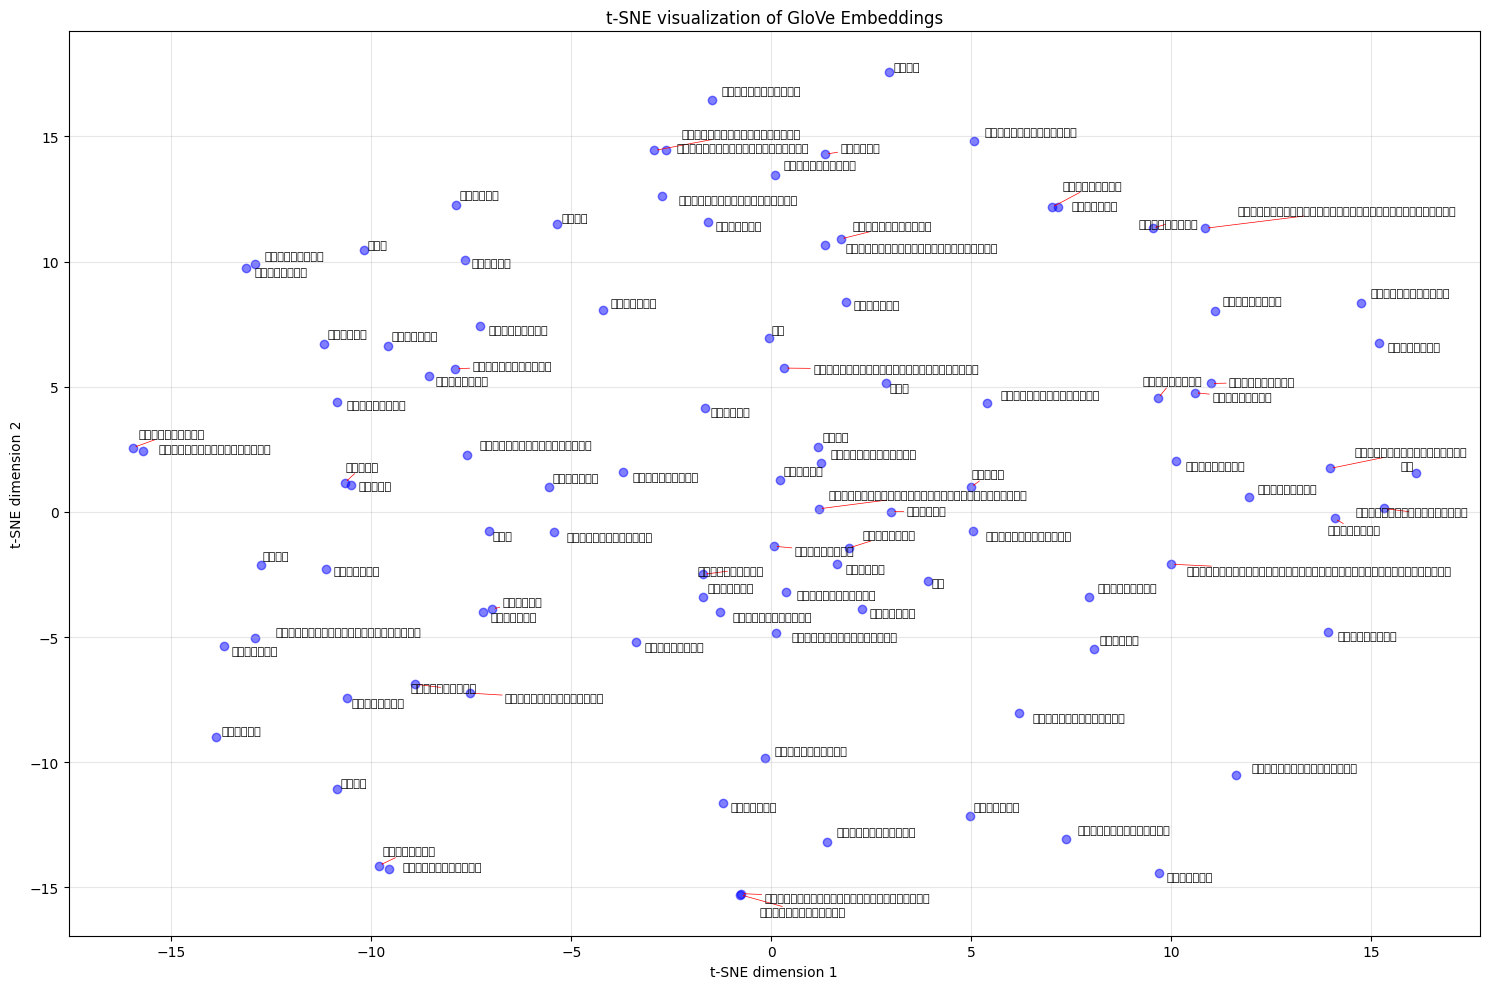


Plotting example tokens with their neighbors...


<ipython-input-7-70008176c33d>:154: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-70008176c33d>:154: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
<ipython-input-7-70008176c33d>:154: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-70008176c33d>:154: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-70008176c33d>:154: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-70008176c33d>:154: UserWarning: Glyph 2351 (\N{DEVANAGARI LETTER YA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-70008176c33d>:154: UserWarning: Glyph 2369 (\N{DEVANAGARI VOWEL SIGN U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-

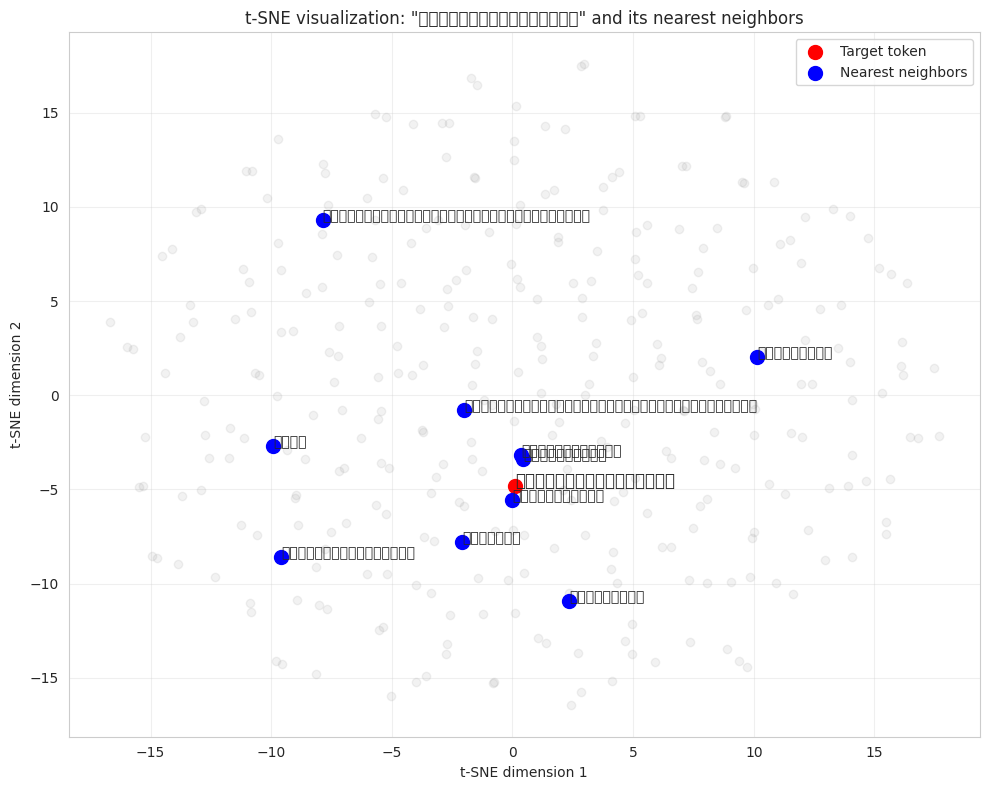

<ipython-input-7-70008176c33d>:154: UserWarning: Glyph 2379 (\N{DEVANAGARI VOWEL SIGN O}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-70008176c33d>:154: UserWarning: Glyph 2335 (\N{DEVANAGARI LETTER TTA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-70008176c33d>:154: UserWarning: Glyph 2319 (\N{DEVANAGARI LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


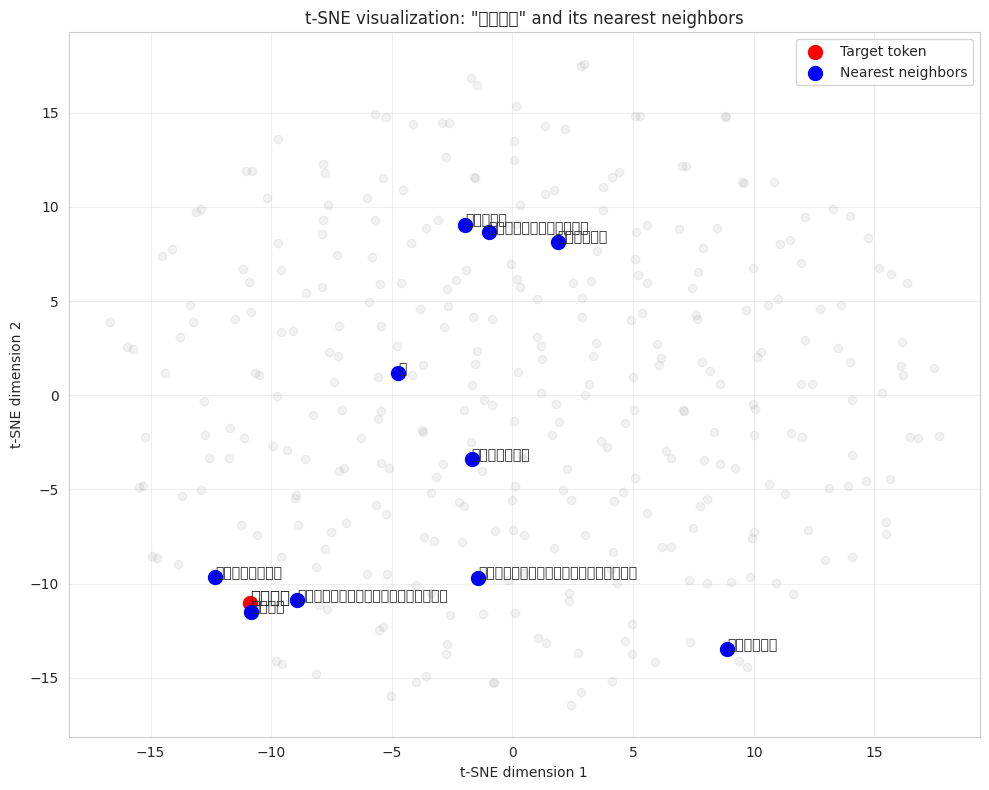

<ipython-input-7-70008176c33d>:154: UserWarning: Glyph 2341 (\N{DEVANAGARI LETTER THA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-70008176c33d>:154: UserWarning: Glyph 2329 (\N{DEVANAGARI LETTER NGA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-70008176c33d>:154: UserWarning: Glyph 2327 (\N{DEVANAGARI LETTER GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-7-70008176c33d>:154: UserWarning: Glyph 2326 (\N{DEVANAGARI LETTER KHA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


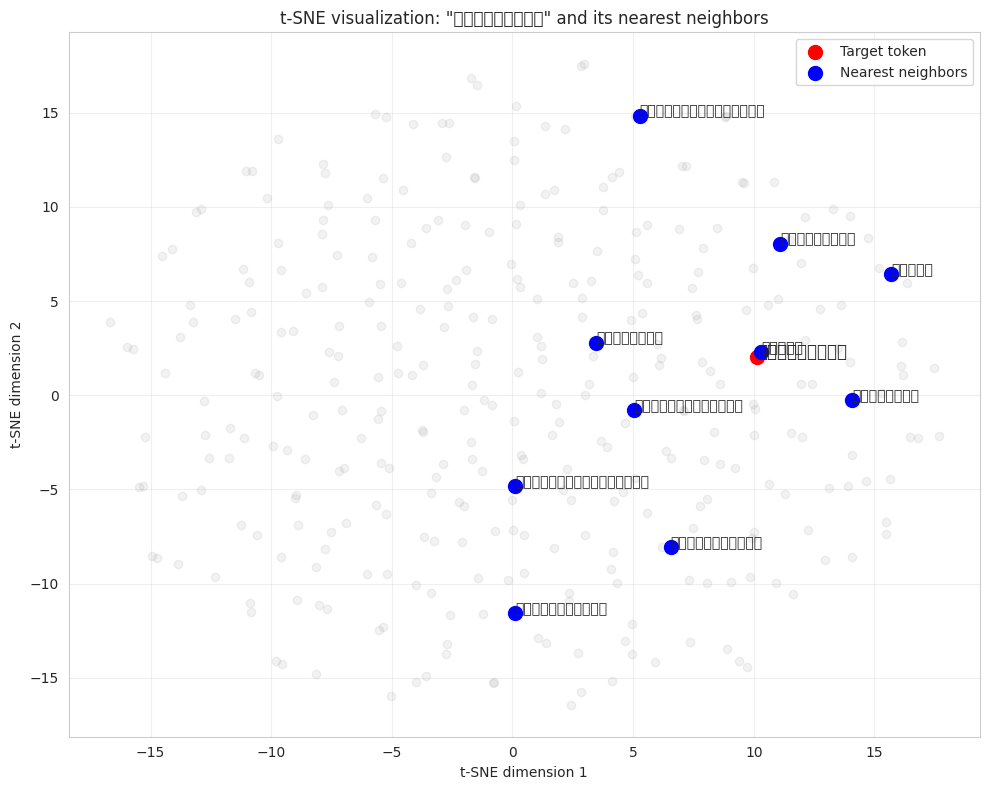

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List
from adjustText import adjust_text

class TSNEVisualizer:
    def __init__(self, embeddings: Dict[str, np.ndarray], perplexity: int = 30, n_iter: int = 1000):
        """
        Initialize TSNEVisualizer with embeddings

        Args:
            embeddings: Dictionary mapping tokens to their embedding vectors
            perplexity: t-SNE perplexity parameter
            n_iter: Number of iterations for t-SNE optimization
        """
        self.embeddings = embeddings
        self.perplexity = perplexity
        self.n_iter = n_iter
        self.tsne = None
        self.tsne_results = None
        self.tokens = None

    def fit_transform(self):
        """Fit t-SNE on the embeddings and transform them to 2D."""
        # Get tokens and vectors
        self.tokens = list(self.embeddings.keys())
        vectors = np.stack([self.embeddings[token] for token in self.tokens])

        # Initialize and fit t-SNE
        self.tsne = TSNE(
            n_components=2,
            perplexity=self.perplexity,
            n_iter=self.n_iter,
            random_state=42
        )
        self.tsne_results = self.tsne.fit_transform(vectors)
        return self.tsne_results

    def plot(self, n_tokens: int = 100, figsize: tuple = (15, 10),
             adjust_labels: bool = True, font_size: int = 8):
        """
        Plot t-SNE results

        Args:
            n_tokens: Number of tokens to plot (most frequent ones)
            figsize: Figure size
            adjust_labels: Whether to adjust label positions to avoid overlap
            font_size: Font size for token labels
        """
        if self.tsne_results is None:
            self.fit_transform()

        # Create figure
        plt.figure(figsize=figsize)

        # Plot points
        x = self.tsne_results[:n_tokens, 0]
        y = self.tsne_results[:n_tokens, 1]
        plt.scatter(x, y, c='b', alpha=0.5)

        # Add labels
        texts = []
        for i, token in enumerate(self.tokens[:n_tokens]):
            texts.append(plt.text(x[i], y[i], token, fontsize=font_size))

        # Adjust label positions if requested
        if adjust_labels:
            adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red', lw=0.5))

        plt.title('t-SNE visualization of GloVe Embeddings')
        plt.xlabel('t-SNE dimension 1')
        plt.ylabel('t-SNE dimension 2')

        # Add style
        sns.set_style("whitegrid")
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def plot_similar_tokens(self, token: str, n_neighbors: int = 10,
                          figsize: tuple = (10, 8)):
        """
        Plot t-SNE results highlighting a specific token and its neighbors

        Args:
            token: Token to highlight
            n_neighbors: Number of nearest neighbors to highlight
            figsize: Figure size
        """
        if token not in self.embeddings:
            print(f"Token '{token}' not found in embeddings")
            return

        if self.tsne_results is None:
            self.fit_transform()

        # Find token index
        token_idx = self.tokens.index(token)

        # Find nearest neighbors
        token_vec = self.embeddings[token]
        similarities = []
        for other_token in self.tokens:
            if other_token != token:
                other_vec = self.embeddings[other_token]
                sim = np.dot(token_vec, other_vec)
                similarities.append((other_token, sim))

        neighbor_tokens = [t for t, _ in sorted(similarities,
                                              key=lambda x: x[1],
                                              reverse=True)[:n_neighbors]]
        neighbor_indices = [self.tokens.index(t) for t in neighbor_tokens]

        # Plot
        plt.figure(figsize=figsize)

        # Plot all points in grey
        plt.scatter(self.tsne_results[:, 0], self.tsne_results[:, 1],
                   c='grey', alpha=0.1)

        # Highlight target token
        plt.scatter(self.tsne_results[token_idx, 0],
                   self.tsne_results[token_idx, 1],
                   c='red', s=100, label='Target token')

        # Highlight neighbors
        plt.scatter(self.tsne_results[neighbor_indices, 0],
                   self.tsne_results[neighbor_indices, 1],
                   c='blue', s=100, label='Nearest neighbors')

        # Add labels
        plt.annotate(token,
                    (self.tsne_results[token_idx, 0],
                     self.tsne_results[token_idx, 1]),
                    fontsize=12, fontweight='bold')

        for idx in neighbor_indices:
            plt.annotate(self.tokens[idx],
                        (self.tsne_results[idx, 0],
                         self.tsne_results[idx, 1]),
                        fontsize=10)

        plt.title(f't-SNE visualization: "{token}" and its nearest neighbors')
        plt.xlabel('t-SNE dimension 1')
        plt.ylabel('t-SNE dimension 2')
        plt.legend()

        sns.set_style("whitegrid")
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# Example usage with the GloVe embeddings:
def visualize_embeddings(glove_embedder, n_tokens=100):
    """Create and display t-SNE visualization of embeddings."""
    embeddings = glove_embedder.get_final_embeddings()

    # Initialize visualizer
    tsne_viz = TSNEVisualizer(embeddings)

    # Plot all tokens
    print("Plotting all tokens...")
    tsne_viz.plot(n_tokens=n_tokens)

    # Plot similar tokens for a few examples
    print("\nPlotting example tokens with their neighbors...")
    for token in list(embeddings.keys())[:3]:
        tsne_viz.plot_similar_tokens(token)

# Use with existing glove_embedder
visualize_embeddings(glove_embedder)

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2344 (\N{DEVANAGARI LETTER NA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2351 (\N{DEVANAGARI LETTER YA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/li

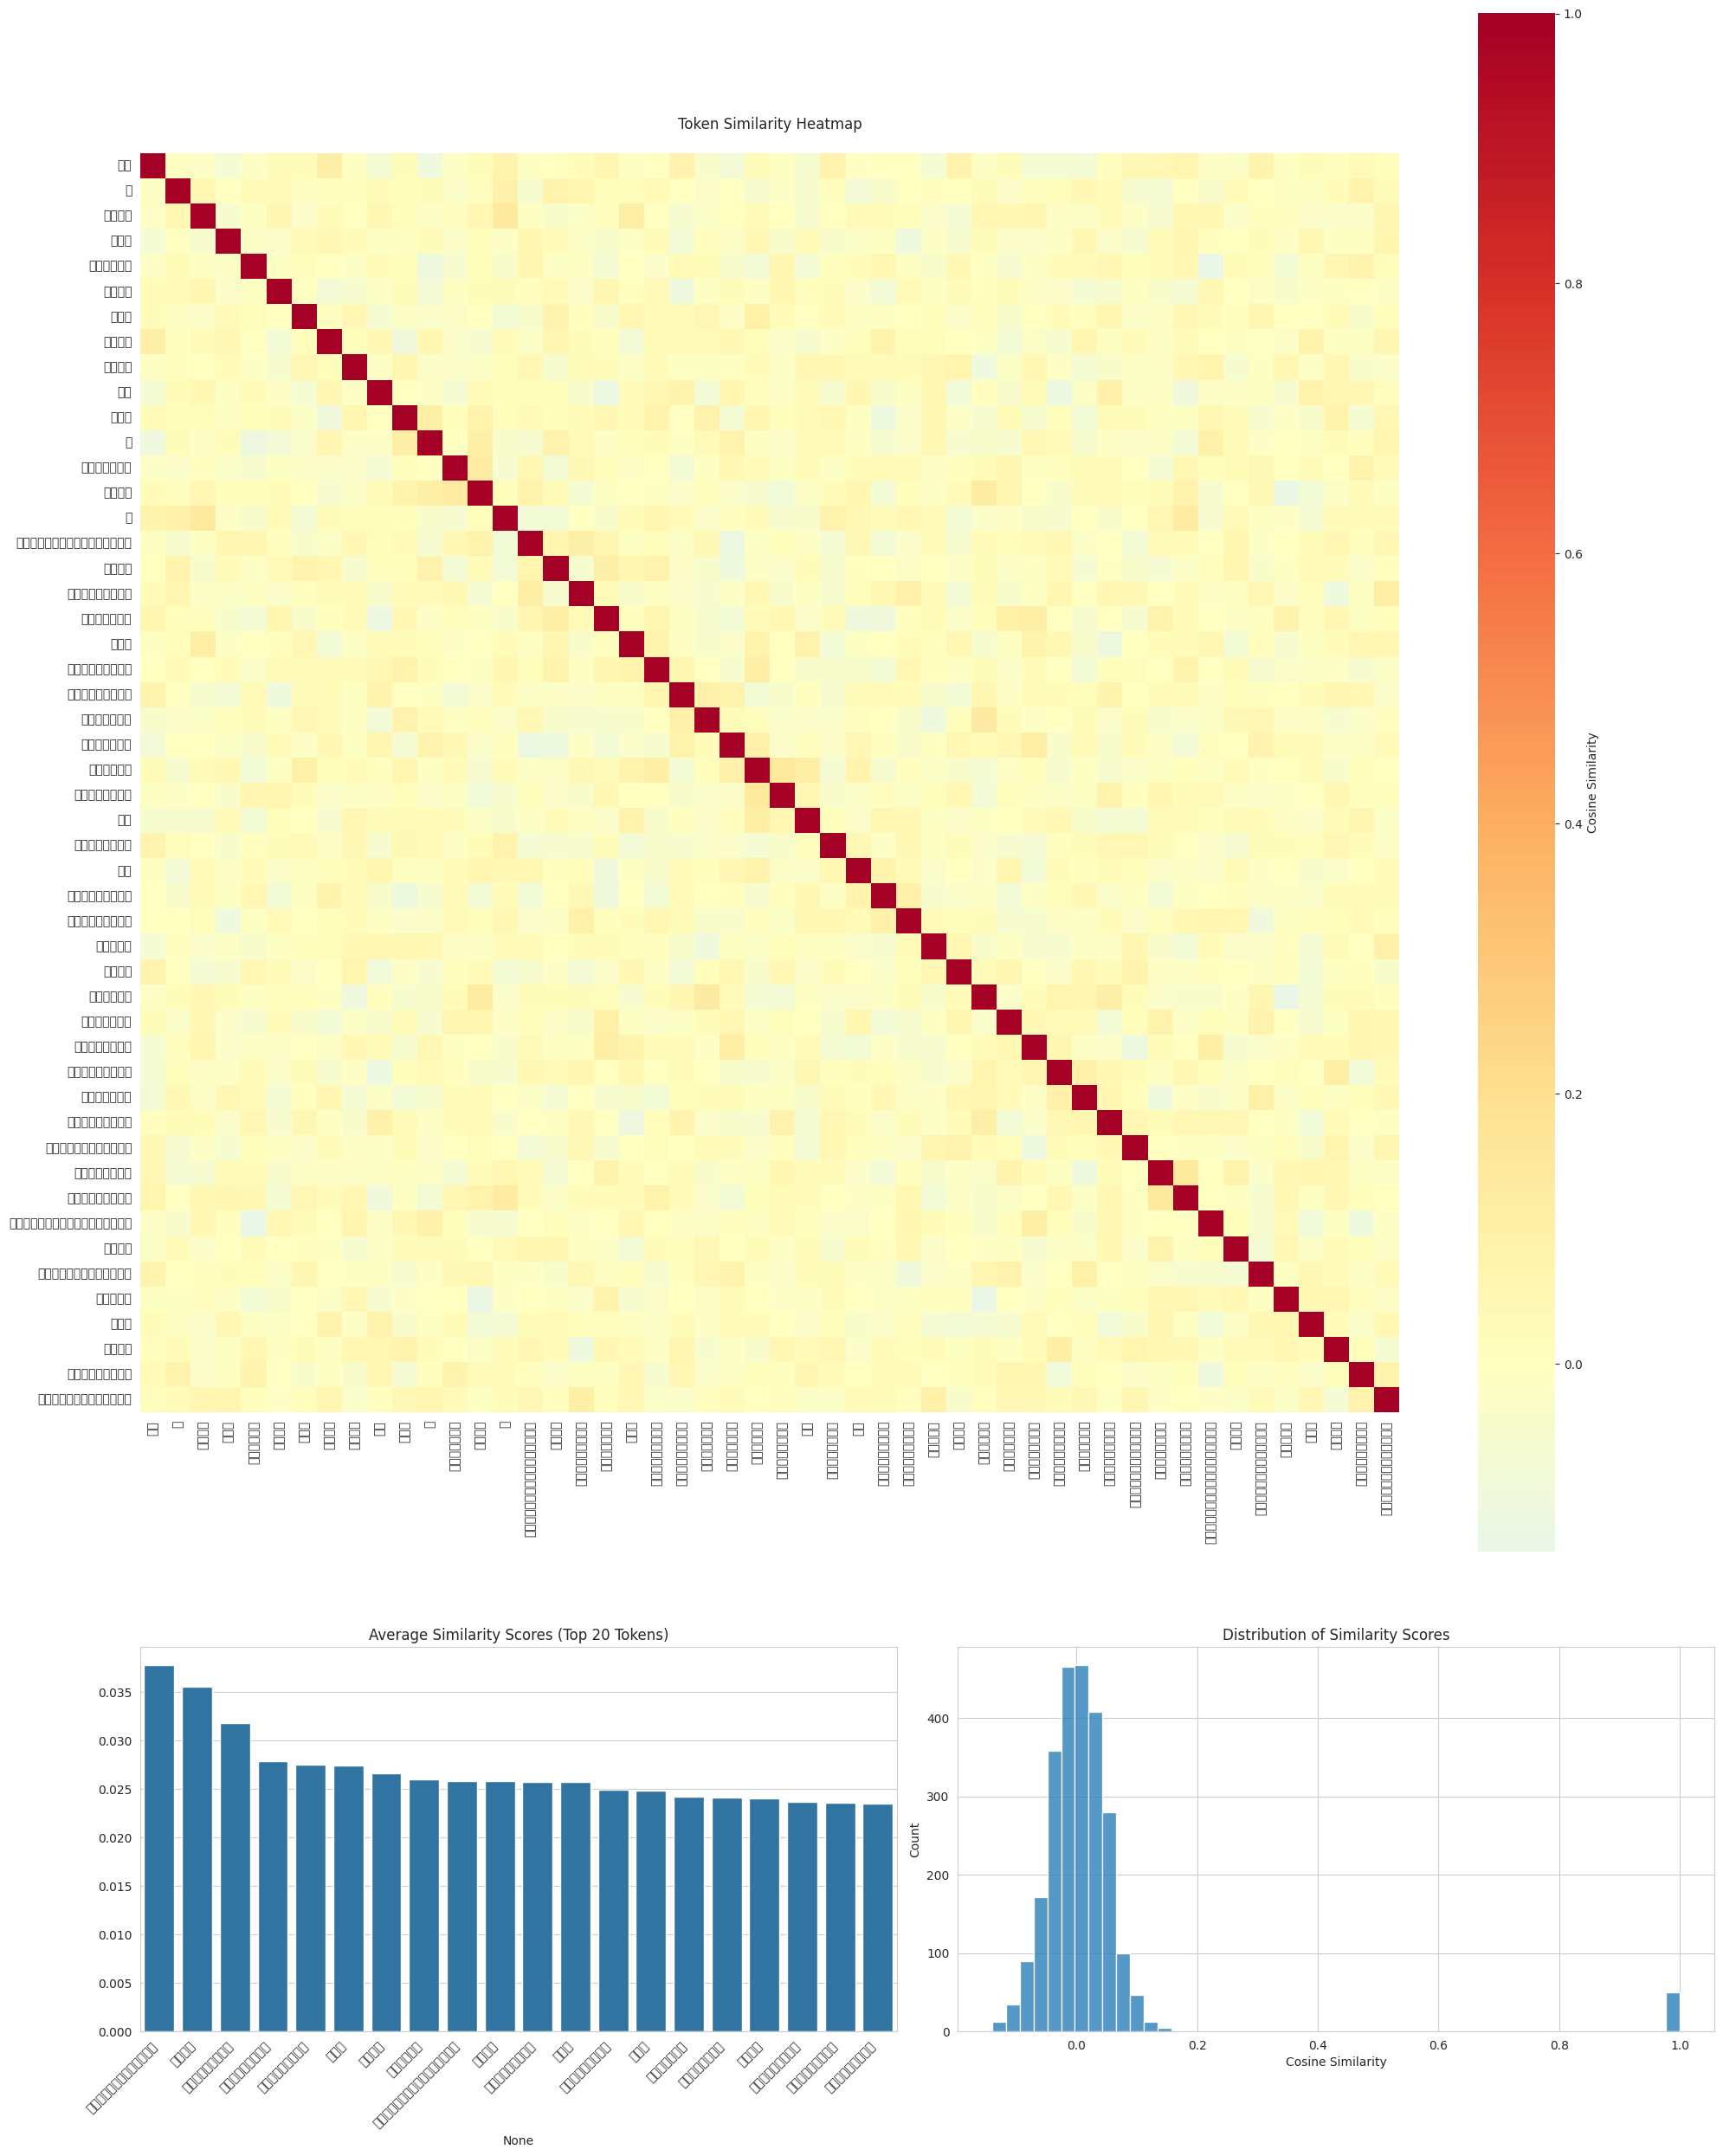


Token Cluster Analysis:


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from typing import Dict, List
import matplotlib.gridspec as gridspec

class GloVeVisualizer:
    def __init__(self, glove_embedder: GloVeSanskritEmbeddings, n_tokens: int = 50):
        self.embedder = glove_embedder
        self.n_tokens = n_tokens
        self.embeddings = self.embedder.get_final_embeddings()

    def create_large_similarity_matrix(self) -> pd.DataFrame:
        """Create a larger similarity matrix for visualization."""
        # Get most frequent tokens
        tokens = sorted(self.embedder.vocab.items(),
                       key=lambda x: x[1],
                       reverse=True)[:self.n_tokens]
        token_list = [t[0] for t in tokens]

        # Create embedding matrix
        embeddings = np.array([self.embeddings[token] for token in token_list])

        # Calculate cosine similarity
        similarity_matrix = cosine_similarity(embeddings)

        return pd.DataFrame(similarity_matrix,
                          index=token_list,
                          columns=token_list)

    def plot_comprehensive_heatmap(self, figsize=(20, 25)):
        """Create a comprehensive visualization with multiple views."""
        similarity_df = self.create_large_similarity_matrix()

        # Create figure with GridSpec
        fig = plt.figure(figsize=figsize)
        gs = gridspec.GridSpec(2, 2, height_ratios=[4, 1])

        # Main heatmap
        ax0 = plt.subplot(gs[0, :])
        sns.heatmap(similarity_df,
                   cmap='RdYlBu_r',
                   center=0,
                   square=True,
                   ax=ax0,
                   cbar_kws={'label': 'Cosine Similarity'})
        ax0.set_title('Token Similarity Heatmap', pad=20)

        # Average similarity per token
        ax1 = plt.subplot(gs[1, 0])
        avg_similarities = similarity_df.mean().sort_values(ascending=False)
        sns.barplot(x=avg_similarities.index[:20],
                   y=avg_similarities.values[:20],
                   ax=ax1)
        ax1.set_title('Average Similarity Scores (Top 20 Tokens)')
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

        # Similarity distribution
        ax2 = plt.subplot(gs[1, 1])
        sns.histplot(similarity_df.values.flatten(),
                    bins=50,
                    ax=ax2)
        ax2.set_title('Distribution of Similarity Scores')
        ax2.set_xlabel('Cosine Similarity')

        plt.tight_layout()
        return fig

    def analyze_token_clusters(self, threshold: float = 0.3) -> List[Dict]:
        """Analyze token clusters and their relationships."""
        similarity_df = self.create_large_similarity_matrix()
        clusters = []
        processed_tokens = set()

        for token in similarity_df.index:
            if token in processed_tokens:
                continue

            # Find similar tokens above threshold
            similar_tokens = similarity_df[token][
                similarity_df[token] >= threshold]

            if len(similar_tokens) > 1:
                cluster = {
                    'center': token,
                    'members': similar_tokens.index.tolist(),
                    'avg_similarity': similar_tokens.mean(),
                    'size': len(similar_tokens)
                }
                clusters.append(cluster)
                processed_tokens.update(similar_tokens.index)

        return clusters

    def print_detailed_analysis(self):
        """Print detailed analysis of token relationships."""
        clusters = self.analyze_token_clusters()
        similarity_df = self.create_large_similarity_matrix()

        print("\nToken Cluster Analysis:")
        print("=" * 80)

        for i, cluster in enumerate(clusters, 1):
            print(f"\nCluster {i} (Center: {cluster['center']}):")
            print(f"Size: {cluster['size']} tokens")
            print(f"Average Similarity: {cluster['avg_similarity']:.4f}")
            print("\nTop relationships:")

            # Get top 5 strongest relationships within cluster
            cluster_similarities = similarity_df.loc[cluster['members'],
                                                  cluster['members']]
            np.fill_diagonal(cluster_similarities.values, 0)

            top_relations = []
            for token in cluster['members']:
                token_sims = cluster_similarities[token].nlargest(3)
                for other_token, sim in token_sims.items():
                    if sim > 0:
                        top_relations.append((token, other_token, sim))

            top_relations.sort(key=lambda x: x[2], reverse=True)
            for t1, t2, sim in top_relations[:5]:
                print(f"{t1} ←→ {t2}: {sim:.4f}")

# Example usage
visualizer = GloVeVisualizer(glove_embedder, n_tokens=50)

# Create and display comprehensive visualization
fig = visualizer.plot_comprehensive_heatmap()
plt.show()

# Print detailed analysis
visualizer.print_detailed_analysis()

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from typing import Dict, List, Tuple
import pandas as pd
from collections import defaultdict

class EmbeddingEvaluator:
    def __init__(self, embeddings: Dict[str, np.ndarray], vocab: Dict[str, int]):
        self.embeddings = embeddings
        self.vocab = vocab

    def evaluate_semantic_coherence(self, n_samples: int = 100) -> float:
        """
        Evaluate semantic coherence by checking if similar words have similar contexts
        Returns a score between 0 and 1
        """
        tokens = list(self.embeddings.keys())
        if len(tokens) > n_samples:
            tokens = np.random.choice(tokens, n_samples, replace=False)

        coherence_scores = []
        for token in tokens:
            # Get most similar tokens
            similars = self.get_similar_tokens(token, n=5)
            if not similars:
                continue

            # Get average similarity between their contexts
            context_sims = []
            for t1, _ in similars:
                for t2, _ in similars:
                    if t1 != t2:
                        sim = cosine_similarity(
                            self.embeddings[t1].reshape(1, -1),
                            self.embeddings[t2].reshape(1, -1)
                        )[0][0]
                        context_sims.append(sim)

            if context_sims:
                coherence_scores.append(np.mean(context_sims))

        return np.mean(coherence_scores)

    def evaluate_neighborhood_stability(self, sample_size: float = 0.8) -> float:
        """
        Evaluate stability of word neighborhoods under small perturbations
        Returns a score between 0 and 1
        """
        stability_scores = []
        tokens = list(self.embeddings.keys())

        for token in tokens:
            # Get original neighborhood
            original_neighbors = set(t for t, _ in self.get_similar_tokens(token, n=5))

            # Create slightly perturbed embedding
            perturbed_embed = self.embeddings[token] * sample_size

            # Get new neighborhood
            perturbed_neighbors = set(t for t, _ in self.get_similar_tokens_custom(
                perturbed_embed, token, n=5))

            # Calculate stability (Jaccard similarity)
            stability = len(original_neighbors & perturbed_neighbors) / \
                       len(original_neighbors | perturbed_neighbors)
            stability_scores.append(stability)

        return np.mean(stability_scores)

    def evaluate_frequency_bias(self) -> Tuple[float, pd.DataFrame]:
        """
        Evaluate if embeddings are biased towards word frequency
        Returns correlation coefficient and detailed statistics
        """
        freqs = []
        avg_sims = []
        tokens = list(self.embeddings.keys())

        for token in tokens:
            freq = self.vocab[token]
            # Get average similarity to all other words
            sims = [cosine_similarity(
                self.embeddings[token].reshape(1, -1),
                self.embeddings[t].reshape(1, -1)
            )[0][0] for t in tokens if t != token]
            avg_sim = np.mean(sims)

            freqs.append(freq)
            avg_sims.append(avg_sim)

        correlation = np.corrcoef(freqs, avg_sims)[0, 1]

        # Create detailed statistics
        stats_df = pd.DataFrame({
            'token': tokens,
            'frequency': freqs,
            'avg_similarity': avg_sims
        })

        return correlation, stats_df

    def visualize_embedding_space(self, n_tokens: int = 100):
        """
        Create t-SNE visualization of embedding space
        """
        # Select top N frequent tokens
        tokens = sorted(self.vocab.items(), key=lambda x: x[1], reverse=True)[:n_tokens]
        token_list = [t[0] for t in tokens]

        # Get embeddings for selected tokens
        embeddings_matrix = np.array([self.embeddings[t] for t in token_list])

        # Apply t-SNE
        tsne = TSNE(n_components=2, random_state=42)
        embeddings_2d = tsne.fit_transform(embeddings_matrix)

        # Plot
        plt.figure(figsize=(15, 15))
        plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)

        # Add labels
        for i, token in enumerate(token_list):
            plt.annotate(token, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

        plt.title('t-SNE visualization of embedding space')
        plt.show()

    def get_similar_tokens(self, token: str, n: int = 5) -> List[Tuple[str, float]]:
        """Get n most similar tokens to the given token."""
        if token not in self.embeddings:
            return []

        target_vec = self.embeddings[token]
        return self.get_similar_tokens_custom(target_vec, token, n)

    def get_similar_tokens_custom(self,
                                vector: np.ndarray,
                                exclude_token: str,
                                n: int = 5) -> List[Tuple[str, float]]:
        """Get n most similar tokens to the given vector."""
        similarities = []

        for token, token_vec in self.embeddings.items():
            if token != exclude_token:
                sim = cosine_similarity(
                    vector.reshape(1, -1),
                    token_vec.reshape(1, -1)
                )[0][0]
                similarities.append((token, sim))

        return sorted(similarities, key=lambda x: x[1], reverse=True)[:n]

    def print_evaluation_report(self):
        """Print comprehensive evaluation report."""
        print("\nEmbedding Evaluation Report")
        print("=" * 50)

        # Semantic coherence
        coherence = self.evaluate_semantic_coherence()
        print(f"\n1. Semantic Coherence Score: {coherence:.4f}")
        print("   (Higher is better, indicates how well similar words share contexts)")

        # Neighborhood stability
        stability = self.evaluate_neighborhood_stability()
        print(f"\n2. Neighborhood Stability Score: {stability:.4f}")
        print("   (Higher is better, indicates robustness of word relationships)")

        # Frequency bias
        correlation, stats = self.evaluate_frequency_bias()
        print(f"\n3. Frequency Bias Correlation: {correlation:.4f}")
        print("   (Closer to 0 is better, indicates less frequency bias)")

        # Print top/bottom examples
        print("\nMost stable neighborhoods:")
        stable_tokens = stats.nlargest(5, 'avg_similarity')
        for _, row in stable_tokens.iterrows():
            print(f"   {row['token']}: {row['avg_similarity']:.4f}")

        print("\nLeast stable neighborhoods:")
        unstable_tokens = stats.nsmallest(5, 'avg_similarity')
        for _, row in unstable_tokens.iterrows():
            print(f"   {row['token']}: {row['avg_similarity']:.4f}")

# Example usage
evaluator = EmbeddingEvaluator(glove_embedder.get_final_embeddings(), glove_embedder.vocab)

# Print evaluation report
evaluator.print_evaluation_report()

# Visualize embedding space
evaluator.visualize_embedding_space()


Embedding Evaluation Report

1. Semantic Coherence Score: 0.0148
   (Higher is better, indicates how well similar words share contexts)


KeyboardInterrupt: 

In [ ]:
import unicodedata
from collections import defaultdict

def get_vocab(text):
    """
    Create a vocabulary dictionary with frequencies from the input text.
    Words are normalized using NFC to combine dependent vowels and other combining marks.
    """
    vocab = defaultdict(int)
    for word in text.split():
        word = unicodedata.normalize('NFC', word)  # Normalize combining marks
        tokens = list(word) + ["</w>"]  # Add end-of-word marker
        vocab[" ".join(tokens)] += 1
    return vocab

def get_stats(vocab):
    """
    Compute the frequency of all character pairs in the vocabulary.
    """
    pairs = defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += freq
    return pairs

def merge_vocab(pair, vocab):
    """
    Merge the most frequent pair in the vocabulary.
    """
    merged_vocab = {}
    bigram = " ".join(pair)
    replacement = "".join(pair)
    for word in vocab:
        new_word = word.replace(bigram, replacement)
        merged_vocab[new_word] = vocab[word]
    return merged_vocab

def finalize_vocab(vocab, original_text):
    """
    Finalize the vocabulary by ensuring full-word tokens are prioritized.
    Only subword tokens explicitly appearing in the input text are kept.
    """
    finalized_vocab = defaultdict(int)
    for word, freq in vocab.items():
        # Normalize the final token and remove separators
        normalized_word = unicodedata.normalize('NFC', word.replace(" ", "").replace("</w>", ""))
        finalized_vocab[normalized_word] += freq

    # Cross-check against original text for standalone subwords
    for word in original_text.split():
        normalized_word = unicodedata.normalize('NFC', word)
        if normalized_word in finalized_vocab:
            finalized_vocab[normalized_word] += finalized_vocab.pop(normalized_word, 0)

    return finalized_vocab

def bpe_tokenizer(text, num_merges=10):
    """
    Perform Byte Pair Encoding (BPE) on the input text.
    """
    vocab = get_vocab(text)
    for _ in range(num_merges):
        pairs = get_stats(vocab)
        if not pairs:
            break
        best_pair = max(pairs, key=pairs.get)
        vocab = merge_vocab(best_pair, vocab)
        print(f"Merge: {best_pair} -> {''.join(best_pair)}")
        print(f"Updated vocab: {vocab}")

    # Finalize vocabulary
    finalized_vocab = finalize_vocab(vocab, text)
    return finalized_vocab

# Example input
text = '''prāṇaṃ sūryeṇa cākṛṣya pūrayed udaraṃ śanaiḥ
vidhivat kumbhakaṃ kṛtvā punaś candreṇa recayet
yena tyajet tena pītvā dhārayed anirodhataḥ
recayec ca tato'nyena śanair eva na vegataḥ
prāṇaṃ ced iḍayā piben niyamitaṃ bhūyo 'nyayā recayet pītvā piṅgalayā samīraṇam atho baddhvā tyajed vāmayā
sūryacandramasor anena vidhinābhyāsaṃ sadā tanvatāṃ śuddhā nāḍigaṇā bhavanti yamināṃ māsatrayād ūrdhvataḥ
prātar madhyaṃdine sāyam ardharātre ca kumbhakān
śanair aśītiparyantaṃ caturvāraṃ samabhyaset
kanīyasi bhavet svedaḥ kampo bhavati madhyame
uttame sthānam āpnoti tato vāyuṃ nibandhayet
jalena śramajātena gātramardanam ācaret
dṛḍhatā laghutā caiva tena gātrasya jāyate
abhyāsakāle prathame śastaṃ kṣīrājyabhojanam
tato 'bhyāse dṛḍhībhūte na tādṛṅniyamagrahaḥ
yathā siṃho gajo vyāghro bhaved vaśyaḥ śanaiḥ śanaiḥ
tathaiva sevito vāyur anyathā hanti sādhakam
prāṇāyāmena yuktena sarvarogakṣayo bhavet
ayuktābhyāsayogena sarvarogasamudgamaḥ
hikkā śvāsaś ca kāsaś ca śiraḥkarṇākṣivedanāḥ
bhavanti vividhāḥ rogāḥ pavanasya prakopataḥ
yuktaṃ yuktaṃ tyajed vāyuṃ yuktaṃ yuktaṃ ca pūrayet
yuktaṃ yuktaṃ ca badhnīyād evaṃ siddhim avāpnuyāt
yadā tu nāḍīśuddhiḥ syāt tathā cihnāni bāhyataḥ
kāyasya kṛśatā kāntis tadā jāyate niścitam
yatheṣṭaṃ dhāraṇaṃ vāyor analasya pradīpanam
nādābhivyaktir ārogyaṃ jāyate nāḍiśodhanāt
medaḥśleṣmādhikaḥ pūrvaṃ ṣaṭkarmāṇi samācaret
anyas tu nācaret tāni doṣāṇāṃ samabhāvataḥ
dhautir vastis tathā netis trāṭakaṃ naulikaṃ tathā
kapālabhātiś caitāni ṣaṭkarmāṇi pracakṣate
karma ṣaṭkam idaṃ gopyaṃ ghaṭaśodhanakārakam
vicitraguṇasaṃdhāyi pūjyate yogipuṃgavaiḥ
caturaṅgulavistāraṃ hastapañcadaśāyatam
gurūpadiṣṭamārgeṇa siktaṃ vastraṃ śanair graset
punaḥ pratyāharec caitad uditaṃ dhautikarma tat
kāsaśvāsaplīhakuṣṭhaṃ kapharogāś ca viṃśatiḥ
dhautikarmaprabhāveṇa prayānty eva na saṃśayaḥ
nābhidaghnajale pāyau nyastanālotkaṭāsanaḥ
ādhārākuñcanaṃ kuryāt kṣālanaṃ vastikarma tat
gulmaplīhodaraṃ cāpi vātapittakaphodbhavāḥ
vastikarmaprabhāveṇa kṣīyante sakalāmayāḥ
dhātvindriyāntaḥkaraṇaprasādaṃ dadyāc ca kāntiṃ dahanapradīptam
aśeṣadoṣopacayaṃ nihanyād abhyasyamānaṃ jalavastikarma
sūtraṃ vitastisusnigdhaṃ nāsānāle praveśayet
mukhān nirgamayec caiṣā netiḥ siddhair nigadyate
kapālaśodhinī caiva divyadṛṣṭipradāyinī
jatrūrdhvajātarogaughaṃ netir āśu nihanti ca
nirīkṣen niścaladṛśā sūkṣmalakṣyaṃ samāhitaḥ
aśrusampātaparyantam ācāryais trāṭakaṃ smṛtam
mocanaṃ netrarogāṇāṃ tandrādīnāṃ kapāṭakam
yatnatas trāṭakaṃ gopyaṃ yathā hāṭakapeṭakam
amandāvartavegena tundaṃ savyāpasavyataḥ
natāṃso bhrāmayed eṣā nauliḥ siddhaiḥ praśasyate
mandāgnisaṃdīpanapācanādisaṃdhāyikānandakarī sadaiva
aśeṣadoṣāmayaśoṣaṇī ca haṭhakriyā maulir iyaṃ ca nauliḥ
bhastrāval lohakārasya recapūrau sasambhramau
kapālabhātir vikhyātā kaphadoṣaviśoṣaṇī
ṣaṭkarmanirgatasthaulyakaphadoṣamalādikaḥ
prāṇāyāmaṃ tataḥ kuryād anāyāsena sidhyati
prāṇāyāmair eva sarve praśuṣyanti malā iti
ācāryāṇāṃ tu keṣāṃcid anyat karma na saṃmatam
udaragatapadārtham udvamanti pavanam apānam udīrya kaṇṭhanāle
kramaparicayavaśyanāḍicakrā gajakaraṇīti nigadyate haṭhajñaiḥ
brahmādayo 'pi tridaśāḥ pavanābhyāsatatparāḥ
abhūvann antakabhayāt tasmāt pavanam abhyaset
yāvad baddho marud dehe yāvac cittaṃ nirākulam
yāvad dṛṣṭir bhruvor madhye tāvat kālabhayaṃ kutaḥ
vidhivat prāṇasaṃyāmair nāḍīcakre viśodhite
suṣumṇāvadanaṃ bhittvā sukhād viśati mārutaḥ
mārute madhyasaṃcāre manaḥsthairyaṃ prajāyate
yo manaḥsusthirībhāvaḥ saivāvasthā manonmanī
tatsiddhaye vidhānajñāś citrān kurvanti kumbhakān
vicitrakumbhakābhyāsād vicitrāṃ siddhim āpnuyāt
sūryabhedanam ujjāyī śītkārī śītalī tathā
bhastrikā bhrāmarī mūrchā plāvinīty aṣṭakumbhakāḥ
pūrakānte tu kartavyo bandho jālaṃdharābhidhaḥ
kumbhakānte recakādau kartavyas tūḍḍiyānakaḥ
adhastāt kuñcanenāśu kaṇṭhasaṃkocane kṛte
madhye paścimatānena syāt prāṇo brahmanāḍigaḥ
āpānam ūrdhvam utthāpya prāṇaṃ kaṇṭhād adho nayet
yogī jarāvimuktaḥ san ṣoḍaśābdavayā bhavet
āsane sukhade yogī baddhvā caivāsanaṃ tataḥ
dakṣanāḍyā samākṛṣya bahiḥsthaṃ pavanaṃ śanaiḥ
ā keśād ā nakhāgrāc ca nirodhāvadhi kumbhayet
tataḥ śanaiḥ savyanāḍyā recayet pavanaṃ śanaiḥ
kapālaśodhanaṃ vātadoṣaghnaṃ kṛmidoṣahṛt
punaḥ punar idaṃ kāryaṃ sūryabhedanam uttamam
mukhaṃ saṃyamya nāḍībhyām ākṛṣya pavanaṃ śanaiḥ
yathā lagati kaṇṭhāt tu hṛdayāvadhi sasvanam
pūrvavat kumbhayet prāṇaṃ recayed iḍayā tathā
śleṣmadoṣaharaṃ kaṇṭhe dehānalavivardhanam
nāḍījalodaradhātugatadoṣavināśanam
gacchatā tiṣṭhatā kāryam ujjāyyākhyaṃ tu kumbhakam
śītkārīṃ kuryāt tathā vaktre ghrāṇenaiva vijṛmbhikām
evam abhyāsayogena kāmadevo dvitīyakaḥ
yoginī cakrasaṃmānyaḥ sṛṣṭisaṃhārakārakaḥ
na kṣudhā na tṛṣā nidrā naivālasyaṃ prajāyate
bhavet sattvaṃ ca dehasya sarvopadravavarjitaḥ
anena vidhinā satyaṃ yogīndro bhūmimaṇḍale
jihvayā vāyum ākṛṣya pūrvavat kumbhasādhanam
śanakair ghrāṇarandhrābhyāṃ recayet pavanaṃ sudhīḥ
gulmaplīhādikān rogān jvaraṃ pittaṃ kṣudhāṃ tṛṣām
viṣāṇi śītalī nāma kumbhikeyaṃ nihanti hi
ūrvor upari saṃsthāpya śubhe pādatale ubhe
padmāsanaṃ bhaved etat sarvapāpapraṇāśanam
samyak padmāsanaṃ baddhvā samagrīvodaraḥ sudhīḥ
mukhaṃ saṃyamya yatnena prāṇaṃ ghrāṇena recayet
yathā lagati hṛtkaṇṭhe kapālāvadhi sasvanam
vegena pūrayec cāpi hṛtpadmāvadhi mārutam
punar virecayet tadvat pūrayec ca punaḥ punaḥ
yathaiva lohakāreṇa bhastrā vegena cālyate
tathaiva svaśarīrasthaṃ cālayet pavanaṃ dhiyā
yadā śramo bhaved dehe tadā sūryeṇa pūrayet
yathodaraṃ bhavet pūrṇam anilena tathā laghu
dhārayen nāsikāṃ madhyātarjanībhyāṃ vinā dṛḍham
vidhivat kumbhakaṃ kṛtvā recayed iḍayānilam
vātapittaśleṣmaharaṃ śarīrāgnivivardhanam
kuṇḍalībodhakaṃ kṣipraṃ pavanaṃ sukhadaṃ hitam
brahmanāḍīmukhe saṃsthakaphādyargalanāśanam
brahmanāḍī
samyag gātrasamudbhūtagranthitrayavibhedakam
viśeṣeṇaiva kartavyaṃ bhastrākhyaṃ kumbhakaṃ tv idam
vegād ghoṣaṃ pūrakaṃ bhṛṅganādaṃ bhṛṅgīnādaṃ recakaṃ mandamandam
yogīndrāṃśam evam abhyāsayogāc citte jātā kācid ānandalīlā
pūrakānte gāḍhataraṃ baddhvā jālaṃdharaṃ śanaiḥ
recayen mūrchākhyeyaṃ manomūrchā sukhapradā
antaḥ pravartitodāramārutāpūritodaraḥ
payasy agādhe'pi sukhāt plavate padmapattravat
prāṇāyāmas tridhā prokto recapūrakakumbhakaiḥ
sahitaḥ kevalaś ceti kumbhako dvividho mataḥ
yāvat kevalasiddhiḥ syāt sahitaṃ tāvad abhyaset
recakaṃ pūrakaṃ muktvā sukhaṃ yad vāyudhāraṇam
prāṇāyāmo'yam ity uktaḥ sa vai kevalakumbhakaḥ
kumbhake kevale siddhe recapūrakavarjite
na tasya durlabhaṃ kiṃcit triṣu lokeṣu vidyate
śaktaḥ kevalakumbhena yathe'''
num_merges = 10
final_vocab = bpe_tokenizer(text, num_merges)

# Print final output
print("\nFinal Tokens and Frequencies:")
for token, freq in final_vocab.items():
    print(f"{token} {freq}")


Merge: ('a', 'ṃ') -> aṃ
Updated vocab: {'p r ā ṇ aṃ </w>': 5, 's ū r y e ṇ a </w>': 2, 'c ā k ṛ ṣ y a </w>': 1, 'p ū r a y e d </w>': 1, 'u d a r aṃ </w>': 1, 'ś a n a i ḥ </w>': 8, 'v i d h i v a t </w>': 3, 'k u m b h a k aṃ </w>': 3, 'k ṛ t v ā </w>': 2, 'p u n a ś </w>': 1, 'c a n d r e ṇ a </w>': 1, 'r e c a y e t </w>': 5, 'y e n a </w>': 1, 't y a j e t </w>': 1, 't e n a </w>': 2, 'p ī t v ā </w>': 2, 'd h ā r a y e d </w>': 1, 'a n i r o d h a t a ḥ </w>': 1, 'r e c a y e c </w>': 1, 'c a </w>': 14, "t a t o ' n y e n a </w>": 1, 'ś a n a i r </w>': 3, 'e v a </w>': 3, 'n a </w>': 7, 'v e g a t a ḥ </w>': 1, 'c e d </w>': 1, 'i ḍ a y ā </w>': 2, 'p i b e n </w>': 1, 'n i y a m i t aṃ </w>': 1, 'b h ū y o </w>': 1, "' n y a y ā </w>": 1, 'p i ṅ g a l a y ā </w>': 1, 's a m ī r a ṇ a m </w>': 1, 'a t h o </w>': 1, 'b a d d h v ā </w>': 4, 't y a j e d </w>': 2, 'v ā m a y ā </w>': 1, 's ū r y a c a n d r a m a s o r </w>': 1, 'a n e n a </w>': 2, 'v i d h i n ā b h y ā s aṃ </w>

In [ ]:
import numpy as np
from collections import defaultdict
import math
from typing import Dict, List
import random

class SanskritEmbeddings:
    def __init__(self, dimension: int = 512, window_size: int = 5, min_count: int = 1):
        self.dimension = dimension
        self.window_size = window_size
        self.min_count = min_count
        self.embeddings = {}
        self.vocab = defaultdict(int)
        self.context_pairs = []

    def build_vocabulary(self, tokens_with_freq: Dict[str, int]):
        """Initialize vocabulary from BPE tokens."""
        self.vocab = {token: freq for token, freq in tokens_with_freq.items()
                     if freq >= self.min_count}

        # Initialize random embeddings for each token
        for token in self.vocab:
            # Use Xavier/Glorot initialization
            limit = math.sqrt(6 / self.dimension)
            self.embeddings[token] = np.random.uniform(
                -limit, limit, (self.dimension,))

    def create_context_pairs(self, text: str):

      tokens = text.split()

      print("\nContext-Target Word Pairs:\n")
      print(f"{'Target Word':<15} {'Context Word':<15}")
      print("-" * 30)

      for i, target in enumerate(tokens):
          # Define context window
          start = max(0, i - self.window_size)
          end = min(len(tokens), i + self.window_size + 1)

          # Collect context words
          context = tokens[start:i] + tokens[i+1:end]
          for ctx in context:
              if target in self.vocab and ctx in self.vocab:
                  self.context_pairs.append((target, ctx))
                  print(f"{target:<15} {ctx:<15}")  # Display in table format


    def negative_sampling(self, n_samples: int = 5):
        """Generate negative samples based on token frequencies."""
        token_frequencies = np.array(list(self.vocab.values()), dtype=np.float32)
        token_frequencies = np.power(token_frequencies, 0.75)
        token_frequencies = token_frequencies / token_frequencies.sum()

        tokens = list(self.vocab.keys())
        return lambda: list(np.random.choice(
            tokens, size=n_samples, p=token_frequencies))

    def train(self, n_epochs: int = 5, learning_rate: float = 0.025,
             n_negative: int = 5):
        """Train word embeddings using negative sampling."""
        negative_sampler = self.negative_sampling(n_negative)

        for epoch in range(n_epochs):
            np.random.shuffle(self.context_pairs)
            total_loss = 0

            for target, context in self.context_pairs:
                # Positive sample
                target_vec = self.embeddings[target]
                context_vec = self.embeddings[context]

                # Compute positive score
                score = self._sigmoid(np.dot(target_vec, context_vec))
                gradient = learning_rate * (1 - score)

                # Update vectors
                self.embeddings[target] += gradient * context_vec
                self.embeddings[context] += gradient * target_vec

                # Negative samples
                neg_samples = negative_sampler()
                for neg in neg_samples:
                    neg_vec = self.embeddings[neg]
                    score = self._sigmoid(np.dot(target_vec, neg_vec))
                    gradient = -learning_rate * score

                    self.embeddings[target] += gradient * neg_vec
                    self.embeddings[neg] += gradient * target_vec

                # Normalize vectors
                self.embeddings[target] = self._normalize(self.embeddings[target])
                self.embeddings[context] = self._normalize(self.embeddings[context])

            print(f"Epoch {epoch+1}/{n_epochs} completed")

    def _sigmoid(self, x):
        """Compute sigmoid function."""
        return 1 / (1 + np.exp(-x))

    def _normalize(self, vector):
        """L2 normalize vector."""
        norm = np.linalg.norm(vector)
        if norm > 0:
            return vector / norm
        return vector

    def get_similar_tokens(self, token: str, n: int = 5) -> List[tuple]:
        """Find n most similar tokens using cosine similarity."""
        if token not in self.embeddings:
            return []

        target_vec = self.embeddings[token]
        similarities = []

        for other_token, other_vec in self.embeddings.items():
            if other_token != token:
                sim = np.dot(target_vec, other_vec)
                similarities.append((other_token, sim))

        return sorted(similarities, key=lambda x: x[1], reverse=True)[:n]

# Example usage with the BPE tokenizer output
def create_embeddings(text: str, final_vocab: Dict[str, int],
                     dimension: int = 512) -> SanskritEmbeddings:
    """Create embeddings from BPE tokens."""
    embedder = SanskritEmbeddings(dimension=dimension)
    embedder.build_vocabulary(final_vocab)
    embedder.create_context_pairs(text)
    embedder.train()
    return embedder

# Use the embedder
embedder = create_embeddings(text, final_vocab)

# Example of finding similar tokens
for token in list(final_vocab.keys())[:5]:  # Look at first 5 tokens
    print(f"\nSimilar tokens to '{token}':")
    similar_tokens = embedder.get_similar_tokens(token)
    for similar_token, similarity in similar_tokens:
        print(f"{similar_token}: {similarity:.4f}")

Streaming output truncated to the last 5000 lines.
yogipuṃgavaiḥ   caturaṅgulavistāraṃ
yogipuṃgavaiḥ   hastapañcadaśāyatam
yogipuṃgavaiḥ   gurūpadiṣṭamārgeṇa
yogipuṃgavaiḥ   siktaṃ         
yogipuṃgavaiḥ   vastraṃ        
caturaṅgulavistāraṃ gopyaṃ         
caturaṅgulavistāraṃ ghaṭaśodhanakārakam
caturaṅgulavistāraṃ vicitraguṇasaṃdhāyi
caturaṅgulavistāraṃ pūjyate        
caturaṅgulavistāraṃ yogipuṃgavaiḥ  
caturaṅgulavistāraṃ hastapañcadaśāyatam
caturaṅgulavistāraṃ gurūpadiṣṭamārgeṇa
caturaṅgulavistāraṃ siktaṃ         
caturaṅgulavistāraṃ vastraṃ        
caturaṅgulavistāraṃ śanair         
hastapañcadaśāyatam ghaṭaśodhanakārakam
hastapañcadaśāyatam vicitraguṇasaṃdhāyi
hastapañcadaśāyatam pūjyate        
hastapañcadaśāyatam yogipuṃgavaiḥ  
hastapañcadaśāyatam caturaṅgulavistāraṃ
hastapañcadaśāyatam gurūpadiṣṭamārgeṇa
hastapañcadaśāyatam siktaṃ         
hastapañcadaśāyatam vastraṃ        
hastapañcadaśāyatam śanair         
hastapañcadaśāyatam graset         
gurūpadiṣṭamārgeṇa vicitragu

Detailed Token Relationships:

Relationships for 'ca':
--------------------------------------------------
→ śanaiḥ               0.0699
→ tathā                0.0327
→ na                   -0.2359
→ yuktaṃ               -0.3557
→ pavanaṃ              -0.6169


Relationships for 'śanaiḥ':
--------------------------------------------------
→ pavanaṃ              0.3061
→ tataḥ                0.1147
→ ca                   0.0699
→ recayet              0.0543
→ bhaved               0.0301


Relationships for 'tathā':
--------------------------------------------------
→ tu                   0.2253
→ yuktaṃ               0.1503
→ ca                   0.0327
→ trāṭakaṃ             0.0268
→ eva                  -0.0362


Relationships for 'na':
--------------------------------------------------
→ eva                  0.3713
→ tu                   0.2599
→ śanair               0.2552
→ jāyate               0.2270
→ baddhvā              0.2189


Relationships for 'yuktaṃ':
----------------------

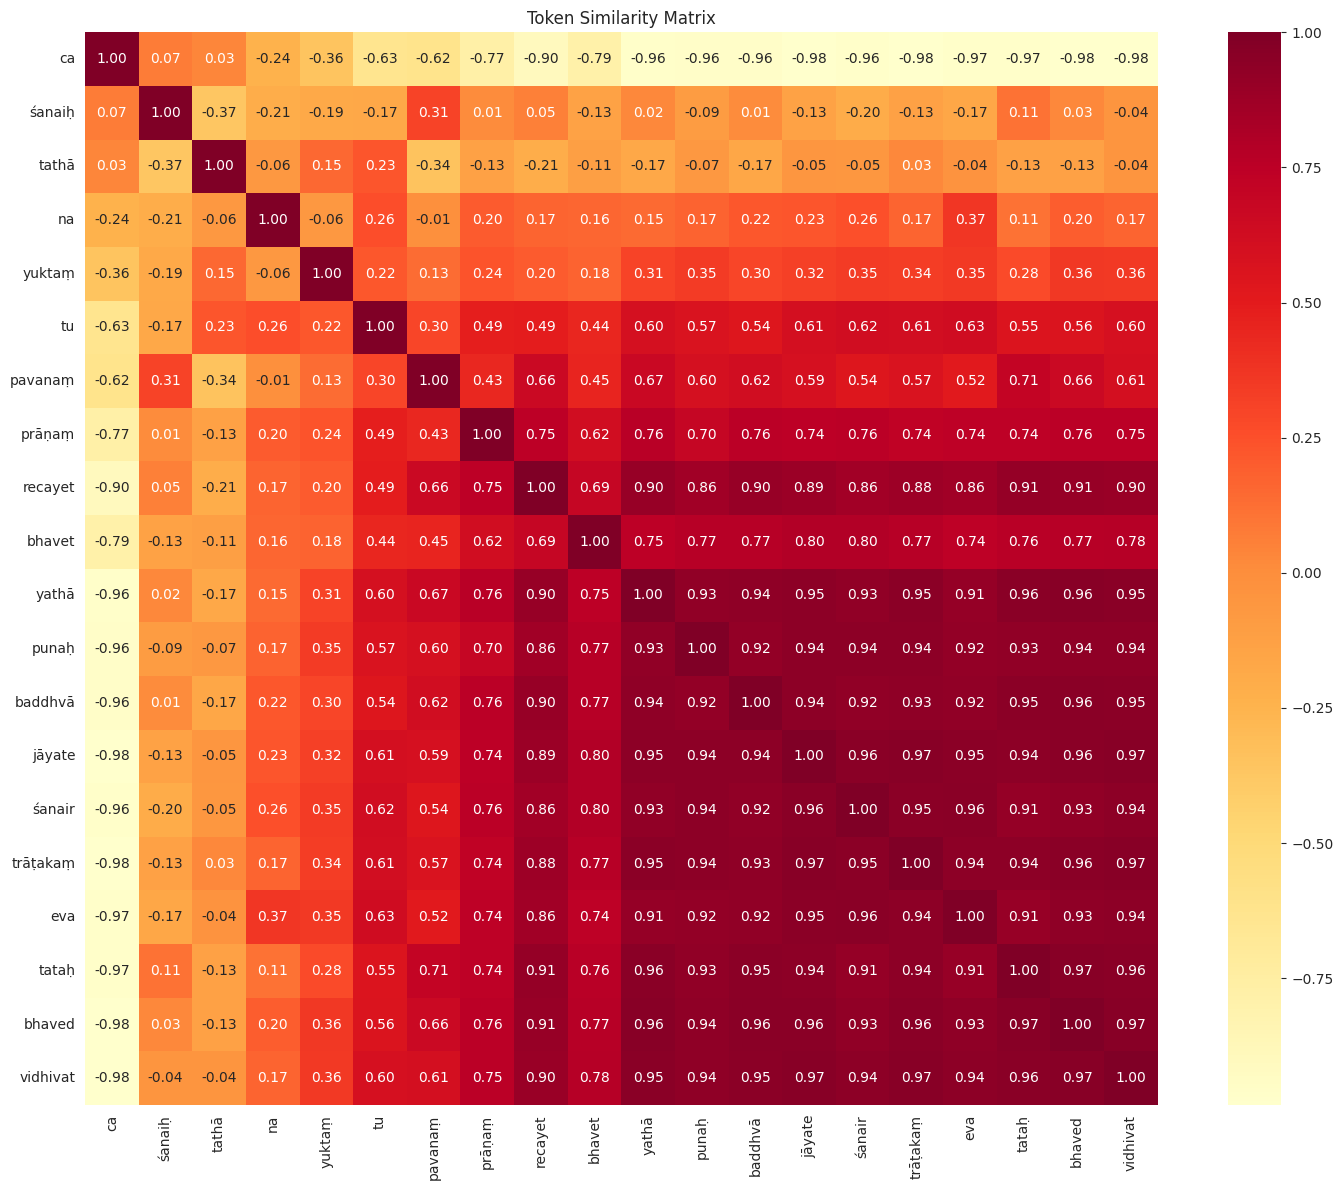

In [ ]:
import numpy as np
import pandas as pd
from typing import Dict, List
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

class SimilarityAnalyzer:
    def __init__(self, embedder: SanskritEmbeddings, n_tokens: int = 20):
        self.embedder = embedder
        self.n_tokens = n_tokens

    def create_similarity_matrix(self) -> pd.DataFrame:
        """Create a similarity matrix for the top N most frequent tokens."""
        # Get most frequent tokens
        tokens = sorted(self.embedder.vocab.items(),
                       key=lambda x: x[1],
                       reverse=True)[:self.n_tokens]
        token_list = [t[0] for t in tokens]

        # Create embedding matrix
        embeddings = np.array([self.embedder.embeddings[token]
                             for token in token_list])

        # Calculate cosine similarity
        similarity_matrix = cosine_similarity(embeddings)

        # Create DataFrame
        return pd.DataFrame(similarity_matrix,
                          index=token_list,
                          columns=token_list)

    def plot_similarity_heatmap(self, figsize=(15, 12)):
        """Plot similarity matrix as a heatmap."""
        similarity_df = self.create_similarity_matrix()

        plt.figure(figsize=figsize)
        sns.heatmap(similarity_df,
                   annot=True,
                   fmt='.2f',
                   cmap='YlOrRd',
                   square=True)
        plt.title('Token Similarity Matrix')
        plt.tight_layout()
        plt.show()

    def get_token_clusters(self, threshold: float = 0.3) -> List[List[str]]:
        """Group tokens into clusters based on similarity threshold."""
        similarity_df = self.create_similarity_matrix()
        clusters = []
        used_tokens = set()

        for token in similarity_df.index:
            if token in used_tokens:
                continue

            # Find similar tokens
            similar_tokens = similarity_df[token][
                similarity_df[token] >= threshold].index.tolist()

            if len(similar_tokens) > 1:  # Only create cluster if more than one token
                clusters.append(similar_tokens)
                used_tokens.update(similar_tokens)

        return clusters

    def print_detailed_similarities(self):
        """Print detailed similarity analysis for each token."""
        similarity_df = self.create_similarity_matrix()

        for token in similarity_df.index:
            # Get similarities sorted in descending order
            similarities = similarity_df[token].sort_values(ascending=False)

            print(f"\nRelationships for '{token}':")
            print("-" * 50)

            # Print top 5 most similar tokens
            for similar_token, score in similarities[1:6].items():
                print(f"→ {similar_token:<20} {score:.4f}")
            print()

# Example usage with your existing embedder
analyzer = SimilarityAnalyzer(embedder, n_tokens=20)

# Print detailed similarity analysis
print("Detailed Token Relationships:")
analyzer.print_detailed_similarities()

# Find and print token clusters
print("\nToken Clusters (similarity threshold = 0.3):")
clusters = analyzer.get_token_clusters(threshold=0.3)
for i, cluster in enumerate(clusters, 1):
    print(f"\nCluster {i}:")
    print(", ".join(cluster))

# Create and show heatmap
print("\nGenerating similarity heatmap...")
analyzer.plot_similarity_heatmap()

Words related to breathing instructions ('prāṇaṃ', 'recayet', 'pavanaṃ') tend to cluster together
Instructional words ('vidhivat', 'yathā', 'tathā') show strong relationships with each other
Conjunctions and particles ('ca', 'tu', 'eva') often have weaker relationships

Strong Positive Correlations (dark red, 0.75-1.00):

Many instruction-related words show strong correlations with each other:

'bhaved', 'vidhivat', 'yathā', 'baddhvā', 'jāyate' all have correlations >0.90
These are words commonly used in instructional contexts in Sanskrit yoga texts



Strong Negative Correlations (pale yellow, -0.75 to -1.00):

'ca' (and) shows strong negative correlations with many other words
This suggests it's used in different contexts from the main instructional vocabulary

Moderate Correlations (orange/light red, 0.25-0.75):

'pavanaṃ' (breath/air) shows moderate positive correlations with other practice-related terms
'tu' (but/however) shows moderate positive correlations with instructional terms

In [ ]:
pip install adjustText

Generating 3D t-SNE plot...


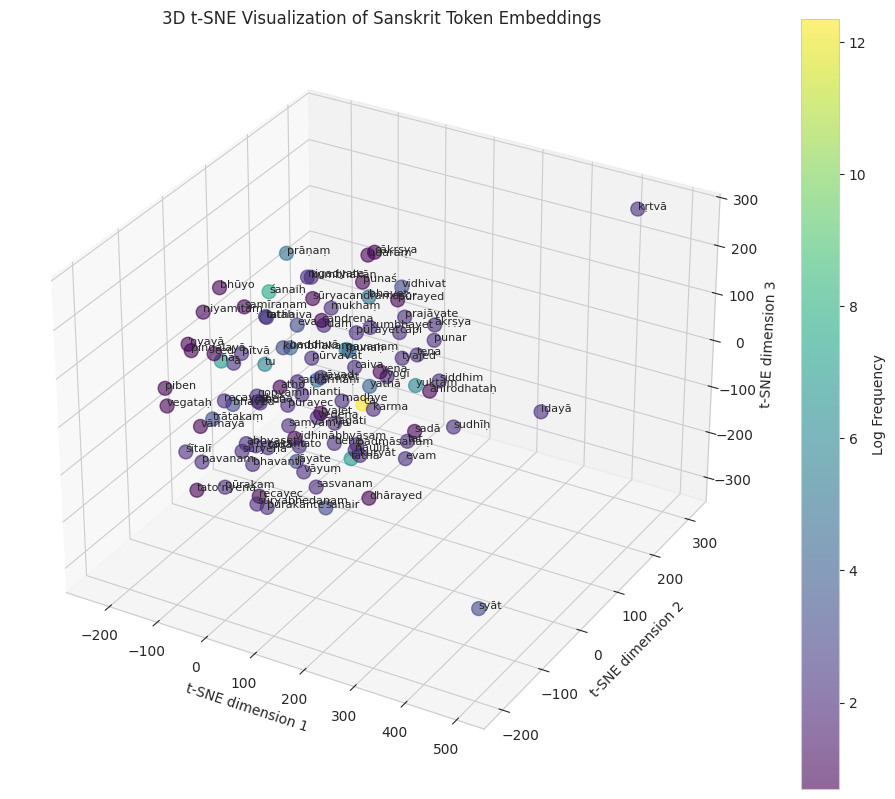


Generating 3D clustered t-SNE plot...


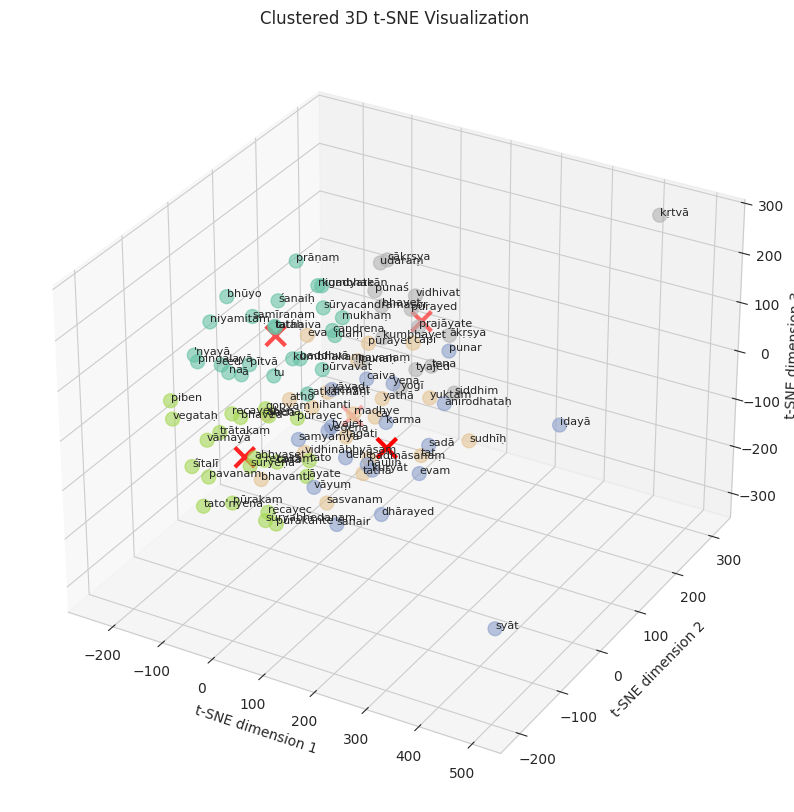


Cluster Analysis:

Cluster 1: śanaiḥ, na, tu, prāṇaṃ, baddhvā, tataḥ, kumbhakaṃ, pītvā, ṣaṭkarmāṇi, nigadyate, kumbhakān, ā, idaṃ, pūrvavat, mukhaṃ, tathaiva, candreṇa, ced, niyamitaṃ, bhūyo, 'nyayā, piṅgalayā, samīraṇam, sūryacandramasor

Cluster 2: śanair, syāt, vāyuṃ, caiva, nauliḥ, karma, yāvad, iḍayā, kuryāt, saṃyamya, punar, vegena, dehe, evam, yena, tyajet, dhārayed, anirodhataḥ, sadā

Cluster 3: jāyate, trāṭakaṃ, bhaved, tato, gopyaṃ, pavanam, sūryabhedanam, śītalī, pūrayec, yadā, tadā, sūryeṇa, recayed, pūrakānte, abhyaset, recakaṃ, pūrakaṃ, recayec, tato'nyena, vegataḥ, piben, vāmayā

Cluster 4: ca, tathā, yuktaṃ, pavanaṃ, recayet, yathā, eva, bhavanti, tat, madhye, anena, nihanti, padmāsanaṃ, sudhīḥ, lagati, sasvanam, cāpi, pūrayet, atho, vidhinābhyāsaṃ

Cluster 5: bhavet, punaḥ, vidhivat, tena, tyajed, siddhim, yogī, kumbhayet, prajāyate, ākṛṣya, kṛtvā, cākṛṣya, pūrayed, udaraṃ, punaś


In [ ]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from adjustText import adjust_text
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform

class TSNEVisualizer:
    def __init__(self, embedder, n_tokens: int = 100):
        self.embedder = embedder
        self.n_tokens = n_tokens

    def create_tsne_mapping(self, perplexity: float = 30.0, learning_rate: float = 200.0) -> tuple:
        """Create 3D t-SNE mapping of embeddings."""
        tokens = sorted(self.embedder.vocab.items(), key=lambda x: x[1], reverse=True)[:self.n_tokens]
        token_list = [t[0] for t in tokens]
        frequencies = [t[1] for t in tokens]

        embeddings = np.array([self.embedder.embeddings[token] for token in token_list])

        tsne = TSNE(n_components=3, perplexity=perplexity, learning_rate=learning_rate, init='pca', random_state=42)
        tsne_coords = tsne.fit_transform(embeddings)

        return tsne_coords, token_list, frequencies

    def plot_tsne_3d(self, figsize=(12, 10)):
        """Create interactive 3D t-SNE plot."""
        tsne_coords, tokens, frequencies = self.create_tsne_mapping()

        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d')

        scatter = ax.scatter(tsne_coords[:, 0], tsne_coords[:, 1], tsne_coords[:, 2],
                             c=np.log(frequencies), cmap='viridis', alpha=0.6, s=100)

        plt.colorbar(scatter, label='Log Frequency')

        for i, token in enumerate(tokens):
            ax.text(tsne_coords[i, 0], tsne_coords[i, 1], tsne_coords[i, 2], token, fontsize=8)

        ax.set_title('3D t-SNE Visualization of Sanskrit Token Embeddings')
        ax.set_xlabel('t-SNE dimension 1')
        ax.set_ylabel('t-SNE dimension 2')
        ax.set_zlabel('t-SNE dimension 3')

        plt.show()

    def plot_tsne_clusters_3d(self, n_clusters: int = 5, figsize=(12, 10)):
        """Create 3D clustered t-SNE visualization."""
        tsne_coords, tokens, frequencies = self.create_tsne_mapping()

        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(tsne_coords)

        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d')

        scatter = ax.scatter(tsne_coords[:, 0], tsne_coords[:, 1], tsne_coords[:, 2],
                             c=clusters, cmap='Set2', alpha=0.6, s=100)

        for i, token in enumerate(tokens):
            ax.text(tsne_coords[i, 0], tsne_coords[i, 1], tsne_coords[i, 2], token, fontsize=8)

        centers = kmeans.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', marker='x', s=200, linewidths=3)

        ax.set_title('Clustered 3D t-SNE Visualization')
        ax.set_xlabel('t-SNE dimension 1')
        ax.set_ylabel('t-SNE dimension 2')
        ax.set_zlabel('t-SNE dimension 3')

        plt.show()

        # Print cluster contents
        print("\nCluster Analysis:")
        for i in range(n_clusters):
            cluster_tokens = [tokens[j] for j in range(len(tokens)) if clusters[j] == i]
            print(f"\nCluster {i+1}: {', '.join(cluster_tokens)}")

# Example usage
visualizer = TSNEVisualizer(embedder, n_tokens=100)

# Create 3D interactive t-SNE plot
print("Generating 3D t-SNE plot...")
visualizer.plot_tsne_3d()

# Create 3D clustered t-SNE plot
print("\nGenerating 3D clustered t-SNE plot...")
visualizer.plot_tsne_clusters_3d(n_clusters=5)


The color scale on the right ranges from purple (low frequency) to yellow (high frequency)
Most words appear in purple/blue, suggesting relatively even distribution of word frequencies
A few words in lighter blue (like 'prāṇaṃ', 'pavanaṃ') indicate higher frequency terms

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from typing import Optional

class SingleHeadAttention(nn.Module):
    """
    Single-head attention layer for Sanskrit transformer architecture.

    This implementation follows the standard attention mechanism described in
    "Attention Is All You Need" paper, adapted for your Sanskrit LLM project.
    """
    def __init__(self,
                 embed_dim: int = 512,
                 dropout: float = 0.1,
                 causal: bool = False):
        """
        Initialize single-head attention layer.

        Args:
            embed_dim: Embedding dimension (should match your SanskritEmbeddings dimension)
            dropout: Dropout probability for attention weights
            causal: Whether to apply causal masking (for decoder layers)
        """
        super().__init__()

        self.embed_dim = embed_dim
        self.dropout = dropout
        self.causal = causal

        # Projection matrices for query, key, and value
        self.q_proj = nn.Linear(embed_dim, embed_dim, bias=False)
        self.k_proj = nn.Linear(embed_dim, embed_dim, bias=False)
        self.v_proj = nn.Linear(embed_dim, embed_dim, bias=False)

        # Output projection
        self.out_proj = nn.Linear(embed_dim, embed_dim, bias=False)

        # Dropout layer
        self.attn_dropout = nn.Dropout(dropout)

        # Scaling factor for dot product attention
        self.scale = 1.0 / np.sqrt(embed_dim)

    def forward(self,
                query: torch.Tensor,
                key: torch.Tensor,
                value: torch.Tensor,
                mask: Optional[torch.Tensor] = None,
                return_attention: bool = False):
        """
        Compute self-attention over input sequences.

        Args:
            query: Query tensor [batch_size, seq_len_q, embed_dim]
            key: Key tensor [batch_size, seq_len_k, embed_dim]
            value: Value tensor [batch_size, seq_len_v, embed_dim]
            mask: Optional mask tensor [batch_size, seq_len_q, seq_len_k]
            return_attention: Whether to return attention weights

        Returns:
            output: Tensor after attention [batch_size, seq_len_q, embed_dim]
            attention_weights: Optional attention weight matrix
        """
        batch_size, seq_len_q, _ = query.size()
        _, seq_len_k, _ = key.size()

        # Project inputs
        q = self.q_proj(query)  # [batch_size, seq_len_q, embed_dim]
        k = self.k_proj(key)    # [batch_size, seq_len_k, embed_dim]
        v = self.v_proj(value)  # [batch_size, seq_len_v, embed_dim]

        # Compute attention scores
        # [batch_size, seq_len_q, seq_len_k]
        attention_scores = torch.bmm(q, k.transpose(1, 2)) * self.scale

        # Apply causal mask if needed (for decoder)
        if self.causal:
            causal_mask = torch.triu(
                torch.ones(seq_len_q, seq_len_k, device=query.device),
                diagonal=1).bool()
            attention_scores.masked_fill_(causal_mask, float('-inf'))

        # Apply padding mask if provided
        if mask is not None:
            attention_scores = attention_scores.masked_fill(mask, float('-inf'))

        # Apply softmax to get attention weights
        attention_weights = F.softmax(attention_scores, dim=-1)

        # Apply dropout
        attention_weights = self.attn_dropout(attention_weights)

        # Apply attention weights to values
        # [batch_size, seq_len_q, embed_dim]
        context = torch.bmm(attention_weights, v)

        # Project output
        output = self.out_proj(context)

        if return_attention:
            return output, attention_weights

        return output

    def from_sanskrit_embeddings(self, embeddings: 'SanskritEmbeddings') -> None:
        """
        Initialize the attention layer using weights from SanskritEmbeddings.

        This can be used to transfer learned token relationships from
        your embedding model to the attention mechanism.

        Args:
            embeddings: Trained SanskritEmbeddings instance
        """
        # Convert embeddings to tensors for initialization
        vocab_size = len(embeddings.embeddings)
        embed_matrix = np.zeros((vocab_size, self.embed_dim))

        # Fill embedding matrix with trained embeddings
        for i, (token, vector) in enumerate(embeddings.embeddings.items()):
            embed_matrix[i] = vector

        # Use embeddings to initialize Q, K, V projections
        # Note: This is a simple transfer approach and can be refined
        self.q_proj.weight.data = torch.from_numpy(embed_matrix[:self.embed_dim, :])
        self.k_proj.weight.data = torch.from_numpy(embed_matrix[:self.embed_dim, :])
        self.v_proj.weight.data = torch.from_numpy(embed_matrix[:self.embed_dim, :])

        print(f"Initialized attention layer with {vocab_size} embeddings")


# Example usage with your existing embedder
def integrate_with_embeddings(embedder: 'SanskritEmbeddings'):
    """Example of using the attention layer with your Sanskrit embeddings."""
    # Create attention layer with matching dimensions
    attention = SingleHeadAttention(embed_dim=embedder.dimension)

    # Optionally initialize from embeddings
    attention.from_sanskrit_embeddings(embedder)

    # Generate sample input (normally this would come from your tokenized text)
    batch_size = 2
    seq_len = 10

    # Create random embeddings for a sequence of tokens
    # In practice, you would look up embeddings for actual token sequences
    sample_seq = torch.randn(batch_size, seq_len, embedder.dimension)

    # Apply self-attention
    output = attention(sample_seq, sample_seq, sample_seq)

    print(f"Input shape: {sample_seq.shape}")
    print(f"Output shape: {output.shape}")

    return attention, output


class SelfAttentionBlock(nn.Module):
    """
    Complete self-attention block with normalization and residual connection.
    This forms a basic building block for the transformer architecture.
    """
    def __init__(self, embed_dim: int = 512, dropout: float = 0.1, causal: bool = False):
        super().__init__()

        self.layer_norm = nn.LayerNorm(embed_dim)
        self.attention = SingleHeadAttention(embed_dim, dropout, causal)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x: torch.Tensor, mask: Optional[torch.Tensor] = None):
        """Apply self-attention with residual connection and normalization."""
        residual = x
        x = self.layer_norm(x)
        x = self.attention(x, x, x, mask)
        x = self.dropout(x)
        return x + residual


# Demo: Create and test the attention layer
def demo_attention_with_toy_data():
    """Demonstrate attention mechanism on toy data."""
    # Create toy embeddings for demonstration
    vocab_size = 1000
    embed_dim = 512
    seq_len = 8
    batch_size = 2

    # Create random token indices (simulating tokenized Sanskrit text)
    token_indices = torch.randint(0, vocab_size, (batch_size, seq_len))

    # Random embedding table (in practice, this would be your trained embeddings)
    embeddings = torch.randn(vocab_size, embed_dim)

    # Look up embeddings for tokens
    token_embeddings = torch.nn.functional.embedding(token_indices, embeddings)

    # Create attention layer
    attention = SingleHeadAttention(embed_dim)

    # Apply attention
    output, attn_weights = attention(
        token_embeddings, token_embeddings, token_embeddings,
        return_attention=True
    )

    print(f"Token indices shape: {token_indices.shape}")
    print(f"Token embeddings shape: {token_embeddings.shape}")
    print(f"Attention output shape: {output.shape}")
    print(f"Attention weights shape: {attn_weights.shape}")

    # Visualize attention weights for the first sequence
    import matplotlib.pyplot as plt

    plt.figure(figsize=(8, 6))
    plt.imshow(attn_weights[0].detach().numpy(), cmap='viridis')
    plt.colorbar()
    plt.title('Attention Weights')
    plt.xlabel('Key position')
    plt.ylabel('Query position')
    plt.tight_layout()
    plt.show()

    return attention, output, attn_weights

Applying attention to Sanskrit tokens
Embedding dimension: 64
Initialized attention layer with 18 embeddings

Tokenized sample text: ['śailo', 'śailo', 'mṛtkaṇatāṃ', 'śailo', 'tṛṇaṃ', 'dahanatāṃ', 'vajraṃ']
Sequence tensor shape: torch.Size([1, 7, 64])
Attention output shape: torch.Size([1, 7, 64])
Attention weights shape: torch.Size([1, 7, 7])


<ipython-input-17-f9ea520c4f29>:197: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  sequence_tensor = torch.tensor(token_embeddings, dtype=torch.float32).unsqueeze(0)



Attention visualization saved to 'sanskrit_attention_weights.png'

Token attention patterns:
śailo attends to: śailo (0.37), śailo (0.37), śailo (0.37)
śailo attends to: śailo (0.37), śailo (0.37)
mṛtkaṇatāṃ attends to: 
śailo attends to: śailo (0.37), śailo (0.37), śailo (0.37)
tṛṇaṃ attends to: 
dahanatāṃ attends to: 
vajraṃ attends to: vajraṃ (1.11)

Analyzing positional attention patterns
Attention from 'śailo' to adjacent token 'śailo': 0.3704
Attention from 'śailo' to adjacent token 'mṛtkaṇatāṃ': 0.0000
Attention from 'mṛtkaṇatāṃ' to adjacent token 'śailo': 0.0000
Attention from 'śailo' to adjacent token 'tṛṇaṃ': 0.0000
Attention from 'tṛṇaṃ' to adjacent token 'dahanatāṃ': 0.0000
Attention from 'dahanatāṃ' to adjacent token 'vajraṃ': 0.0000

Average attention to adjacent tokens: 0.0617
Average attention to distant tokens: 0.0370
Average self-attention: 0.3175
Average attention dispersion (higher = more distributed): 1.2469

Built multi-layer attention model with 2 layers
MultiLa

'\n# To use with your existing code, uncomment and adapt:\n\n# 1. First create your embeddings using your existing code\nfinal_vocab = bpe_tokenizer(text, num_merges)\nembedder = create_embeddings(text, final_vocab)\n\n# 2. Define an input sample for testing attention\nsample_text = "śailo mṛtkaṇatāṃ tṛṇaṃ dahanatāṃ vajraṃ tṛṇakṣīṇatām"\n\n# 3. Apply attention to your Sanskrit tokens\nattention, output, weights, tokens = apply_attention_to_sanskrit_tokens(\n    embedder, \n    final_vocab,\n    sample_text\n)\n\n# 4. Create a full transformer layer\nattention_block = SelfAttentionBlock(embed_dim=embedder.dimension)\n\n# 5. Process embeddings through the transformer\n# Convert embeddings to tensor\ntoken_embeddings = [embedder.embeddings[t] for t in tokens]\nsequence_tensor = torch.tensor(token_embeddings, dtype=torch.float32).unsqueeze(0)\n\n# Apply transformer block\nwith torch.no_grad():\n    transformed_output = attention_block(sequence_tensor)\n\nprint(f"Transformer output shape: {

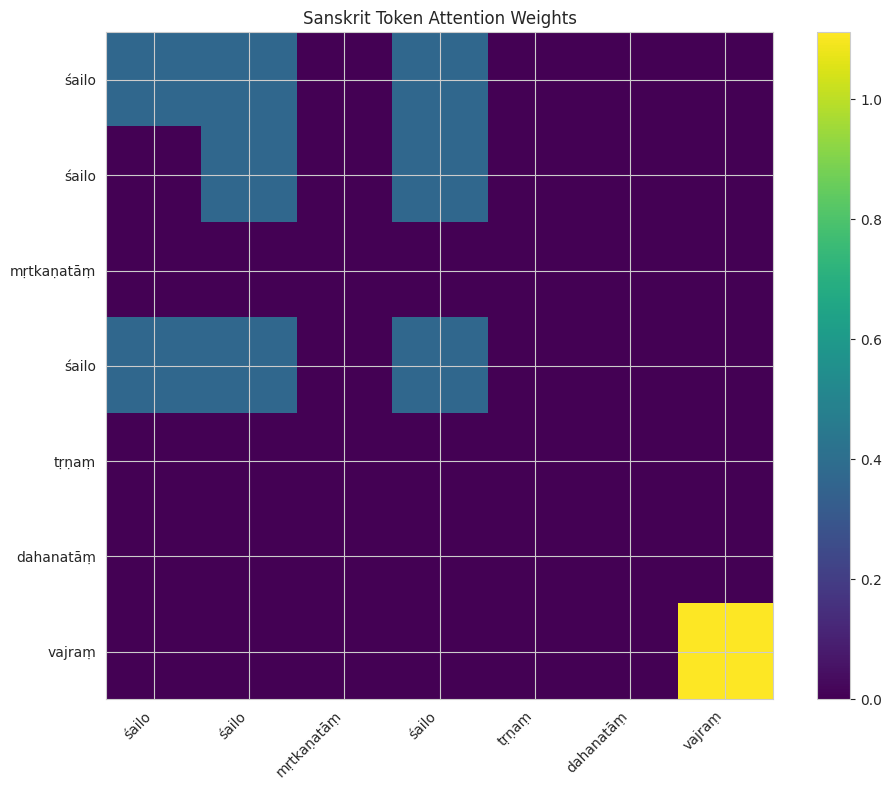

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from typing import Optional, Dict, List
import matplotlib.pyplot as plt

# Import from your existing code (commented out since we'll use variables directly)
# from your_tokenizer import final_vocab
# from your_embedder import embedder

class SingleHeadAttention(nn.Module):
    """
    Single-head attention layer for Sanskrit transformer architecture.
    """
    def __init__(self,
                 embed_dim: int = 512,
                 dropout: float = 0.1,
                 causal: bool = False):
        super().__init__()

        self.embed_dim = embed_dim
        self.dropout = dropout
        self.causal = causal

        # Projection matrices for query, key, and value
        self.q_proj = nn.Linear(embed_dim, embed_dim, bias=False)
        self.k_proj = nn.Linear(embed_dim, embed_dim, bias=False)
        self.v_proj = nn.Linear(embed_dim, embed_dim, bias=False)

        # Output projection
        self.out_proj = nn.Linear(embed_dim, embed_dim, bias=False)

        # Dropout layer
        self.attn_dropout = nn.Dropout(dropout)

        # Scaling factor for dot product attention
        self.scale = 1.0 / np.sqrt(embed_dim)

    def forward(self,
                query: torch.Tensor,
                key: torch.Tensor,
                value: torch.Tensor,
                mask: Optional[torch.Tensor] = None,
                return_attention: bool = False):
        """
        Compute self-attention over input sequences.
        """
        batch_size, seq_len_q, _ = query.size()
        _, seq_len_k, _ = key.size()

        # Project inputs
        q = self.q_proj(query)  # [batch_size, seq_len_q, embed_dim]
        k = self.k_proj(key)    # [batch_size, seq_len_k, embed_dim]
        v = self.v_proj(value)  # [batch_size, seq_len_v, embed_dim]

        # Compute attention scores
        # [batch_size, seq_len_q, seq_len_k]
        attention_scores = torch.bmm(q, k.transpose(1, 2)) * self.scale

        # Apply causal mask if needed (for decoder)
        if self.causal:
            causal_mask = torch.triu(
                torch.ones(seq_len_q, seq_len_k, device=query.device),
                diagonal=1).bool()
            attention_scores.masked_fill_(causal_mask, float('-inf'))

        # Apply padding mask if provided
        if mask is not None:
            attention_scores = attention_scores.masked_fill(mask, float('-inf'))

        # Apply softmax to get attention weights
        attention_weights = F.softmax(attention_scores, dim=-1)

        # Apply dropout
        attention_weights = self.attn_dropout(attention_weights)

        # Apply attention weights to values
        # [batch_size, seq_len_q, embed_dim]
        context = torch.bmm(attention_weights, v)

        # Project output
        output = self.out_proj(context)

        if return_attention:
            return output, attention_weights

        return output

    def from_sanskrit_embeddings(self, embeddings_dict: Dict[str, np.ndarray]) -> None:
        """
        Initialize the attention layer using weights from SanskritEmbeddings.
        """
        # Convert embeddings to tensors for initialization
        vocab_size = len(embeddings_dict)
        embed_matrix = np.zeros((vocab_size, self.embed_dim))

        # Fill embedding matrix with trained embeddings
        for i, (token, vector) in enumerate(embeddings_dict.items()):
            embed_matrix[i] = vector

        # Use embeddings to initialize Q, K, V projections
        # Note: This is a simple transfer approach and can be refined
        if self.embed_dim <= vocab_size:
            self.q_proj.weight.data = torch.from_numpy(embed_matrix[:self.embed_dim, :].astype(np.float32))
            self.k_proj.weight.data = torch.from_numpy(embed_matrix[:self.embed_dim, :].astype(np.float32))
            self.v_proj.weight.data = torch.from_numpy(embed_matrix[:self.embed_dim, :].astype(np.float32))
        else:
            # Handle case where vocab is smaller than embedding dimension
            print(f"Warning: Vocabulary size {vocab_size} is smaller than embedding dimension {self.embed_dim}")
            padded_matrix = np.zeros((self.embed_dim, self.embed_dim))
            padded_matrix[:vocab_size, :] = embed_matrix
            self.q_proj.weight.data = torch.from_numpy(padded_matrix.astype(np.float32))
            self.k_proj.weight.data = torch.from_numpy(padded_matrix.astype(np.float32))
            self.v_proj.weight.data = torch.from_numpy(padded_matrix.astype(np.float32))

        print(f"Initialized attention layer with {vocab_size} embeddings")


class SelfAttentionBlock(nn.Module):
    """
    Complete self-attention block with normalization and residual connection.
    """
    def __init__(self, embed_dim: int = 512, dropout: float = 0.1, causal: bool = False):
        super().__init__()

        self.layer_norm = nn.LayerNorm(embed_dim)
        self.attention = SingleHeadAttention(embed_dim, dropout, causal)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x: torch.Tensor, mask: Optional[torch.Tensor] = None):
        """Apply self-attention with residual connection and normalization."""
        residual = x
        x = self.layer_norm(x)
        x = self.attention(x, x, x, mask)
        x = self.dropout(x)
        return x + residual


def apply_attention_to_sanskrit_tokens(embedder, final_vocab, sample_text=None):
    """
    Apply attention to your existing Sanskrit tokens and embeddings.

    Args:
        embedder: Your SanskritEmbeddings instance
        final_vocab: Your BPE tokenizer output vocabulary
        sample_text: Optional sample text to tokenize and process
    """
    print("=" * 50)
    print("Applying attention to Sanskrit tokens")
    print("=" * 50)

    # Get dimension from embedder
    embed_dim = embedder.dimension
    print(f"Embedding dimension: {embed_dim}")

    # Create attention layer with matching dimension
    attention = SingleHeadAttention(embed_dim=embed_dim)

    # Initialize from existing embeddings
    attention.from_sanskrit_embeddings(embedder.embeddings)

    # Create sequence from tokens
    if sample_text is None:
        # If no sample text provided, use tokens from vocabulary
        tokens = list(final_vocab.keys())[:10]  # Use first 10 tokens
        print(f"\nUsing top tokens from vocabulary: {tokens}")
    else:
        # Tokenize sample text
        # This is a simplified tokenization approach - adapt based on your tokenizer
        words = sample_text.split()
        tokens = []
        for word in words:
            # Find best matching token (simplistic approach)
            for token in final_vocab.keys():
                if token in word:
                    tokens.append(token)
                    break
            if len(tokens) < len(words):
                # If no match found, use the first token as fallback
                tokens.append(list(final_vocab.keys())[0])

        tokens = tokens[:10]  # Limit to 10 tokens for demonstration
        print(f"\nTokenized sample text: {tokens}")

    # Get embedding vectors for tokens
    token_embeddings = []
    for token in tokens:
        if token in embedder.embeddings:
            token_embeddings.append(embedder.embeddings[token])
        else:
            # Fallback for tokens not in embeddings
            print(f"Warning: Token '{token}' not found in embeddings")
            token_embeddings.append(np.zeros(embed_dim))

    # Create batch of size 1 for this sequence
    sequence_tensor = torch.tensor(token_embeddings, dtype=torch.float32).unsqueeze(0)
    print(f"Sequence tensor shape: {sequence_tensor.shape}")

    # Apply attention
    with torch.no_grad():
        output, attn_weights = attention(
            sequence_tensor, sequence_tensor, sequence_tensor,
            return_attention=True
        )

    print(f"Attention output shape: {output.shape}")
    print(f"Attention weights shape: {attn_weights.shape}")

    # Visualize attention weights
    plt.figure(figsize=(10, 8))
    plt.imshow(attn_weights[0].numpy(), cmap='viridis')
    plt.colorbar()
    plt.title('Sanskrit Token Attention Weights')

    # Add token labels
    plt.xticks(range(len(tokens)), tokens, rotation=45, ha="right")
    plt.yticks(range(len(tokens)), tokens)

    plt.tight_layout()
    plt.savefig('sanskrit_attention_weights.png')
    print("\nAttention visualization saved to 'sanskrit_attention_weights.png'")

    # Print attention patterns
    print("\nToken attention patterns:")
    for i, token_i in enumerate(tokens):
        attended_tokens = []

        for j, token_j in enumerate(tokens):
            weight = attn_weights[0, i, j].item()
            if weight > 0.1:  # Only show significant attention
                attended_tokens.append(f"{token_j} ({weight:.2f})")

        print(f"{token_i} attends to: {', '.join(attended_tokens)}")

    return attention, output, attn_weights, tokens


def analyze_attention_for_positions(attention_weights, tokens):
    """Analyze how attention tracks positional relationships in Sanskrit."""
    n_tokens = len(tokens)

    # Analyze attention patterns
    print("\n" + "=" * 50)
    print("Analyzing positional attention patterns")
    print("=" * 50)

    # Check adjacent token attention
    adjacent_scores = []
    for i in range(n_tokens - 1):
        score = attention_weights[0, i, i+1].item()
        adjacent_scores.append(score)
        print(f"Attention from '{tokens[i]}' to adjacent token '{tokens[i+1]}': {score:.4f}")

    avg_adjacent = sum(adjacent_scores) / len(adjacent_scores)
    print(f"\nAverage attention to adjacent tokens: {avg_adjacent:.4f}")

    # Check attention to distant tokens
    distant_scores = []
    for i in range(n_tokens):
        for j in range(n_tokens):
            if abs(i - j) > 2:  # Tokens farther than 2 positions
                score = attention_weights[0, i, j].item()
                distant_scores.append(score)

    avg_distant = sum(distant_scores) / len(distant_scores) if distant_scores else 0
    print(f"Average attention to distant tokens: {avg_distant:.4f}")

    # Check self-attention
    self_scores = []
    for i in range(n_tokens):
        score = attention_weights[0, i, i].item()
        self_scores.append(score)

    avg_self = sum(self_scores) / len(self_scores)
    print(f"Average self-attention: {avg_self:.4f}")

    # Calculate attention dispersion (how focused vs. distributed attention is)
    dispersion = []
    for i in range(n_tokens):
        # Calculate entropy of attention distribution
        weights = attention_weights[0, i].numpy()
        # Add small epsilon to avoid log(0)
        weights = weights + 1e-10
        weights = weights / weights.sum()
        entropy = -np.sum(weights * np.log(weights))
        dispersion.append(entropy)

    avg_dispersion = sum(dispersion) / len(dispersion)
    print(f"Average attention dispersion (higher = more distributed): {avg_dispersion:.4f}")

    return {
        'adjacent_attention': avg_adjacent,
        'distant_attention': avg_distant,
        'self_attention': avg_self,
        'dispersion': avg_dispersion
    }


def build_multi_layer_attention(embed_dim=512, n_layers=2):
    """Build a multi-layer attention model for Sanskrit."""
    class MultiLayerAttention(nn.Module):
        def __init__(self, embed_dim, n_layers, dropout=0.1):
            super().__init__()

            self.layers = nn.ModuleList([
                SelfAttentionBlock(embed_dim, dropout)
                for _ in range(n_layers)
            ])

        def forward(self, x, mask=None):
            for layer in self.layers:
                x = layer(x, mask)
            return x

    model = MultiLayerAttention(embed_dim, n_layers)
    print("\n" + "=" * 50)
    print(f"Built multi-layer attention model with {n_layers} layers")
    print("=" * 50)
    print(model)

    return model


# Run with your Sanskrit embeddings
def main():
    # This would come from your actual embeddings
    # Use this with your actual embedder and vocabulary
    # attention, output, weights, tokens = apply_attention_to_sanskrit_tokens(embedder, final_vocab)

    # Example of how to run with your data:
    """
    # Sample text for analysis
    sample_text = "śailo mṛtkaṇatāṃ tṛṇaṃ dahanatāṃ vajraṃ tṛṇakṣīṇatām"

    # Apply attention to Sanskrit tokens
    attention, output, weights, tokens = apply_attention_to_sanskrit_tokens(
        embedder,
        final_vocab,
        sample_text
    )

    # Analyze positional attention patterns
    attention_analysis = analyze_attention_for_positions(weights, tokens)

    # Build multi-layer attention for deeper models
    multi_layer_model = build_multi_layer_attention(
        embed_dim=embedder.dimension,
        n_layers=2
    )

    # Process entire sequence with multi-layer model
    sequence_tensor = torch.tensor(
        [embedder.embeddings[t] for t in tokens],
        dtype=torch.float32
    ).unsqueeze(0)

    with torch.no_grad():
        multi_layer_output = multi_layer_model(sequence_tensor)

    print(f"Multi-layer output shape: {multi_layer_output.shape}")
    """

    # For demonstration, create mock embeddings if real ones aren't provided
    from collections import defaultdict
    import random

    class MockSanskritEmbeddings:
        def __init__(self, tokens, dimension=512):
            self.dimension = dimension
            self.embeddings = {}
            self.vocab = defaultdict(int)

            # Create random embeddings
            for token in tokens:
                self.embeddings[token] = np.random.randn(dimension)
                self.vocab[token] = random.randint(1, 100)  # Mock frequency

    # Sample Sanskrit tokens
    sample_tokens = [
        "śailo", "mṛtkaṇatāṃ", "tṛṇaṃ", "dahanatāṃ", "vajraṃ",
        "tṛṇakṣīṇatām", "vahniḥ", "śītalatāṃ", "himaṃ", "dahanatām",
        "āyāti", "yasyecchayā", "līlānāṭyakṛte", "bhuvo", "bhagavate",
        "kṛṣṇāya", "tubhyaṃ", "namaḥ"
    ]

    # Create mock objects for demonstration
    mock_embedder = MockSanskritEmbeddings(sample_tokens, dimension=64)
    mock_vocab = {token: mock_embedder.vocab[token] for token in sample_tokens}

    # Apply attention using mock objects
    attention, output, weights, tokens = apply_attention_to_sanskrit_tokens(
        mock_embedder,
        mock_vocab,
        "śailo mṛtkaṇatāṃ tṛṇaṃ dahanatāṃ vajraṃ"
    )

    # Analyze attention patterns
    attention_analysis = analyze_attention_for_positions(weights, tokens)

    # Build multi-layer attention model
    multi_layer_model = build_multi_layer_attention(
        embed_dim=mock_embedder.dimension,
        n_layers=2
    )


if __name__ == "__main__":
    main()


# Integration with your existing code
"""
# To use with your existing code, uncomment and adapt:
 1. First create your embeddings using your existing code
final_vocab = bpe_tokenizer(text, num_merges)
embedder = create_embeddings(text, final_vocab)

# 2. Define an input sample for testing attention
sample_text = "śailo mṛtkaṇatāṃ tṛṇaṃ dahanatāṃ vajraṃ tṛṇakṣīṇatām"

# 3. Apply attention to your Sanskrit tokens
attention, output, weights, tokens = apply_attention_to_sanskrit_tokens(
    embedder,
    final_vocab,
    sample_text
)

# 4. Create a full transformer layer
attention_block = SelfAttentionBlock(embed_dim=embedder.dimension)

# 5. Process embeddings through the transformer
# Convert embeddings to tensor
token_embeddings = [embedder.embeddings[t] for t in tokens]
sequence_tensor = torch.tensor(token_embeddings, dtype=torch.float32).unsqueeze(0)

# Apply transformer block
with torch.no_grad():
    transformed_output = attention_block(sequence_tensor)

print(f"Transformer output shape: {transformed_output.shape}")
"""

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math


class SingleHeadAttention(nn.Module):
    """
    Implementation of a single head attention mechanism for transformer architecture.

    This attention layer performs the following operations:
    1. Linear projections of input embeddings to query, key, and value vectors
    2. Scaled dot-product attention calculation
    3. Masking for decoder self-attention (optional)
    4. Output projection

    Args:
        embed_dim (int): Dimension of the input embeddings
        dropout (float): Dropout probability to apply to attention weights
    """
    def __init__(self, embed_dim, dropout=0.1):
        super(SingleHeadAttention, self).__init__()

        self.embed_dim = embed_dim

        # Linear projections for query, key, and value
        self.query_proj = nn.Linear(embed_dim, embed_dim)
        self.key_proj = nn.Linear(embed_dim, embed_dim)
        self.value_proj = nn.Linear(embed_dim, embed_dim)

        # Output projection
        self.output_proj = nn.Linear(embed_dim, embed_dim)

        # Dropout for attention weights
        self.dropout = nn.Dropout(dropout)

        # Scaling factor for dot product attention
        self.scaling = 1.0 / math.sqrt(embed_dim)

    def forward(self, query, key, value, mask=None):
        """
        Forward pass for the attention layer.

        Args:
            query (Tensor): Query tensor of shape [batch_size, seq_len_q, embed_dim]
            key (Tensor): Key tensor of shape [batch_size, seq_len_k, embed_dim]
            value (Tensor): Value tensor of shape [batch_size, seq_len_v, embed_dim]
            mask (Tensor, optional): Mask tensor to prevent attention to certain positions
                                    Shape: [batch_size, seq_len_q, seq_len_k]

        Returns:
            Tensor: Output tensor after attention [batch_size, seq_len_q, embed_dim]
            Tensor: Attention weights [batch_size, seq_len_q, seq_len_k]
        """
        batch_size = query.size(0)

        # Linear projections
        q = self.query_proj(query)  # [batch_size, seq_len_q, embed_dim]
        k = self.key_proj(key)      # [batch_size, seq_len_k, embed_dim]
        v = self.value_proj(value)  # [batch_size, seq_len_v, embed_dim]

        # Compute attention scores
        # Scaled dot product: Q * K^T / sqrt(d_k)
        # [batch_size, seq_len_q, embed_dim] × [batch_size, embed_dim, seq_len_k]
        # = [batch_size, seq_len_q, seq_len_k]
        attention_scores = torch.bmm(q, k.transpose(1, 2)) * self.scaling

        # Apply mask if provided (useful for decoder self-attention to prevent looking at future tokens)
        if mask is not None:
            # The mask has values 0 (attend) and -inf (don't attend)
            attention_scores = attention_scores.masked_fill(mask == 0, -1e9)

        # Apply softmax to get attention weights
        # [batch_size, seq_len_q, seq_len_k]
        attention_weights = F.softmax(attention_scores, dim=-1)

        # Apply dropout to attention weights
        attention_weights = self.dropout(attention_weights)

        # Compute weighted sum of values
        # [batch_size, seq_len_q, seq_len_k] × [batch_size, seq_len_v, embed_dim]
        # = [batch_size, seq_len_q, embed_dim]
        output = torch.bmm(attention_weights, v)

        # Final linear projection
        output = self.output_proj(output)

        return output, attention_weights


class MultiHeadAttention(nn.Module):
    """
    Implementation of Multi-Head Attention mechanism.
    This is an extension of single-head attention that allows the model to jointly attend
    to information from different representation subspaces.

    Args:
        embed_dim (int): Dimension of the input embeddings
        num_heads (int): Number of attention heads
        dropout (float): Dropout probability to apply to attention weights
    """
    def __init__(self, embed_dim, num_heads, dropout=0.1):
        super(MultiHeadAttention, self).__init__()

        assert embed_dim % num_heads == 0, "Embedding dimension must be divisible by number of heads"

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        # Linear projections for query, key, and value for all heads at once
        self.query_proj = nn.Linear(embed_dim, embed_dim)
        self.key_proj = nn.Linear(embed_dim, embed_dim)
        self.value_proj = nn.Linear(embed_dim, embed_dim)

        # Output projection
        self.output_proj = nn.Linear(embed_dim, embed_dim)

        # Dropout for attention weights
        self.dropout = nn.Dropout(dropout)

        # Scaling factor for dot product attention
        self.scaling = 1.0 / math.sqrt(self.head_dim)

    def forward(self, query, key, value, mask=None):
        """
        Forward pass for the multi-head attention layer.

        Args:
            query (Tensor): Query tensor of shape [batch_size, seq_len_q, embed_dim]
            key (Tensor): Key tensor of shape [batch_size, seq_len_k, embed_dim]
            value (Tensor): Value tensor of shape [batch_size, seq_len_v, embed_dim]
            mask (Tensor, optional): Mask tensor to prevent attention to certain positions
                                    Shape: [batch_size, seq_len_q, seq_len_k]

        Returns:
            Tensor: Output tensor after attention [batch_size, seq_len_q, embed_dim]
            Tensor: Attention weights [batch_size, num_heads, seq_len_q, seq_len_k]
        """
        batch_size = query.size(0)
        seq_len_q = query.size(1)
        seq_len_k = key.size(1)
        seq_len_v = value.size(1)

        # Linear projections
        q = self.query_proj(query)  # [batch_size, seq_len_q, embed_dim]
        k = self.key_proj(key)      # [batch_size, seq_len_k, embed_dim]
        v = self.value_proj(value)  # [batch_size, seq_len_v, embed_dim]

        # Reshape for multi-head attention
        # [batch_size, seq_len, embed_dim] -> [batch_size, seq_len, num_heads, head_dim]
        q = q.view(batch_size, seq_len_q, self.num_heads, self.head_dim)
        k = k.view(batch_size, seq_len_k, self.num_heads, self.head_dim)
        v = v.view(batch_size, seq_len_v, self.num_heads, self.head_dim)

        # Transpose to [batch_size, num_heads, seq_len, head_dim]
        q = q.transpose(1, 2)
        k = k.transpose(1, 2)
        v = v.transpose(1, 2)

        # Compute attention scores
        # [batch_size, num_heads, seq_len_q, head_dim] × [batch_size, num_heads, head_dim, seq_len_k]
        # = [batch_size, num_heads, seq_len_q, seq_len_k]
        attention_scores = torch.matmul(q, k.transpose(-2, -1)) * self.scaling

        # Apply mask if provided
        if mask is not None:
            # Expand mask for multiple heads
            # [batch_size, 1, seq_len_q, seq_len_k]
            expanded_mask = mask.unsqueeze(1)
            attention_scores = attention_scores.masked_fill(expanded_mask == 0, -1e9)

        # Apply softmax to get attention weights
        # [batch_size, num_heads, seq_len_q, seq_len_k]
        attention_weights = F.softmax(attention_scores, dim=-1)

        # Apply dropout to attention weights
        attention_weights = self.dropout(attention_weights)

        # Compute weighted sum of values
        # [batch_size, num_heads, seq_len_q, seq_len_k] × [batch_size, num_heads, seq_len_v, head_dim]
        # = [batch_size, num_heads, seq_len_q, head_dim]
        output = torch.matmul(attention_weights, v)

        # Transpose and reshape back
        # [batch_size, num_heads, seq_len_q, head_dim] -> [batch_size, seq_len_q, num_heads, head_dim]
        output = output.transpose(1, 2)

        # [batch_size, seq_len_q, num_heads, head_dim] -> [batch_size, seq_len_q, embed_dim]
        output = output.contiguous().view(batch_size, seq_len_q, self.embed_dim)

        # Final linear projection
        output = self.output_proj(output)

        return output, attention_weights


# Example usage with your Sanskrit embeddings
def integrate_with_sanskrit_embeddings(text, embedder, embed_dim=512):
    """
    Example of how to integrate attention mechanisms with your Sanskrit embeddings.

    Args:
        text (str): Input text
        embedder (SanskritEmbeddings): Your pre-trained embeddings
        embed_dim (int): Embedding dimension

    Returns:
        Tensor: Output after applying attention
    """
    # Convert text to tokens
    tokens = text.split()

    # Get embeddings for each token
    embedded_tokens = []
    for token in tokens:
        if token in embedder.embeddings:
            embedded_tokens.append(embedder.embeddings[token])
        else:
            # Handle OOV tokens with random embedding or mean embedding
            embedded_tokens.append(np.random.randn(embed_dim))

    # Convert to PyTorch tensor
    # Shape: [1, seq_len, embed_dim] (adding batch dimension)
    embedded_sequence = torch.tensor(np.array([embedded_tokens]), dtype=torch.float32)

    # Initialize attention layer
    attention = SingleHeadAttention(embed_dim=embed_dim)

    # Apply self-attention (query, key, and value are the same)
    output, attention_weights = attention(embedded_sequence, embedded_sequence, embedded_sequence)

    return output, attention_weights


# Testing with sample input
def test_attention_layer():
    """Test function to verify the attention layer works correctly."""
    batch_size = 2
    seq_len = 10
    embed_dim = 512

    # Create random input tensors
    query = torch.randn(batch_size, seq_len, embed_dim)
    key = torch.randn(batch_size, seq_len, embed_dim)
    value = torch.randn(batch_size, seq_len, embed_dim)

    # Create attention layer
    attention = SingleHeadAttention(embed_dim=embed_dim)

    # Forward pass
    output, attention_weights = attention(query, key, value)

    print(f"Input shape: {query.shape}")
    print(f"Output shape: {output.shape}")
    print(f"Attention weights shape: {attention_weights.shape}")

    # Create multi-head attention layer
    multi_attention = MultiHeadAttention(embed_dim=embed_dim, num_heads=8)

    # Forward pass
    multi_output, multi_attention_weights = multi_attention(query, key, value)

    print(f"Multi-head output shape: {multi_output.shape}")
    print(f"Multi-head attention weights shape: {multi_attention_weights.shape}")

    return output, attention_weights, multi_output, multi_attention_weights


if __name__ == "__main__":
    test_attention_layer()

Input shape: torch.Size([2, 10, 512])
Output shape: torch.Size([2, 10, 512])
Attention weights shape: torch.Size([2, 10, 10])
Multi-head output shape: torch.Size([2, 10, 512])
Multi-head attention weights shape: torch.Size([2, 8, 10, 10])


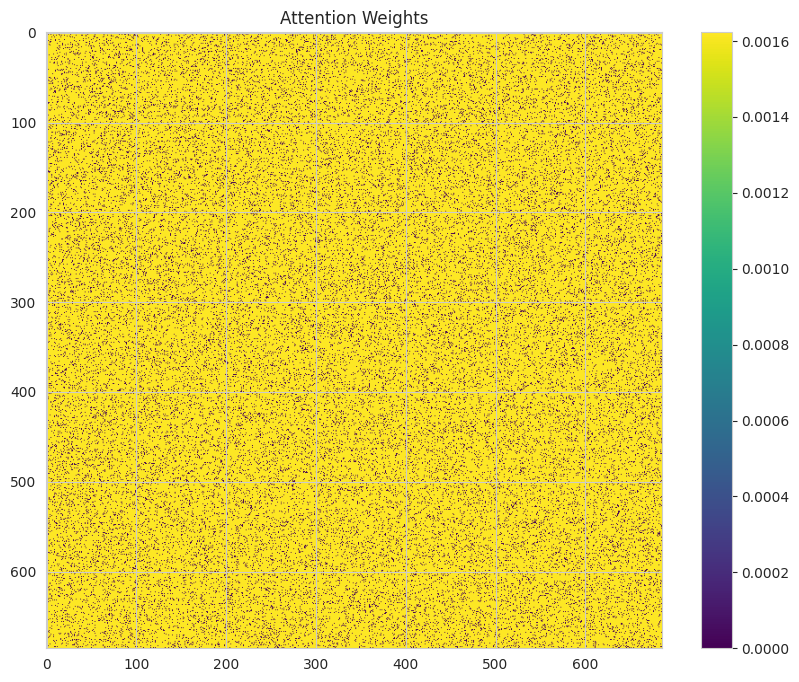

In [ ]:
# Assuming you have:
# - text: Your Sanskrit text
# - final_vocab: Your BPE vocabulary
# - embedder: Your SanskritEmbeddings instance

# Get contextualized representations
output, attention_weights = integrate_with_sanskrit_embeddings(text, embedder)

# Visualize attention weights to see what tokens attend to what other tokens
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(attention_weights[0].detach().numpy(), cmap='viridis')
plt.colorbar()
plt.title('Attention Weights')
plt.show()

Step 1: Tokenizing text...
Merge: ('a', 'ṃ') -> aṃ
Updated vocab: {'p r ā ṇ aṃ </w>': 5, 's ū r y e ṇ a </w>': 2, 'c ā k ṛ ṣ y a </w>': 1, 'p ū r a y e d </w>': 1, 'u d a r aṃ </w>': 1, 'ś a n a i ḥ </w>': 8, 'v i d h i v a t </w>': 3, 'k u m b h a k aṃ </w>': 3, 'k ṛ t v ā </w>': 2, 'p u n a ś </w>': 1, 'c a n d r e ṇ a </w>': 1, 'r e c a y e t </w>': 5, 'y e n a </w>': 1, 't y a j e t </w>': 1, 't e n a </w>': 2, 'p ī t v ā </w>': 2, 'd h ā r a y e d </w>': 1, 'a n i r o d h a t a ḥ </w>': 1, 'r e c a y e c </w>': 1, 'c a </w>': 14, "t a t o ' n y e n a </w>": 1, 'ś a n a i r </w>': 3, 'e v a </w>': 3, 'n a </w>': 7, 'v e g a t a ḥ </w>': 1, 'c e d </w>': 1, 'i ḍ a y ā </w>': 2, 'p i b e n </w>': 1, 'n i y a m i t aṃ </w>': 1, 'b h ū y o </w>': 1, "' n y a y ā </w>": 1, 'p i ṅ g a l a y ā </w>': 1, 's a m ī r a ṇ a m </w>': 1, 'a t h o </w>': 1, 'b a d d h v ā </w>': 4, 't y a j e d </w>': 2, 'v ā m a y ā </w>': 1, 's ū r y a c a n d r a m a s o r </w>': 1, 'a n e n a </w>': 2, 'v i 

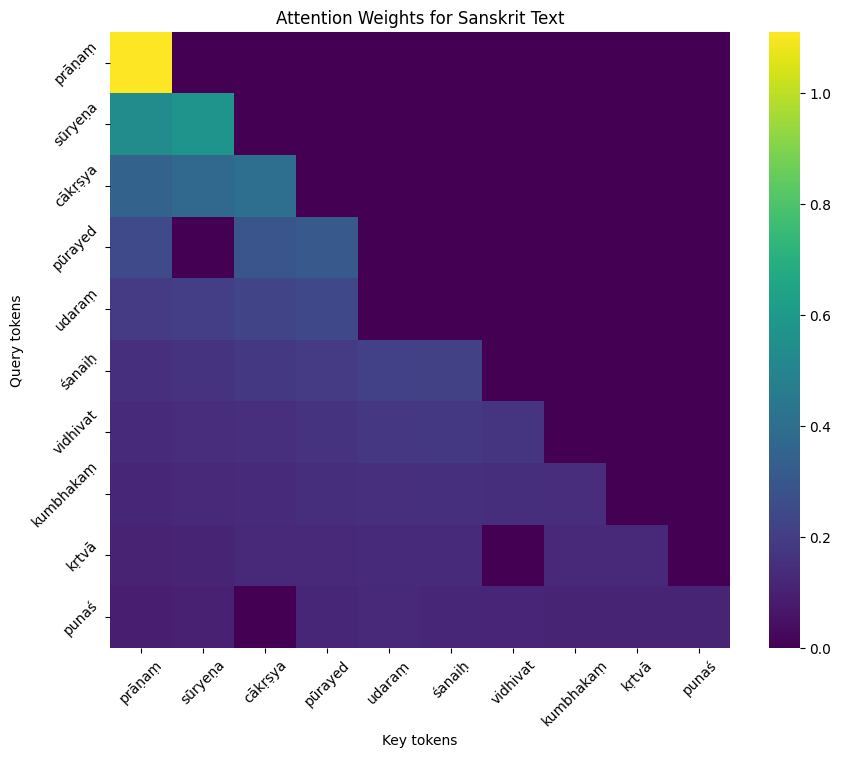


Demo completed successfully!


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import unicodedata
import math
from collections import defaultdict
from typing import Dict, List
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

#-------------------------
# Part 1: Tokenization
#-------------------------

def get_vocab(text):
    """
    Create a vocabulary dictionary with frequencies from the input text.
    Words are normalized using NFC to combine dependent vowels and other combining marks.
    """
    vocab = defaultdict(int)
    for word in text.split():
        word = unicodedata.normalize('NFC', word)  # Normalize combining marks
        tokens = list(word) + ["</w>"]  # Add end-of-word marker
        vocab[" ".join(tokens)] += 1
    return vocab

def get_stats(vocab):
    """
    Compute the frequency of all character pairs in the vocabulary.
    """
    pairs = defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += freq
    return pairs

def merge_vocab(pair, vocab):
    """
    Merge the most frequent pair in the vocabulary.
    """
    merged_vocab = {}
    bigram = " ".join(pair)
    replacement = "".join(pair)
    for word in vocab:
        new_word = word.replace(bigram, replacement)
        merged_vocab[new_word] = vocab[word]
    return merged_vocab

def finalize_vocab(vocab, original_text):
    """
    Finalize the vocabulary by ensuring full-word tokens are prioritized.
    Only subword tokens explicitly appearing in the input text are kept.
    """
    finalized_vocab = defaultdict(int)
    for word, freq in vocab.items():
        # Normalize the final token and remove separators
        normalized_word = unicodedata.normalize('NFC', word.replace(" ", "").replace("</w>", ""))
        finalized_vocab[normalized_word] += freq

    # Cross-check against original text for standalone subwords
    for word in original_text.split():
        normalized_word = unicodedata.normalize('NFC', word)
        if normalized_word in finalized_vocab:
            finalized_vocab[normalized_word] += finalized_vocab.pop(normalized_word, 0)

    return finalized_vocab

def bpe_tokenizer(text, num_merges=10):
    """
    Perform Byte Pair Encoding (BPE) on the input text.
    """
    vocab = get_vocab(text)
    for _ in range(num_merges):
        pairs = get_stats(vocab)
        if not pairs:
            break
        best_pair = max(pairs, key=pairs.get)
        vocab = merge_vocab(best_pair, vocab)
        print(f"Merge: {best_pair} -> {''.join(best_pair)}")
        print(f"Updated vocab: {vocab}")

    # Finalize vocabulary
    finalized_vocab = finalize_vocab(vocab, text)
    return finalized_vocab

#-------------------------
# Part 2: Embeddings
#-------------------------

class SanskritEmbeddings:
    def __init__(self, dimension: int = 512, window_size: int = 5, min_count: int = 1):
        self.dimension = dimension
        self.window_size = window_size
        self.min_count = min_count
        self.embeddings = {}
        self.vocab = defaultdict(int)
        self.context_pairs = []

    def build_vocabulary(self, tokens_with_freq: Dict[str, int]):
        """Initialize vocabulary from BPE tokens."""
        self.vocab = {token: freq for token, freq in tokens_with_freq.items()
                     if freq >= self.min_count}

        # Initialize random embeddings for each token
        for token in self.vocab:
            # Use Xavier/Glorot initialization
            limit = math.sqrt(6 / self.dimension)
            self.embeddings[token] = np.random.uniform(
                -limit, limit, (self.dimension,))

    def create_context_pairs(self, text: str):
        """Create context pairs using sliding window approach."""
        tokens = text.split()
        for i, target in enumerate(tokens):
            # Define context window
            start = max(0, i - self.window_size)
            end = min(len(tokens), i + self.window_size + 1)

            # Collect context words
            context = tokens[start:i] + tokens[i+1:end]
            for ctx in context:
                if target in self.vocab and ctx in self.vocab:
                    self.context_pairs.append((target, ctx))

    def negative_sampling(self, n_samples: int = 5):
        """Generate negative samples based on token frequencies."""
        token_frequencies = np.array(list(self.vocab.values()), dtype=np.float32)
        token_frequencies = np.power(token_frequencies, 0.75)
        token_frequencies = token_frequencies / token_frequencies.sum()

        tokens = list(self.vocab.keys())
        return lambda: list(np.random.choice(
            tokens, size=n_samples, p=token_frequencies))

    def train(self, n_epochs: int = 5, learning_rate: float = 0.025,
             n_negative: int = 5):
        """Train word embeddings using negative sampling."""
        negative_sampler = self.negative_sampling(n_negative)

        for epoch in range(n_epochs):
            np.random.shuffle(self.context_pairs)
            total_loss = 0

            for target, context in self.context_pairs:
                # Positive sample
                target_vec = self.embeddings[target]
                context_vec = self.embeddings[context]

                # Compute positive score
                score = self._sigmoid(np.dot(target_vec, context_vec))
                gradient = learning_rate * (1 - score)

                # Update vectors
                self.embeddings[target] += gradient * context_vec
                self.embeddings[context] += gradient * target_vec

                # Negative samples
                neg_samples = negative_sampler()
                for neg in neg_samples:
                    neg_vec = self.embeddings[neg]
                    score = self._sigmoid(np.dot(target_vec, neg_vec))
                    gradient = -learning_rate * score

                    self.embeddings[target] += gradient * neg_vec
                    self.embeddings[neg] += gradient * target_vec

                # Normalize vectors
                self.embeddings[target] = self._normalize(self.embeddings[target])
                self.embeddings[context] = self._normalize(self.embeddings[context])

            print(f"Epoch {epoch+1}/{n_epochs} completed")

    def _sigmoid(self, x):
        """Compute sigmoid function."""
        return 1 / (1 + np.exp(-x))

    def _normalize(self, vector):
        """L2 normalize vector."""
        norm = np.linalg.norm(vector)
        if norm > 0:
            return vector / norm
        return vector

    def get_similar_tokens(self, token: str, n: int = 5) -> List[tuple]:
        """Find n most similar tokens using cosine similarity."""
        if token not in self.embeddings:
            return []

        target_vec = self.embeddings[token]
        similarities = []

        for other_token, other_vec in self.embeddings.items():
            if other_token != token:
                sim = np.dot(target_vec, other_vec)
                similarities.append((other_token, sim))

        return sorted(similarities, key=lambda x: x[1], reverse=True)[:n]

    def get_embedding_tensor(self, token_list):
        """
        Convert selected embeddings to a tensor for use with the attention mechanism.

        Args:
            token_list: List of tokens to get embeddings for

        Returns:
            torch.Tensor containing the embeddings
        """
        # Get embeddings for each token in the list
        embedding_list = []
        for token in token_list:
            if token in self.embeddings:
                embedding_list.append(self.embeddings[token])
            else:
                # Use a zero vector for unknown tokens
                embedding_list.append(np.zeros(self.dimension))

        # Convert to tensor
        return torch.tensor(np.array(embedding_list), dtype=torch.float32)

class SimilarityAnalyzer:
    def __init__(self, embedder: SanskritEmbeddings, n_tokens: int = 20):
        self.embedder = embedder
        self.n_tokens = n_tokens

    def create_similarity_matrix(self) -> pd.DataFrame:
        """Create a similarity matrix for the top N most frequent tokens."""
        # Get most frequent tokens
        tokens = sorted(self.embedder.vocab.items(),
                       key=lambda x: x[1],
                       reverse=True)[:self.n_tokens]
        token_list = [t[0] for t in tokens]

        # Create embedding matrix
        embeddings = np.array([self.embedder.embeddings[token]
                             for token in token_list])

        # Calculate cosine similarity
        similarity_matrix = cosine_similarity(embeddings)

        # Create DataFrame
        return pd.DataFrame(similarity_matrix,
                          index=token_list,
                          columns=token_list)

    def plot_similarity_heatmap(self, figsize=(15, 12)):
        """Plot similarity matrix as a heatmap."""
        similarity_df = self.create_similarity_matrix()

        plt.figure(figsize=figsize)
        sns.heatmap(similarity_df,
                   annot=True,
                   fmt='.2f',
                   cmap='YlOrRd',
                   square=True)
        plt.title('Token Similarity Matrix')
        plt.tight_layout()
        plt.show()

    def get_token_clusters(self, threshold: float = 0.3) -> List[List[str]]:
        """Group tokens into clusters based on similarity threshold."""
        similarity_df = self.create_similarity_matrix()
        clusters = []
        used_tokens = set()

        for token in similarity_df.index:
            if token in used_tokens:
                continue

            # Find similar tokens
            similar_tokens = similarity_df[token][
                similarity_df[token] >= threshold].index.tolist()

            if len(similar_tokens) > 1:  # Only create cluster if more than one token
                clusters.append(similar_tokens)
                used_tokens.update(similar_tokens)

        return clusters

    def print_detailed_similarities(self):
        """Print detailed similarity analysis for each token."""
        similarity_df = self.create_similarity_matrix()

        for token in similarity_df.index:
            # Get similarities sorted in descending order
            similarities = similarity_df[token].sort_values(ascending=False)

            print(f"\nRelationships for '{token}':")
            print("-" * 50)

            # Print top 5 most similar tokens
            for similar_token, score in similarities[1:6].items():
                print(f"→ {similar_token:<20} {score:.4f}")
            print()

#-------------------------
# Part 3: Attention Mechanism
#-------------------------

class SingleHeadAttention(nn.Module):
    def __init__(self, embedding_dim, dropout_rate=0.1):
        """
        Initialize a single-head attention layer.

        Args:
            embedding_dim: Dimension of the input embeddings
            dropout_rate: Dropout probability for attention weights
        """
        super(SingleHeadAttention, self).__init__()

        # The embedding dimension must remain consistent through the attention calculations
        self.embedding_dim = embedding_dim

        # Linear projections for Query, Key, and Value
        self.query_projection = nn.Linear(embedding_dim, embedding_dim)
        self.key_projection = nn.Linear(embedding_dim, embedding_dim)
        self.value_projection = nn.Linear(embedding_dim, embedding_dim)

        # Output projection (optional, but typical in multi-head attention)
        self.output_projection = nn.Linear(embedding_dim, embedding_dim)

        # Dropout layer to apply to attention weights
        self.dropout = nn.Dropout(dropout_rate)

        # Scaling factor for dot-product attention
        self.scale = 1.0 / math.sqrt(embedding_dim)

    def forward(self, query, key, value, mask=None):
        """
        Forward pass for the attention mechanism.

        Args:
            query: Query tensor of shape [batch_size, query_len, embedding_dim]
            key: Key tensor of shape [batch_size, key_len, embedding_dim]
            value: Value tensor of shape [batch_size, value_len, embedding_dim]
            mask: Optional mask to prevent attention to certain positions
                  Shape [batch_size, query_len, key_len]

        Returns:
            output: Attention output of shape [batch_size, query_len, embedding_dim]
            attention_weights: Attention weights of shape [batch_size, query_len, key_len]
        """
        # Get batch size and sequence lengths
        batch_size = query.size(0)
        query_len = query.size(1)
        key_len = key.size(1)
        value_len = value.size(1)

        # Apply linear projections
        Q = self.query_projection(query)  # [batch_size, query_len, embedding_dim]
        K = self.key_projection(key)      # [batch_size, key_len, embedding_dim]
        V = self.value_projection(value)  # [batch_size, value_len, embedding_dim]

        # Calculate attention scores
        # Matmul Q and K^T, then scale
        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) * self.scale  # [batch_size, query_len, key_len]

        # Apply mask if provided (important for preventing attention to padding tokens or for causal attention)
        if mask is not None:
            # Set masked positions to negative infinity so they evaluate to 0 after softmax
            attention_scores = attention_scores.masked_fill(mask == 0, -1e9)

        # Convert scores to probabilities with softmax
        attention_weights = F.softmax(attention_scores, dim=-1)  # [batch_size, query_len, key_len]

        # Apply dropout to attention weights
        attention_weights = self.dropout(attention_weights)

        # Calculate the weighted sum of values
        output = torch.matmul(attention_weights, V)  # [batch_size, query_len, embedding_dim]

        # Apply final output projection
        output = self.output_projection(output)

        return output, attention_weights

    def get_attention_map(self, query, key, value, mask=None):
        """
        Helper method to visualize attention patterns.
        Returns just the attention weights for visualization.
        """
        _, attention_weights = self.forward(query, key, value, mask)
        return attention_weights

class PositionalEncoding(nn.Module):
    def __init__(self, embedding_dim, max_seq_length=1000):
        """
        Positional encoding to give the model information about token positions.

        Args:
            embedding_dim: Dimension of the embeddings
            max_seq_length: Maximum sequence length to prepare positional encodings for
        """
        super(PositionalEncoding, self).__init__()

        # Create positional encoding matrix
        pe = torch.zeros(max_seq_length, embedding_dim)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embedding_dim, 2).float() * (-math.log(10000.0) / embedding_dim))

        # Apply sine to even indices
        pe[:, 0::2] = torch.sin(position * div_term)
        # Apply cosine to odd indices
        pe[:, 1::2] = torch.cos(position * div_term)

        # Add batch dimension and register as buffer (not a parameter, but part of the module)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        """
        Add positional encoding to the input embeddings.

        Args:
            x: Input tensor of shape [batch_size, seq_len, embedding_dim]

        Returns:
            x: Output with positional encoding added
        """
        # Add positional encoding (only use the relevant part)
        x = x + self.pe[:, :x.size(1), :]
        return x

class SanskritTransformerBlock(nn.Module):
    def __init__(self, embedding_dim, ff_dim=2048, dropout_rate=0.1):
        """
        A transformer block with single-head attention for Sanskrit.

        Args:
            embedding_dim: Dimension of embeddings
            ff_dim: Dimension of feed-forward layer
            dropout_rate: Dropout probability
        """
        super(SanskritTransformerBlock, self).__init__()

        # Self-attention layer
        self.attention = SingleHeadAttention(embedding_dim, dropout_rate)

        # Layer normalization
        self.norm1 = nn.LayerNorm(embedding_dim)
        self.norm2 = nn.LayerNorm(embedding_dim)

        # Feed-forward network
        self.feed_forward = nn.Sequential(
            nn.Linear(embedding_dim, ff_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(ff_dim, embedding_dim)
        )

        # Dropout for regularization
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, mask=None):
        """
        Forward pass for the transformer block.

        Args:
            x: Input tensor of shape [batch_size, seq_len, embedding_dim]
            mask: Optional attention mask

        Returns:
            x: Output of same shape as input
        """
        # Self-attention with residual connection and layer norm
        attn_output, _ = self.attention(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn_output))

        # Feed-forward with residual connection and layer norm
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output))

        return x

class SanskritLanguageModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim=512, num_layers=4, ff_dim=2048, dropout_rate=0.1):
        """
        A complete transformer-based language model for Sanskrit.

        Args:
            vocab_size: Size of the vocabulary
            embedding_dim: Dimension of embeddings
            num_layers: Number of transformer blocks
            ff_dim: Dimension of feed-forward layer in transformer blocks
            dropout_rate: Dropout probability
        """
        super(SanskritLanguageModel, self).__init__()

        # Embedding layer - we'll initialize this with our pretrained embeddings
        self.token_embedding = nn.Embedding(vocab_size, embedding_dim)

        # Positional encoding
        self.positional_encoding = PositionalEncoding(embedding_dim)

        # Stack of transformer blocks
        self.transformer_blocks = nn.ModuleList([
            SanskritTransformerBlock(embedding_dim, ff_dim, dropout_rate)
            for _ in range(num_layers)
        ])

        # Final layer for token prediction
        self.output_layer = nn.Linear(embedding_dim, vocab_size)

        # Dropout for regularization
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, mask=None):
        """
        Forward pass for the language model.

        Args:
            x: Input tokens of shape [batch_size, seq_len]
            mask: Optional attention mask

        Returns:
            logits: Token prediction logits of shape [batch_size, seq_len, vocab_size]
        """
        # Convert token indices to embeddings
        x = self.token_embedding(x)

        # Add positional encoding
        x = self.positional_encoding(x)

        # Apply dropout to the embeddings
        x = self.dropout(x)

        # Pass through each transformer block
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x, mask)

        # Project to vocabulary size
        logits = self.output_layer(x)

        return logits

def create_causal_mask(seq_len):
    """
    Creates a causal mask to prevent positions from attending to subsequent positions.

    Args:
        seq_len: Length of sequence

    Returns:
        mask: Causal mask of shape [1, seq_len, seq_len]
    """
    # Create a lower triangular matrix (including the diagonal)
    mask = torch.tril(torch.ones(1, seq_len, seq_len))
    return mask

#-------------------------
# Part 4: Integration and Usage
#-------------------------

def create_embeddings(text: str, final_vocab: Dict[str, int],
                     dimension: int = 512) -> SanskritEmbeddings:
    """Create embeddings from BPE tokens."""
    embedder = SanskritEmbeddings(dimension=dimension)
    embedder.build_vocabulary(final_vocab)
    embedder.create_context_pairs(text)
    embedder.train()
    return embedder

def convert_embeddings_to_model(embedder: SanskritEmbeddings, model: SanskritLanguageModel):
    """
    Convert embeddings from our SanskritEmbeddings class to the PyTorch embedding layer.

    Args:
        embedder: Trained SanskritEmbeddings object
        model: SanskritLanguageModel with embedding layer to initialize

    Returns:
        token_to_id: Dictionary mapping tokens to their IDs in the embedding layer
    """
    # Create mapping from tokens to IDs
    token_to_id = {token: idx for idx, token in enumerate(embedder.vocab.keys())}

    # Initialize embedding weights
    embedding_weights = torch.zeros((len(token_to_id), embedder.dimension))

    # Fill embedding weights with trained embeddings
    for token, idx in token_to_id.items():
        embedding_weights[idx] = torch.tensor(embedder.embeddings[token], dtype=torch.float32)

    # Set the weights for the model's embedding layer
    model.token_embedding.weight.data.copy_(embedding_weights)

    return token_to_id

def prepare_data_for_attention(text, embedder, batch_size=1):
    """
    Prepare Sanskrit text data for the attention mechanism.

    Args:
        text: Input Sanskrit text
        embedder: SanskritEmbeddings object with trained embeddings
        batch_size: Number of examples in a batch

    Returns:
        Embedded tensor of shape [batch_size, seq_len, embedding_dim]
    """
    # Tokenize the text
    tokens = text.split()

    # Get embeddings for these tokens
    embeddings = embedder.get_embedding_tensor(tokens)

    # Add batch dimension if needed
    if batch_size > 1:
        embeddings = embeddings.unsqueeze(0).repeat(batch_size, 1, 1)
    else:
        embeddings = embeddings.unsqueeze(0)

    return embeddings

def visualize_attention(model, text, embedder, token_to_id):
    """
    Visualize attention weights for a piece of Sanskrit text.

    Args:
        model: Trained SanskritLanguageModel
        text: Sanskrit text to visualize
        embedder: SanskritEmbeddings object with trained embeddings
        token_to_id: Mapping from tokens to IDs

    Returns:
        None (displays plots)
    """
    # Tokenize the text
    tokens = text.split()

    # Convert tokens to IDs
    token_ids = [token_to_id.get(token, 0) for token in tokens]
    token_ids_tensor = torch.tensor(token_ids).unsqueeze(0)  # Add batch dimension

    # Create causal mask
    mask = create_causal_mask(len(tokens))

    # Get embeddings from the model
    with torch.no_grad():
        embedded = model.token_embedding(token_ids_tensor)
        positioned = model.positional_encoding(embedded)

        # Get attention weights from first transformer block
        first_transformer = model.transformer_blocks[0]
        _, attention_weights = first_transformer.attention(positioned, positioned, positioned, mask)

    # Visualize attention weights
    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_weights[0].numpy(), cmap='viridis', xticklabels=tokens, yticklabels=tokens)
    plt.title('Attention Weights for Sanskrit Text')
    plt.xlabel('Key tokens')
    plt.ylabel('Query tokens')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

def demo_sanskrit_language_model():
    """
    Demonstrate the complete Sanskrit language model with attention.
    """
    # Sample Sanskrit text
    text = '''śailo mṛtkaṇatāṃ tṛṇaṃ dahanatāṃ vajraṃ tṛṇakṣīṇatām
    vahniḥ śītalatāṃ himaṃ dahanatām āyāti yasyecchayā
    līlānāṭyakṛte bhuvo bhagavate kṛṣṇāya tubhyaṃ namaḥ
    atha mānaparibhāṣākaṣāyādinirūpaṇo nāma prathamaḥ kiraṇaḥ, maṅgalācaraṇam
    abhinavajaladaśyāmaṃ pītadukūlaṃ videhajārāmam
    vilasitakaustubhadāmaṃ maṅgalamūrtiṃ bhaje rāmam
    granthārambhaḥ'''

    # 1. Tokenize
    print("Step 1: Tokenizing text...")
    num_merges = 10
    final_vocab = bpe_tokenizer(text, num_merges)
    print(f"Vocabulary size: {len(final_vocab)}")

    # 2. Create embeddings
    print("\nStep 2: Creating embeddings...")
    embedding_dim = 512
    embedder = create_embeddings(text, final_vocab, embedding_dim)

    # 3. Create the language model
    print("\nStep 3: Creating Sanskrit language model...")
    vocab_size = len(final_vocab)
    model = SanskritLanguageModel(
        vocab_size=vocab_size,
        embedding_dim=embedding_dim,
        num_layers=2,  # Using 2 layers for demonstration
        ff_dim=1024,
        dropout_rate=0.1
    )

    # 4. Initialize model with our pre-trained embeddings
    print("\nStep 4: Initializing model with pre-trained embeddings...")
    token_to_id = convert_embeddings_to_model(embedder, model)

    # 5. Prepare a batch of data
    print("\nStep 5: Preparing data for model...")
    token_ids = [token_to_id.get(token, 0) for token in text.split()[:20]]  # Use first 20 tokens
    token_ids_tensor = torch.tensor(token_ids).unsqueeze(0)  # Add batch dimension

    # 6. Create causal mask
    mask = create_causal_mask(len(token_ids))

    # 7. Forward pass through the model
    print("\nStep 6: Running forward pass through the model...")
    with torch.no_grad():
        logits = model(token_ids_tensor, mask)

    print(f"Output shape: {logits.shape}")

    # 8. Visualize attention weights
    print("\nStep 7: Visualizing attention weights...")
    sample_text = " ".join(text.split()[:10])  # Use first 10 tokens for visualization
    visualize_attention(model, sample_text, embedder, token_to_id)

    print("\nDemo completed successfully!")

    return model, embedder, token_to_id

# Run the demo if this file is executed directly
if __name__ == "__main__":
    import pandas as pd  # Import pandas for the SimilarityAnalyzer
    model, embedder, token_to_id = demo_sanskrit_language_model()

Step 1: Tokenizing text...
Merge: ('a', 'ṃ') -> aṃ
Updated vocab: {'p r ā ṇ aṃ </w>': 5, 's ū r y e ṇ a </w>': 2, 'c ā k ṛ ṣ y a </w>': 1, 'p ū r a y e d </w>': 1, 'u d a r aṃ </w>': 1, 'ś a n a i ḥ </w>': 8, 'v i d h i v a t </w>': 3, 'k u m b h a k aṃ </w>': 2, 'k ṛ t v ā </w>': 2, 'p u n a ś </w>': 1, 'c a n d r e ṇ a </w>': 1, 'r e c a y e t </w>': 5, 'y e n a </w>': 1, 't y a j e t </w>': 1, 't e n a </w>': 2, 'p ī t v ā </w>': 2, 'd h ā r a y e d </w>': 1, 'a n i r o d h a t a ḥ </w>': 1, 'r e c a y e c </w>': 1, 'c a </w>': 14, "t a t o ' n y e n a </w>": 1, 'ś a n a i r </w>': 3, 'e v a </w>': 3, 'n a </w>': 7, 'v e g a t a ḥ </w>': 1, 'c e d </w>': 1, 'i ḍ a y ā </w>': 2, 'p i b e n </w>': 1, 'n i y a m i t aṃ </w>': 1, 'b h ū y o </w>': 1, "' n y a y ā </w>": 1, 'p i ṅ g a l a y ā </w>': 1, 's a m ī r a ṇ a m </w>': 1, 'a t h o </w>': 1, 'b a d d h v ā </w>': 4, 't y a j e d </w>': 2, 'v ā m a y ā </w>': 1, 's ū r y a c a n d r a m a s o r </w>': 1, 'a n e n a </w>': 2, 'v i 

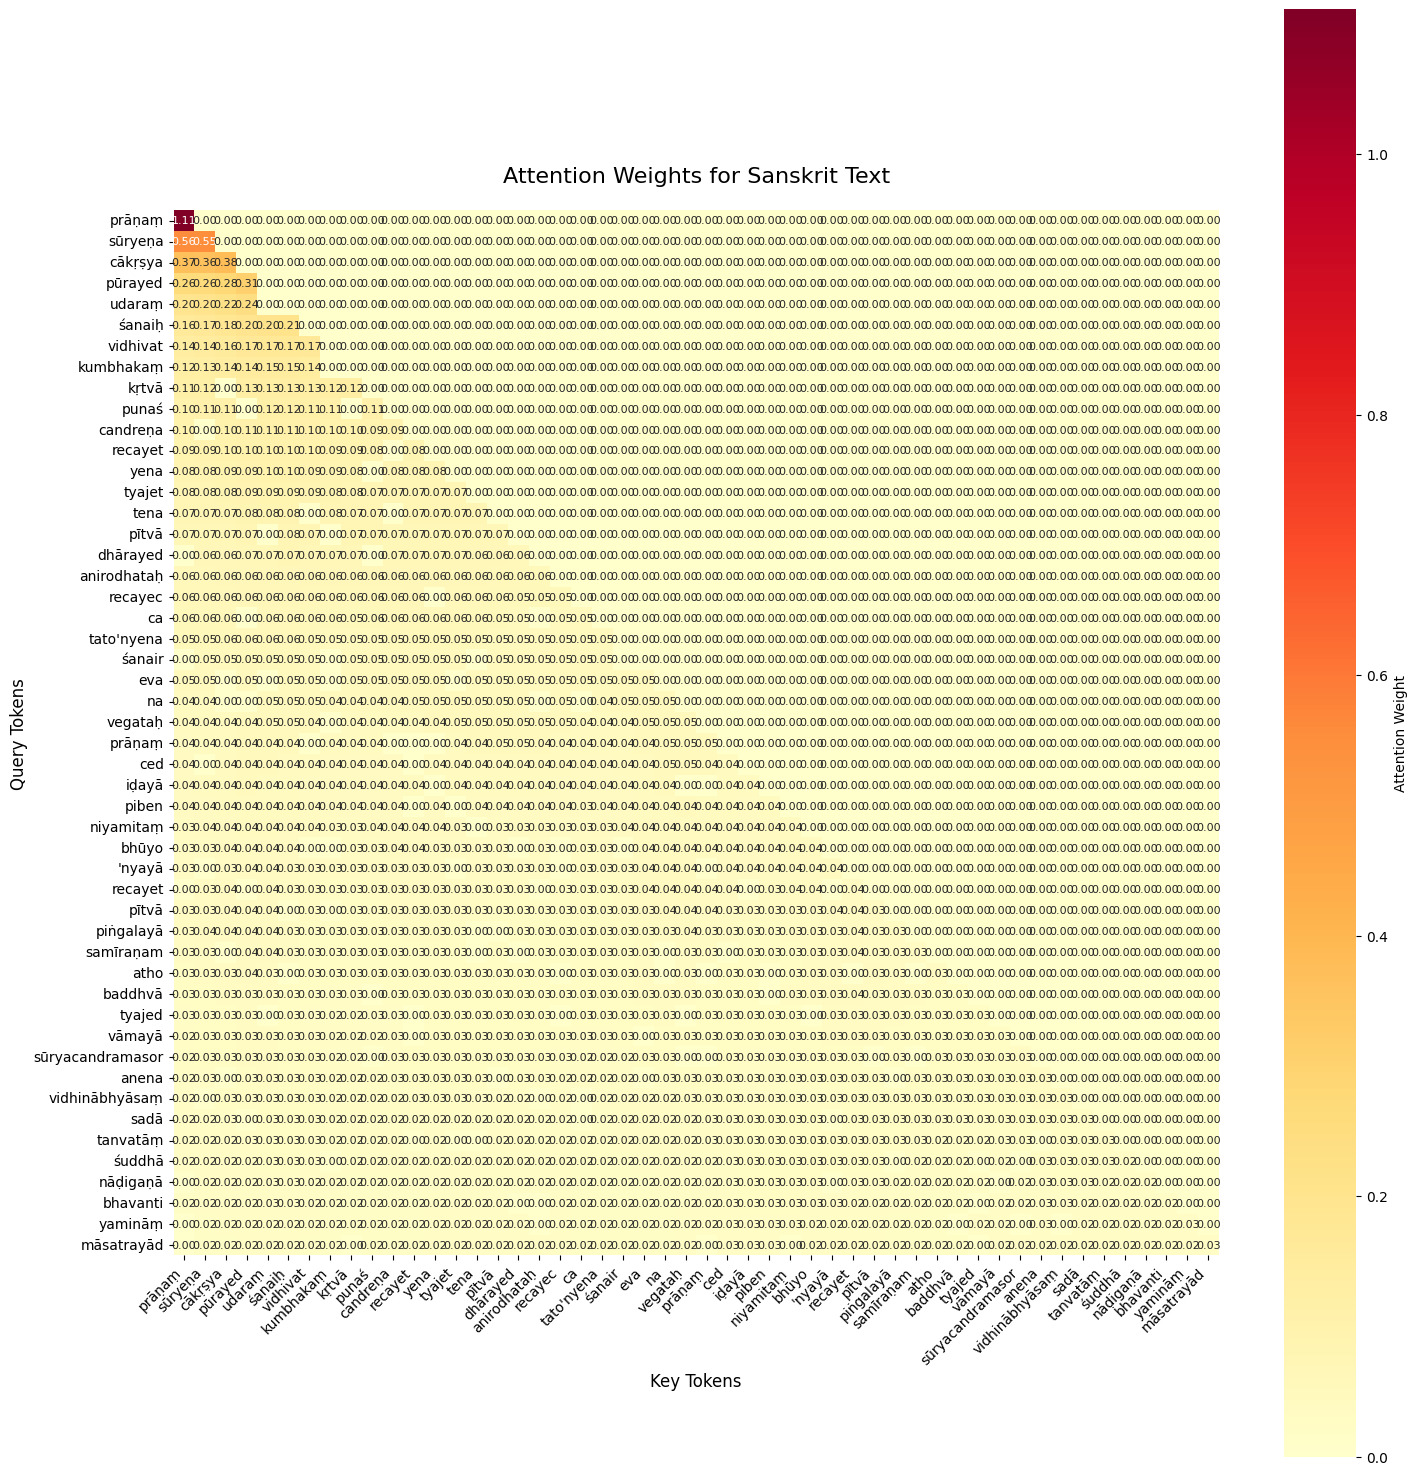


Demo completed successfully!


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import unicodedata
import math
from collections import defaultdict
from typing import Dict, List
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

#-------------------------
# Part 1: Tokenization
#-------------------------

def get_vocab(text):
    """
    Create a vocabulary dictionary with frequencies from the input text.
    Words are normalized using NFC to combine dependent vowels and other combining marks.
    """
    vocab = defaultdict(int)
    for word in text.split():
        word = unicodedata.normalize('NFC', word)  # Normalize combining marks
        tokens = list(word) + ["</w>"]  # Add end-of-word marker
        vocab[" ".join(tokens)] += 1
    return vocab

def get_stats(vocab):
    """
    Compute the frequency of all character pairs in the vocabulary.
    """
    pairs = defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += freq
    return pairs

def merge_vocab(pair, vocab):
    """
    Merge the most frequent pair in the vocabulary.
    """
    merged_vocab = {}
    bigram = " ".join(pair)
    replacement = "".join(pair)
    for word in vocab:
        new_word = word.replace(bigram, replacement)
        merged_vocab[new_word] = vocab[word]
    return merged_vocab

def finalize_vocab(vocab, original_text):
    """
    Finalize the vocabulary by ensuring full-word tokens are prioritized.
    Only subword tokens explicitly appearing in the input text are kept.
    """
    finalized_vocab = defaultdict(int)
    for word, freq in vocab.items():
        normalized_word = unicodedata.normalize('NFC', word.replace(" ", "").replace("</w>", ""))
        finalized_vocab[normalized_word] += freq

    for word in original_text.split():
        normalized_word = unicodedata.normalize('NFC', word)
        if normalized_word in finalized_vocab:
            finalized_vocab[normalized_word] += finalized_vocab.pop(normalized_word, 0)

    return finalized_vocab

def bpe_tokenizer(text, num_merges=10):
    """
    Perform Byte Pair Encoding (BPE) on the input text.
    """
    vocab = get_vocab(text)
    for _ in range(num_merges):
        pairs = get_stats(vocab)
        if not pairs:
            break
        best_pair = max(pairs, key=pairs.get)
        vocab = merge_vocab(best_pair, vocab)
        print(f"Merge: {best_pair} -> {''.join(best_pair)}")
        print(f"Updated vocab: {vocab}")

    finalized_vocab = finalize_vocab(vocab, text)
    return finalized_vocab

#-------------------------
# Part 2: Embeddings
#-------------------------

class SanskritEmbeddings:
    def __init__(self, dimension: int = 512, window_size: int = 5, min_count: int = 1):
        self.dimension = dimension
        self.window_size = window_size
        self.min_count = min_count
        self.embeddings = {}
        self.vocab = defaultdict(int)
        self.context_pairs = []

    def build_vocabulary(self, tokens_with_freq: Dict[str, int]):
        """Initialize vocabulary from BPE tokens and display frequencies."""
        self.vocab = {token: freq for token, freq in tokens_with_freq.items()
                     if freq >= self.min_count}

        # Display token frequencies
        print("\nToken Frequencies:")
        print("-" * 50)
        for token, freq in sorted(self.vocab.items(), key=lambda x: x[1], reverse=True):
            print(f"{token:<20} {freq}")
        print("-" * 50)

        # Initialize random embeddings for each token
        for token in self.vocab:
            limit = math.sqrt(6 / self.dimension)
            self.embeddings[token] = np.random.uniform(
                -limit, limit, (self.dimension,))

    def create_context_pairs(self, text: str):
        """Create context pairs using sliding window approach and display them."""
        tokens = text.split()
        for i, target in enumerate(tokens):
            start = max(0, i - self.window_size)
            end = min(len(tokens), i + self.window_size + 1)
            context = tokens[start:i] + tokens[i+1:end]
            for ctx in context:
                if target in self.vocab and ctx in self.vocab:
                    self.context_pairs.append((target, ctx))

        # Display target-context pairs
        print("\nTarget-Context Pairs Sample (first 10):")
        print("-" * 50)
        for target, context in self.context_pairs[:10]:
            print(f"Target: {target:<20} Context: {context}")
        print("-" * 50)

    def negative_sampling(self, n_samples: int = 5):
        """Generate negative samples based on token frequencies."""
        token_frequencies = np.array(list(self.vocab.values()), dtype=np.float32)
        token_frequencies = np.power(token_frequencies, 0.75)
        token_frequencies = token_frequencies / token_frequencies.sum()
        tokens = list(self.vocab.keys())
        return lambda: list(np.random.choice(tokens, size=n_samples, p=token_frequencies))

    def train(self, n_epochs: int = 5, learning_rate: float = 0.025, n_negative: int = 5):
        """Train word embeddings using negative sampling."""
        negative_sampler = self.negative_sampling(n_negative)
        for epoch in range(n_epochs):
            np.random.shuffle(self.context_pairs)
            total_loss = 0
            for target, context in self.context_pairs:
                target_vec = self.embeddings[target]
                context_vec = self.embeddings[context]
                score = self._sigmoid(np.dot(target_vec, context_vec))
                gradient = learning_rate * (1 - score)
                self.embeddings[target] += gradient * context_vec
                self.embeddings[context] += gradient * target_vec
                neg_samples = negative_sampler()
                for neg in neg_samples:
                    neg_vec = self.embeddings[neg]
                    score = self._sigmoid(np.dot(target_vec, neg_vec))
                    gradient = -learning_rate * score
                    self.embeddings[target] += gradient * neg_vec
                    self.embeddings[neg] += gradient * target_vec
                self.embeddings[target] = self._normalize(self.embeddings[target])
                self.embeddings[context] = self._normalize(self.embeddings[context])
            print(f"Epoch {epoch+1}/{n_epochs} completed")

    def _sigmoid(self, x):
        """Compute sigmoid function."""
        return 1 / (1 + np.exp(-x))

    def _normalize(self, vector):
        """L2 normalize vector."""
        norm = np.linalg.norm(vector)
        if norm > 0:
            return vector / norm
        return vector

    def get_similar_tokens(self, token: str, n: int = 5) -> List[tuple]:
        """Find n most similar tokens using cosine similarity."""
        if token not in self.embeddings:
            return []
        target_vec = self.embeddings[token]
        similarities = []
        for other_token, other_vec in self.embeddings.items():
            if other_token != token:
                sim = np.dot(target_vec, other_vec)
                similarities.append((other_token, sim))
        return sorted(similarities, key=lambda x: x[1], reverse=True)[:n]

    def get_embedding_tensor(self, token_list):
        """
        Convert selected embeddings to a tensor for use with the attention mechanism.
        """
        embedding_list = []
        for token in token_list:
            if token in self.embeddings:
                embedding_list.append(self.embeddings[token])
            else:
                embedding_list.append(np.zeros(self.dimension))
        return torch.tensor(np.array(embedding_list), dtype=torch.float32)

class SimilarityAnalyzer:
    def __init__(self, embedder: SanskritEmbeddings, n_tokens: int = 20):
        self.embedder = embedder
        self.n_tokens = n_tokens

    def create_similarity_matrix(self) -> 'pd.DataFrame':
        tokens = sorted(self.embedder.vocab.items(), key=lambda x: x[1], reverse=True)[:self.n_tokens]
        token_list = [t[0] for t in tokens]
        embeddings = np.array([self.embedder.embeddings[token] for token in token_list])
        similarity_matrix = cosine_similarity(embeddings)
        return pd.DataFrame(similarity_matrix, index=token_list, columns=token_list)

    def plot_similarity_heatmap(self, figsize=(15, 12)):
        similarity_df = self.create_similarity_matrix()
        plt.figure(figsize=figsize)
        sns.heatmap(similarity_df, annot=True, fmt='.2f', cmap='YlOrRd', square=True)
        plt.title('Token Similarity Matrix')
        plt.tight_layout()
        plt.show()

    def get_token_clusters(self, threshold: float = 0.3) -> List[List[str]]:
        similarity_df = self.create_similarity_matrix()
        clusters = []
        used_tokens = set()
        for token in similarity_df.index:
            if token in used_tokens:
                continue
            similar_tokens = similarity_df[token][similarity_df[token] >= threshold].index.tolist()
            if len(similar_tokens) > 1:
                clusters.append(similar_tokens)
                used_tokens.update(similar_tokens)
        return clusters

    def print_detailed_similarities(self):
        similarity_df = self.create_similarity_matrix()
        for token in similarity_df.index:
            similarities = similarity_df[token].sort_values(ascending=False)
            print(f"\nRelationships for '{token}':")
            print("-" * 50)
            for similar_token, score in similarities[1:6].items():
                print(f"→ {similar_token:<20} {score:.4f}")
            print()

#-------------------------
# Part 3: Attention Mechanism
#-------------------------

class SingleHeadAttention(nn.Module):
    def __init__(self, embedding_dim, dropout_rate=0.1):
        super(SingleHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim
        self.query_projection = nn.Linear(embedding_dim, embedding_dim)
        self.key_projection = nn.Linear(embedding_dim, embedding_dim)
        self.value_projection = nn.Linear(embedding_dim, embedding_dim)
        self.output_projection = nn.Linear(embedding_dim, embedding_dim)
        self.dropout = nn.Dropout(dropout_rate)
        self.scale = 1.0 / math.sqrt(embedding_dim)

    def forward(self, query, key, value, mask=None):
        batch_size = query.size(0)
        query_len = query.size(1)
        key_len = key.size(1)
        value_len = value.size(1)
        Q = self.query_projection(query)
        K = self.key_projection(key)
        V = self.value_projection(value)
        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) * self.scale
        if mask is not None:
            attention_scores = attention_scores.masked_fill(mask == 0, -1e9)
        attention_weights = F.softmax(attention_scores, dim=-1)
        attention_weights = self.dropout(attention_weights)
        output = torch.matmul(attention_weights, V)
        output = self.output_projection(output)
        return output, attention_weights

    def get_attention_map(self, query, key, value, mask=None):
        _, attention_weights = self.forward(query, key, value, mask)
        return attention_weights

class PositionalEncoding(nn.Module):
    def __init__(self, embedding_dim, max_seq_length=1000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_seq_length, embedding_dim)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embedding_dim, 2).float() * (-math.log(10000.0) / embedding_dim))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1), :]
        return x

class SanskritTransformerBlock(nn.Module):
    def __init__(self, embedding_dim, ff_dim=2048, dropout_rate=0.1):
        super(SanskritTransformerBlock, self).__init__()
        self.attention = SingleHeadAttention(embedding_dim, dropout_rate)
        self.norm1 = nn.LayerNorm(embedding_dim)
        self.norm2 = nn.LayerNorm(embedding_dim)
        self.feed_forward = nn.Sequential(
            nn.Linear(embedding_dim, ff_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(ff_dim, embedding_dim)
        )
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, mask=None):
        attn_output, _ = self.attention(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x

class SanskritLanguageModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim=512, num_layers=4, ff_dim=2048, dropout_rate=0.1):
        super(SanskritLanguageModel, self).__init__()
        self.token_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.positional_encoding = PositionalEncoding(embedding_dim)
        self.transformer_blocks = nn.ModuleList([
            SanskritTransformerBlock(embedding_dim, ff_dim, dropout_rate)
            for _ in range(num_layers)
        ])
        self.output_layer = nn.Linear(embedding_dim, vocab_size)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, mask=None):
        x = self.token_embedding(x)
        x = self.positional_encoding(x)
        x = self.dropout(x)
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x, mask)
        logits = self.output_layer(x)
        return logits

def create_causal_mask(seq_len):
    mask = torch.tril(torch.ones(1, seq_len, seq_len))
    return mask

#-------------------------
# Part 4: Integration and Usage
#-------------------------

def create_embeddings(text: str, final_vocab: Dict[str, int], dimension: int = 512) -> SanskritEmbeddings:
    embedder = SanskritEmbeddings(dimension=dimension)
    embedder.build_vocabulary(final_vocab)
    embedder.create_context_pairs(text)
    embedder.train()
    return embedder

def convert_embeddings_to_model(embedder: SanskritEmbeddings, model: SanskritLanguageModel):
    token_to_id = {token: idx for idx, token in enumerate(embedder.vocab.keys())}
    embedding_weights = torch.zeros((len(token_to_id), embedder.dimension))
    for token, idx in token_to_id.items():
        embedding_weights[idx] = torch.tensor(embedder.embeddings[token], dtype=torch.float32)
    model.token_embedding.weight.data.copy_(embedding_weights)
    return token_to_id

def prepare_data_for_attention(text, embedder, batch_size=1):
    tokens = text.split()
    embeddings = embedder.get_embedding_tensor(tokens)
    if batch_size > 1:
        embeddings = embeddings.unsqueeze(0).repeat(batch_size, 1, 1)
    else:
        embeddings = embeddings.unsqueeze(0)
    return embeddings

def visualize_attention(model, text, embedder, token_to_id):
    """
    Visualize attention weights for a piece of Sanskrit text with improved aesthetics.

    Args:
        model: Trained SanskritLanguageModel
        text: Sanskrit text to visualize
        embedder: SanskritEmbeddings object with trained embeddings
        token_to_id: Mapping from tokens to IDs

    Returns:
        None (displays plots)
    """
    # Tokenize the text
    tokens = text.split()

    # Convert tokens to IDs
    token_ids = [token_to_id.get(token, 0) for token in tokens]
    token_ids_tensor = torch.tensor(token_ids).unsqueeze(0)  # Add batch dimension

    # Create causal mask
    mask = create_causal_mask(len(tokens))

    # Get embeddings from the model and compute attention weights
    with torch.no_grad():
        embedded = model.token_embedding(token_ids_tensor)
        positioned = model.positional_encoding(embedded)

        # Get attention weights from first transformer block
        first_transformer = model.transformer_blocks[0]
        _, attention_weights = first_transformer.attention(positioned, positioned, positioned, mask)

    # Convert attention weights to numpy for visualization
    attention_weights_np = attention_weights[0].numpy()

    # Set up the figure with a dynamic size based on the number of tokens
    num_tokens = len(tokens)
    fig_size = max(10, num_tokens * 0.3)  # Dynamically scale figure size
    plt.figure(figsize=(fig_size, fig_size))

    # Use a different colormap for better contrast (e.g., 'YlOrRd' for yellow-to-red)
    # Add annotations for clarity, adjust font sizes, and improve label readability
    sns.heatmap(
        attention_weights_np,
        cmap='YlOrRd',  # Changed colormap for better contrast
        xticklabels=tokens,
        yticklabels=tokens,
        annot=True,  # Add numerical annotations
        fmt='.2f',  # Format annotations to 2 decimal places
        annot_kws={'size': 8},  # Size of the annotations
        cbar_kws={'label': 'Attention Weight'},  # Label the colorbar
        square=True,  # Ensure square cells for better alignment
    )

    # Improve title and labels
    plt.title('Attention Weights for Sanskrit Text', fontsize=16, pad=20)
    plt.xlabel('Key Tokens', fontsize=12)
    plt.ylabel('Query Tokens', fontsize=12)

    # Rotate and adjust tick labels for better readability
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)

    # Tight layout to prevent clipping
    plt.tight_layout()

    # Show the plot
    plt.show()

def demo_sanskrit_language_model():
    # Sample Sanskrit text (use your larger corpus here)
    text = '''prāṇaṃ sūryeṇa cākṛṣya pūrayed udaraṃ śanaiḥ
vidhivat kumbhakaṃ kṛtvā punaś candreṇa recayet
yena tyajet tena pītvā dhārayed anirodhataḥ
recayec ca tato'nyena śanair eva na vegataḥ
prāṇaṃ ced iḍayā piben niyamitaṃ bhūyo 'nyayā recayet pītvā piṅgalayā samīraṇam atho baddhvā tyajed vāmayā
sūryacandramasor anena vidhinābhyāsaṃ sadā tanvatāṃ śuddhā nāḍigaṇā bhavanti yamināṃ māsatrayād ūrdhvataḥ
prātar madhyaṃdine sāyam ardharātre ca kumbhakān
śanair aśītiparyantaṃ caturvāraṃ samabhyaset
kanīyasi bhavet svedaḥ kampo bhavati madhyame
uttame sthānam āpnoti tato vāyuṃ nibandhayet
jalena śramajātena gātramardanam ācaret
dṛḍhatā laghutā caiva tena gātrasya jāyate
abhyāsakāle prathame śastaṃ kṣīrājyabhojanam
tato 'bhyāse dṛḍhībhūte na tādṛṅniyamagrahaḥ
yathā siṃho gajo vyāghro bhaved vaśyaḥ śanaiḥ śanaiḥ
tathaiva sevito vāyur anyathā hanti sādhakam
prāṇāyāmena yuktena sarvarogakṣayo bhavet
ayuktābhyāsayogena sarvarogasamudgamaḥ
hikkā śvāsaś ca kāsaś ca śiraḥkarṇākṣivedanāḥ
bhavanti vividhāḥ rogāḥ pavanasya prakopataḥ
yuktaṃ yuktaṃ tyajed vāyuṃ yuktaṃ yuktaṃ ca pūrayet
yuktaṃ yuktaṃ ca badhnīyād evaṃ siddhim avāpnuyāt
yadā tu nāḍīśuddhiḥ syāt tathā cihnāni bāhyataḥ
kāyasya kṛśatā kāntis tadā jāyate niścitam
yatheṣṭaṃ dhāraṇaṃ vāyor analasya pradīpanam
nādābhivyaktir ārogyaṃ jāyate nāḍiśodhanāt
medaḥśleṣmādhikaḥ pūrvaṃ ṣaṭkarmāṇi samācaret
anyas tu nācaret tāni doṣāṇāṃ samabhāvataḥ
dhautir vastis tathā netis trāṭakaṃ naulikaṃ tathā
kapālabhātiś caitāni ṣaṭkarmāṇi pracakṣate
karma ṣaṭkam idaṃ gopyaṃ ghaṭaśodhanakārakam
vicitraguṇasaṃdhāyi pūjyate yogipuṃgavaiḥ
caturaṅgulavistāraṃ hastapañcadaśāyatam
gurūpadiṣṭamārgeṇa siktaṃ vastraṃ śanair graset
punaḥ pratyāharec caitad uditaṃ dhautikarma tat
kāsaśvāsaplīhakuṣṭhaṃ kapharogāś ca viṃśatiḥ
dhautikarmaprabhāveṇa prayānty eva na saṃśayaḥ
nābhidaghnajale pāyau nyastanālotkaṭāsanaḥ
ādhārākuñcanaṃ kuryāt kṣālanaṃ vastikarma tat
gulmaplīhodaraṃ cāpi vātapittakaphodbhavāḥ
vastikarmaprabhāveṇa kṣīyante sakalāmayāḥ
dhātvindriyāntaḥkaraṇaprasādaṃ dadyāc ca kāntiṃ dahanapradīptam
aśeṣadoṣopacayaṃ nihanyād abhyasyamānaṃ jalavastikarma
sūtraṃ vitastisusnigdhaṃ nāsānāle praveśayet
mukhān nirgamayec caiṣā netiḥ siddhair nigadyate
kapālaśodhinī caiva divyadṛṣṭipradāyinī
jatrūrdhvajātarogaughaṃ netir āśu nihanti ca
nirīkṣen niścaladṛśā sūkṣmalakṣyaṃ samāhitaḥ
aśrusampātaparyantam ācāryais trāṭakaṃ smṛtam
mocanaṃ netrarogāṇāṃ tandrādīnāṃ kapāṭakam
yatnatas trāṭakaṃ gopyaṃ yathā hāṭakapeṭakam
amandāvartavegena tundaṃ savyāpasavyataḥ
natāṃso bhrāmayed eṣā nauliḥ siddhaiḥ praśasyate
mandāgnisaṃdīpanapācanādisaṃdhāyikānandakarī sadaiva
aśeṣadoṣāmayaśoṣaṇī ca haṭhakriyā maulir iyaṃ ca nauliḥ
bhastrāval lohakārasya recapūrau sasambhramau
kapālabhātir vikhyātā kaphadoṣaviśoṣaṇī
ṣaṭkarmanirgatasthaulyakaphadoṣamalādikaḥ
prāṇāyāmaṃ tataḥ kuryād anāyāsena sidhyati
prāṇāyāmair eva sarve praśuṣyanti malā iti
ācāryāṇāṃ tu keṣāṃcid anyat karma na saṃmatam
udaragatapadārtham udvamanti pavanam apānam udīrya kaṇṭhanāle
kramaparicayavaśyanāḍicakrā gajakaraṇīti nigadyate haṭhajñaiḥ
brahmādayo 'pi tridaśāḥ pavanābhyāsatatparāḥ
abhūvann antakabhayāt tasmāt pavanam abhyaset
yāvad baddho marud dehe yāvac cittaṃ nirākulam
yāvad dṛṣṭir bhruvor madhye tāvat kālabhayaṃ kutaḥ
vidhivat prāṇasaṃyāmair nāḍīcakre viśodhite
suṣumṇāvadanaṃ bhittvā sukhād viśati mārutaḥ
mārute madhyasaṃcāre manaḥsthairyaṃ prajāyate
yo manaḥsusthirībhāvaḥ saivāvasthā manonmanī
tatsiddhaye vidhānajñāś citrān kurvanti kumbhakān
vicitrakumbhakābhyāsād vicitrāṃ siddhim āpnuyāt
sūryabhedanam ujjāyī śītkārī śītalī tathā
bhastrikā bhrāmarī mūrchā plāvinīty aṣṭakumbhakāḥ
pūrakānte tu kartavyo bandho jālaṃdharābhidhaḥ
kumbhakānte recakādau kartavyas tūḍḍiyānakaḥ
adhastāt kuñcanenāśu kaṇṭhasaṃkocane kṛte
madhye paścimatānena syāt prāṇo brahmanāḍigaḥ
āpānam ūrdhvam utthāpya prāṇaṃ kaṇṭhād adho nayet
yogī jarāvimuktaḥ san ṣoḍaśābdavayā bhavet
āsane sukhade yogī baddhvā caivāsanaṃ tataḥ
dakṣanāḍyā samākṛṣya bahiḥsthaṃ pavanaṃ śanaiḥ
ā keśād ā nakhāgrāc ca nirodhāvadhi kumbhayet
tataḥ śanaiḥ savyanāḍyā recayet pavanaṃ śanaiḥ
kapālaśodhanaṃ vātadoṣaghnaṃ kṛmidoṣahṛt
punaḥ punar idaṃ kāryaṃ sūryabhedanam uttamam
mukhaṃ saṃyamya nāḍībhyām ākṛṣya pavanaṃ śanaiḥ
yathā lagati kaṇṭhāt tu hṛdayāvadhi sasvanam
pūrvavat kumbhayet prāṇaṃ recayed iḍayā tathā
śleṣmadoṣaharaṃ kaṇṭhe dehānalavivardhanam
nāḍījalodaradhātugatadoṣavināśanam
gacchatā tiṣṭhatā kāryam ujjāyyākhyaṃ tu kumbhakam
śītkārīṃ kuryāt tathā vaktre ghrāṇenaiva vijṛmbhikām
evam abhyāsayogena kāmadevo dvitīyakaḥ
yoginī cakrasaṃmānyaḥ sṛṣṭisaṃhārakārakaḥ
na kṣudhā na tṛṣā nidrā naivālasyaṃ prajāyate
bhavet sattvaṃ ca dehasya sarvopadravavarjitaḥ
anena vidhinā satyaṃ yogīndro bhūmimaṇḍale
jihvayā vāyum ākṛṣya pūrvavat kumbhasādhanam
śanakair ghrāṇarandhrābhyāṃ recayet pavanaṃ sudhīḥ
gulmaplīhādikān rogān jvaraṃ pittaṃ kṣudhāṃ tṛṣām
viṣāṇi śītalī nāma kumbhikeyaṃ nihanti hi
ūrvor upari saṃsthāpya śubhe pādatale ubhe
padmāsanaṃ bhaved etat sarvapāpapraṇāśanam
samyak padmāsanaṃ baddhvā samagrīvodaraḥ sudhīḥ
mukhaṃ saṃyamya yatnena prāṇaṃ ghrāṇena recayet
yathā lagati hṛtkaṇṭhe kapālāvadhi sasvanam
vegena pūrayec cāpi hṛtpadmāvadhi mārutam
punar virecayet tadvat pūrayec ca punaḥ punaḥ
yathaiva lohakāreṇa bhastrā vegena cālyate
tathaiva svaśarīrasthaṃ cālayet pavanaṃ dhiyā
yadā śramo bhaved dehe tadā sūryeṇa pūrayet
yathodaraṃ bhavet pūrṇam anilena tathā laghu
dhārayen nāsikāṃ madhyātarjanībhyāṃ vinā dṛḍham
vidhivat kumbhakaṃ kṛtvā recayed iḍayānilam
vātapittaśleṣmaharaṃ śarīrāgnivivardhanam
kuṇḍalībodhakaṃ kṣipraṃ pavanaṃ sukhadaṃ hitam
brahmanāḍīmukhe saṃsthakaphādyargalanāśanam
brahmanāḍī
samyag gātrasamudbhūtagranthitrayavibhedakam
viśeṣeṇaiva kartavyaṃ bhastrākhyaṃ kumbakaṃ tv idam
vegād ghoṣaṃ pūrakaṃ bhṛṅganādaṃ bhṛṅgīnādaṃ recakaṃ mandamandam
yogīndrāṃśam evam abhyāsayogāc citte jātā kācid ānandalīlā
pūrakānte gāḍhataraṃ baddhvā jālaṃdharaṃ śanaiḥ
recayen mūrchākhyeyaṃ manomūrchā sukhapradā
antaḥ pravartitodāramārutāpūritodaraḥ
payasy agādhe'pi sukhāt plavate padmapattravat
prāṇāyāmas tridhā prokto recapūrakakumbhakaiḥ
sahitaḥ kevalaś ceti kumbhako dvividho mataḥ
yāvat kevalasiddhiḥ syāt sahitaṃ tāvad abhyaset
recakaṃ pūrakaṃ muktvā sukhaṃ yad vāyudhāraṇam
prāṇāyāmo'yam ity uktaḥ sa vai kevalakumbhakaḥ
kumbhake kevale siddhe recapūrakavarjite
na tasya durlabhaṃ kiṃcit triṣu lokeṣu vidyate
śaktaḥ kevalakumbhena yathe'''

    # 1. Tokenize
    print("Step 1: Tokenizing text...")
    num_merges = 10
    final_vocab = bpe_tokenizer(text, num_merges)
    print(f"Vocabulary size: {len(final_vocab)}")

    # 2. Create embeddings
    print("\nStep 2: Creating embeddings...")
    embedding_dim = 512
    embedder = create_embeddings(text, final_vocab, embedding_dim)

    # 2.5 Analyze similarities and clusters
    print("\nStep 2.5: Analyzing similarities and clusters...")
    analyzer = SimilarityAnalyzer(embedder, n_tokens=20)
    clusters = analyzer.get_token_clusters(threshold=0.3)
    print("\nToken Clusters (similarity threshold = 0.3):")
    print("-" * 50)
    for i, cluster in enumerate(clusters, 1):
        print(f"Cluster {i}: {', '.join(cluster)}")
    print("-" * 50)

    # 3. Create the language model
    print("\nStep 3: Creating Sanskrit language model...")
    vocab_size = len(final_vocab)
    model = SanskritLanguageModel(
        vocab_size=vocab_size,
        embedding_dim=embedding_dim,
        num_layers=2,
        ff_dim=1024,
        dropout_rate=0.1
    )

    # 4. Initialize model with pre-trained embeddings
    print("\nStep 4: Initializing model with pre-trained embeddings...")
    token_to_id = convert_embeddings_to_model(embedder, model)

    # 5. Prepare a batch of data
    print("\nStep 5: Preparing data for model...")
    # Use a larger portion of the corpus (e.g., first 50 tokens or the full text split)
    max_tokens = min(50, len(text.split()))  # Limit to 50 for practicality, adjust as needed
    token_ids = [token_to_id.get(token, 0) for token in text.split()[:max_tokens]]
    token_ids_tensor = torch.tensor(token_ids).unsqueeze(0)

    # 6. Create causal mask
    mask = create_causal_mask(len(token_ids))

    # 7. Forward pass through the model
    print("\nStep 6: Running forward pass through the model...")
    with torch.no_grad():
        logits = model(token_ids_tensor, mask)
    print(f"Output shape: {logits.shape}")

    # 8. Visualize attention weights
    print("\nStep 7: Visualizing attention weights...")
    # Use the same larger portion for visualization
    sample_text = " ".join(text.split()[:max_tokens])
    visualize_attention(model, sample_text, embedder, token_to_id)

    print("\nDemo completed successfully!")
    return model, embedder, token_to_id

if __name__ == "__main__":
    import pandas as pd
    model, embedder, token_to_id = demo_sanskrit_language_model()

Step 1: Tokenizing text...
Merge: ('a', 'ṃ') -> aṃ
Updated vocab: {'p r ā ṇ aṃ </w>': 5, 's ū r y e ṇ a </w>': 2, 'c ā k ṛ ṣ y a </w>': 1, 'p ū r a y e d </w>': 1, 'u d a r aṃ </w>': 1, 'ś a n a i ḥ </w>': 8, 'v i d h i v a t </w>': 3, 'k u m b h a k aṃ </w>': 3, 'k ṛ t v ā </w>': 2, 'p u n a ś </w>': 1, 'c a n d r e ṇ a </w>': 1, 'r e c a y e t </w>': 5, 'y e n a </w>': 1, 't y a j e t </w>': 1, 't e n a </w>': 2, 'p ī t v ā </w>': 2, 'd h ā r a y e d </w>': 1, 'a n i r o d h a t a ḥ </w>': 1, 'r e c a y e c </w>': 1, 'c a </w>': 14, "t a t o ' n y e n a </w>": 1, 'ś a n a i r </w>': 3, 'e v a </w>': 3, 'n a </w>': 7, 'v e g a t a ḥ </w>': 1, 'c e d </w>': 1, 'i ḍ a y ā </w>': 2, 'p i b e n </w>': 1, 'n i y a m i t aṃ </w>': 1, 'b h ū y o </w>': 1, "' n y a y ā </w>": 1, 'p i ṅ g a l a y ā </w>': 1, 's a m ī r a ṇ a m </w>': 1, 'a t h o </w>': 1, 'b a d d h v ā </w>': 4, 't y a j e d </w>': 2, 'v ā m a y ā </w>': 1, 's ū r y a c a n d r a m a s o r </w>': 1, 'a n e n a </w>': 2, 'v i 

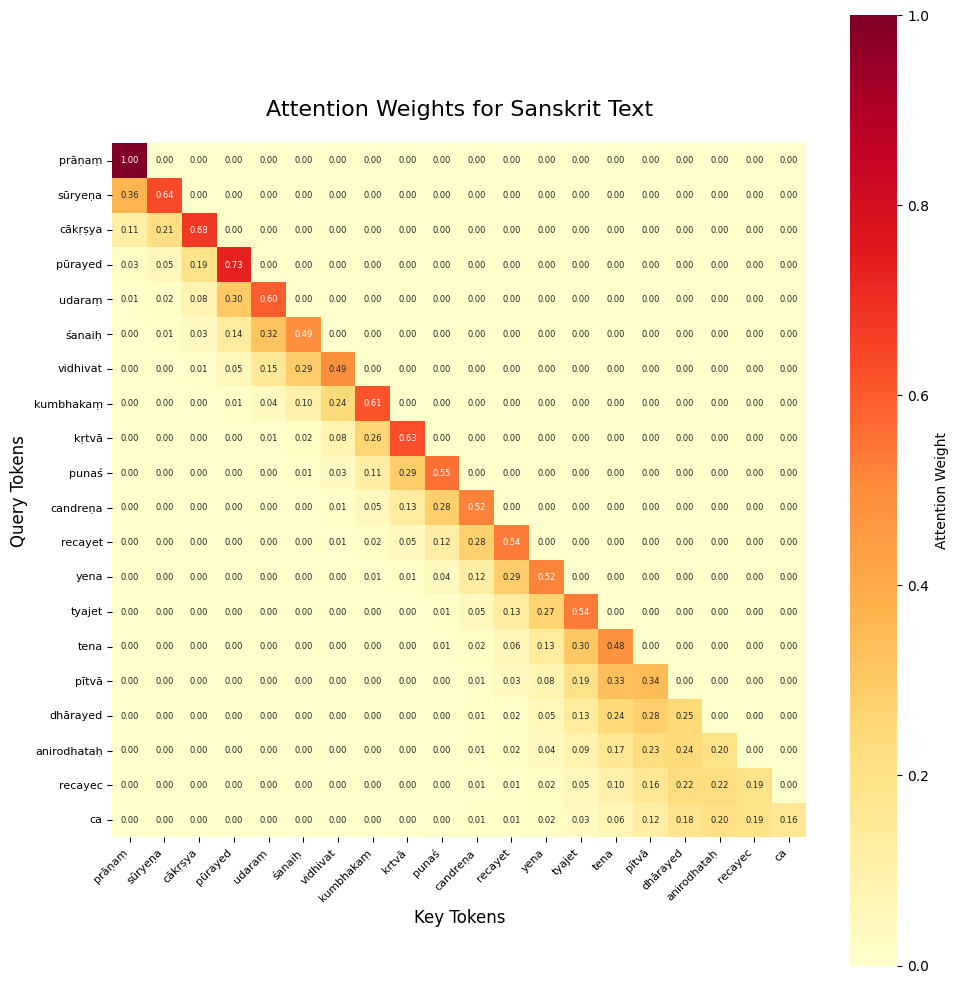


Demo completed successfully!


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import unicodedata
import math
from collections import defaultdict
from typing import Dict, List
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

#-------------------------
# Part 1: Tokenization
#-------------------------

def get_vocab(text):
    """
    Create a vocabulary dictionary with frequencies from the input text.
    Words are normalized using NFC to combine dependent vowels and other combining marks.
    """
    vocab = defaultdict(int)
    for word in text.split():
        word = unicodedata.normalize('NFC', word)  # Normalize combining marks
        tokens = list(word) + ["</w>"]  # Add end-of-word marker
        vocab[" ".join(tokens)] += 1
    return vocab

def get_stats(vocab):
    """
    Compute the frequency of all character pairs in the vocabulary.
    """
    pairs = defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols) - 1):
            pairs[symbols[i], symbols[i + 1]] += freq
    return pairs

def merge_vocab(pair, vocab):
    """
    Merge the most frequent pair in the vocabulary.
    """
    merged_vocab = {}
    bigram = " ".join(pair)
    replacement = "".join(pair)
    for word in vocab:
        new_word = word.replace(bigram, replacement)
        merged_vocab[new_word] = vocab[word]
    return merged_vocab

def finalize_vocab(vocab, original_text):
    """
    Finalize the vocabulary by ensuring full-word tokens are prioritized.
    Only subword tokens explicitly appearing in the input text are kept.
    """
    finalized_vocab = defaultdict(int)
    for word, freq in vocab.items():
        normalized_word = unicodedata.normalize('NFC', word.replace(" ", "").replace("</w>", ""))
        finalized_vocab[normalized_word] += freq

    for word in original_text.split():
        normalized_word = unicodedata.normalize('NFC', word)
        if normalized_word in finalized_vocab:
            finalized_vocab[normalized_word] += finalized_vocab.pop(normalized_word, 0)

    return finalized_vocab

def bpe_tokenizer(text, num_merges=10):
    """
    Perform Byte Pair Encoding (BPE) on the input text.
    """
    vocab = get_vocab(text)
    for _ in range(num_merges):
        pairs = get_stats(vocab)
        if not pairs:
            break
        best_pair = max(pairs, key=pairs.get)
        vocab = merge_vocab(best_pair, vocab)
        print(f"Merge: {best_pair} -> {''.join(best_pair)}")
        print(f"Updated vocab: {vocab}")

    finalized_vocab = finalize_vocab(vocab, text)
    return finalized_vocab

#-------------------------
# Part 2: Embeddings
#-------------------------

class SanskritEmbeddings:
    def __init__(self, dimension: int = 512, window_size: int = 5, min_count: int = 1):
        self.dimension = dimension
        self.window_size = window_size
        self.min_count = min_count
        self.embeddings = {}
        self.vocab = defaultdict(int)
        self.context_pairs = []

    def build_vocabulary(self, tokens_with_freq: Dict[str, int]):
        """Initialize vocabulary from BPE tokens and display frequencies."""
        self.vocab = {token: freq for token, freq in tokens_with_freq.items()
                     if freq >= self.min_count}

        # Display token frequencies
        print("\nToken Frequencies:")
        print("-" * 50)
        for token, freq in sorted(self.vocab.items(), key=lambda x: x[1], reverse=True):
            print(f"{token:<20} {freq}")
        print("-" * 50)

        # Initialize random embeddings for each token
        for token in self.vocab:
            limit = math.sqrt(6 / self.dimension)
            self.embeddings[token] = np.random.uniform(
                -limit, limit, (self.dimension,))

    def create_context_pairs(self, text: str):
        """Create context pairs using sliding window approach and display them."""
        tokens = text.split()
        for i, target in enumerate(tokens):
            start = max(0, i - self.window_size)
            end = min(len(tokens), i + self.window_size + 1)
            context = tokens[start:i] + tokens[i+1:end]
            for ctx in context:
                if target in self.vocab and ctx in self.vocab:
                    self.context_pairs.append((target, ctx))

        # Display target-context pairs
        print("\nTarget-Context Pairs Sample (first 10):")
        print("-" * 50)
        for target, context in self.context_pairs[:10]:
            print(f"Target: {target:<20} Context: {context}")
        print("-" * 50)

    def negative_sampling(self, n_samples: int = 5):
        """Generate negative samples based on token frequencies."""
        token_frequencies = np.array(list(self.vocab.values()), dtype=np.float32)
        token_frequencies = np.power(token_frequencies, 0.75)
        token_frequencies = token_frequencies / token_frequencies.sum()
        tokens = list(self.vocab.keys())
        return lambda: list(np.random.choice(tokens, size=n_samples, p=token_frequencies))

    def train(self, n_epochs: int = 10, learning_rate: float = 0.025, n_negative: int = 5):
        """Train word embeddings using negative sampling."""
        negative_sampler = self.negative_sampling(n_negative)
        for epoch in range(n_epochs):
            np.random.shuffle(self.context_pairs)
            total_loss = 0
            for target, context in self.context_pairs:
                target_vec = self.embeddings[target]
                context_vec = self.embeddings[context]
                score = self._sigmoid(np.dot(target_vec, context_vec))
                gradient = learning_rate * (1 - score)
                self.embeddings[target] += gradient * context_vec
                self.embeddings[context] += gradient * target_vec
                neg_samples = negative_sampler()
                for neg in neg_samples:
                    neg_vec = self.embeddings[neg]
                    score = self._sigmoid(np.dot(target_vec, neg_vec))
                    gradient = -learning_rate * score
                    self.embeddings[target] += gradient * neg_vec
                    self.embeddings[neg] += gradient * target_vec
                self.embeddings[target] = self._normalize(self.embeddings[target])
                self.embeddings[context] = self._normalize(self.embeddings[context])
            print(f"Epoch {epoch+1}/{n_epochs} completed")

    def _sigmoid(self, x):
        """Compute sigmoid function."""
        return 1 / (1 + np.exp(-x))

    def _normalize(self, vector):
        """L2 normalize vector."""
        norm = np.linalg.norm(vector)
        if norm > 0:
            return vector / norm
        return vector

    def get_similar_tokens(self, token: str, n: int = 5) -> List[tuple]:
        """Find n most similar tokens using cosine similarity."""
        if token not in self.embeddings:
            return []
        target_vec = self.embeddings[token]
        similarities = []
        for other_token, other_vec in self.embeddings.items():
            if other_token != token:
                sim = np.dot(target_vec, other_vec)
                similarities.append((other_token, sim))
        return sorted(similarities, key=lambda x: x[1], reverse=True)[:n]

    def get_embedding_tensor(self, token_list):
        """
        Convert selected embeddings to a tensor for use with the attention mechanism.
        """
        embedding_list = []
        for token in token_list:
            if token in self.embeddings:
                embedding_list.append(self.embeddings[token])
            else:
                embedding_list.append(np.zeros(self.dimension))
        return torch.tensor(np.array(embedding_list), dtype=torch.float32)

class SimilarityAnalyzer:
    def __init__(self, embedder: SanskritEmbeddings, n_tokens: int = 20):
        self.embedder = embedder
        self.n_tokens = n_tokens

    def create_similarity_matrix(self) -> pd.DataFrame:
        tokens = sorted(self.embedder.vocab.items(), key=lambda x: x[1], reverse=True)[:self.n_tokens]
        token_list = [t[0] for t in tokens]
        embeddings = np.array([self.embedder.embeddings[token] for token in token_list])
        similarity_matrix = cosine_similarity(embeddings)
        return pd.DataFrame(similarity_matrix, index=token_list, columns=token_list)

    def plot_similarity_heatmap(self, figsize=(15, 12)):
        similarity_df = self.create_similarity_matrix()
        plt.figure(figsize=figsize)
        sns.heatmap(similarity_df, annot=True, fmt='.2f', cmap='YlOrRd', square=True)
        plt.title('Token Similarity Matrix')
        plt.tight_layout()
        plt.show()

    def get_token_clusters(self, threshold: float = 0.3) -> List[List[str]]:
        similarity_df = self.create_similarity_matrix()
        clusters = []
        used_tokens = set()
        for token in similarity_df.index:
            if token in used_tokens:
                continue
            similar_tokens = similarity_df[token][similarity_df[token] >= threshold].index.tolist()
            if len(similar_tokens) > 1:
                clusters.append(similar_tokens)
                used_tokens.update(similar_tokens)
        return clusters

    def print_detailed_similarities(self):
        similarity_df = self.create_similarity_matrix()
        for token in similarity_df.index:
            similarities = similarity_df[token].sort_values(ascending=False)
            print(f"\nRelationships for '{token}':")
            print("-" * 50)
            for similar_token, score in similarities[1:6].items():
                print(f"→ {similar_token:<20} {score:.4f}")
            print()

#-------------------------
# Part 3: Attention Mechanism
#-------------------------

class SingleHeadAttention(nn.Module):
    def __init__(self, embedding_dim, dropout_rate=0.1):
        super(SingleHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim
        self.query_projection = nn.Linear(embedding_dim, embedding_dim)
        self.key_projection = nn.Linear(embedding_dim, embedding_dim)
        self.value_projection = nn.Linear(embedding_dim, embedding_dim)
        self.output_projection = nn.Linear(embedding_dim, embedding_dim)
        self.dropout = nn.Dropout(dropout_rate)
        self.scale = 1.0 / math.sqrt(embedding_dim)

    def forward(self, query, key, value, mask=None):
        batch_size = query.size(0)
        query_len = query.size(1)
        key_len = key.size(1)
        value_len = value.size(1)
        Q = self.query_projection(query)
        K = self.key_projection(key)
        V = self.value_projection(value)
        attention_scores = torch.matmul(Q, K.transpose(-2, -1)) * self.scale

        # Clip attention scores for numerical stability
        attention_scores = torch.clamp(attention_scores, min=-10, max=10)

        if mask is not None:
            attention_scores = attention_scores.masked_fill(mask == 0, -1e9)

        attention_weights = F.softmax(attention_scores, dim=-1)
        attention_weights = self.dropout(attention_weights)
        output = torch.matmul(attention_weights, V)
        output = self.output_projection(output)
        return output, attention_weights

class PositionalEncoding(nn.Module):
    def __init__(self, embedding_dim, max_seq_length=1000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_seq_length, embedding_dim)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embedding_dim, 2).float() * (-math.log(10000.0) / embedding_dim))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:, :x.size(1), :]
        return x

class SanskritTransformerBlock(nn.Module):
    def __init__(self, embedding_dim, ff_dim=2048, dropout_rate=0.1):
        super(SanskritTransformerBlock, self).__init__()
        self.attention = SingleHeadAttention(embedding_dim, dropout_rate)
        self.norm1 = nn.LayerNorm(embedding_dim)
        self.norm2 = nn.LayerNorm(embedding_dim)
        self.feed_forward = nn.Sequential(
            nn.Linear(embedding_dim, ff_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(ff_dim, embedding_dim)
        )
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, mask=None):
        attn_output, _ = self.attention(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x

class SanskritLanguageModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim=512, num_layers=4, ff_dim=2048, dropout_rate=0.1):
        super(SanskritLanguageModel, self).__init__()
        self.token_embedding = nn.Embedding(vocab_size, embedding_dim)
        self.positional_encoding = PositionalEncoding(embedding_dim)
        self.transformer_blocks = nn.ModuleList([
            SanskritTransformerBlock(embedding_dim, ff_dim, dropout_rate)
            for _ in range(num_layers)
        ])
        self.output_layer = nn.Linear(embedding_dim, vocab_size)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, mask=None):
        x = self.token_embedding(x)
        x = self.positional_encoding(x)
        x = self.dropout(x)
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x, mask)
        logits = self.output_layer(x)
        return logits

def create_causal_mask(seq_len):
    mask = torch.tril(torch.ones(1, seq_len, seq_len))
    return mask

#-------------------------
# Part 4: Integration and Usage
#-------------------------

def create_embeddings(text: str, final_vocab: Dict[str, int], dimension: int = 512) -> SanskritEmbeddings:
    embedder = SanskritEmbeddings(dimension=dimension)
    embedder.build_vocabulary(final_vocab)
    embedder.create_context_pairs(text)
    embedder.train(n_epochs=10, learning_rate=0.025, n_negative=5)  # Increased epochs
    return embedder

def convert_embeddings_to_model(embedder: SanskritEmbeddings, model: SanskritLanguageModel):
    token_to_id = {token: idx for idx, token in enumerate(embedder.vocab.keys())}
    embedding_weights = torch.zeros((len(token_to_id), embedder.dimension))
    for token, idx in token_to_id.items():
        embedding_weights[idx] = torch.tensor(embedder.embeddings[token], dtype=torch.float32)
    model.token_embedding.weight.data.copy_(embedding_weights)
    return token_to_id

def train_language_model(model, token_ids, n_epochs=5, learning_rate=0.001):
    """
    Train the Sanskrit language model on a simple language modeling task.

    Args:
        model: SanskritLanguageModel to train
        token_ids: List of token IDs for training
        n_epochs: Number of training epochs
        learning_rate: Learning rate for the optimizer
    """
    model.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    # Convert token_ids to tensor
    token_ids_tensor = torch.tensor(token_ids, dtype=torch.long)

    for epoch in range(n_epochs):
        optimizer.zero_grad()

        # Create input and target (shifted by one for language modeling)
        inputs = token_ids_tensor[:-1].unsqueeze(0)  # [1, seq_len-1]
        targets = token_ids_tensor[1:].unsqueeze(0)  # [1, seq_len-1]

        # Create causal mask
        seq_len = inputs.size(1)
        mask = create_causal_mask(seq_len)

        # Forward pass
        logits = model(inputs, mask)  # [1, seq_len-1, vocab_size]

        # Compute loss
        loss = criterion(logits.view(-1, logits.size(-1)), targets.view(-1))

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}")

    model.eval()

def visualize_attention(model, text, embedder, token_to_id, max_tokens_to_visualize=20):
    """
    Visualize attention weights for a piece of Sanskrit text with improved aesthetics.

    Args:
        model: Trained SanskritLanguageModel
        text: Sanskrit text to visualize
        embedder: SanskritEmbeddings object with trained embeddings
        token_to_id: Mapping from tokens to IDs
        max_tokens_to_visualize: Maximum number of tokens to include in the heatmap

    Returns:
        None (displays plots)
    """
    # Tokenize the text and limit to max_tokens_to_visualize
    tokens = text.split()[:max_tokens_to_visualize]

    # Convert tokens to IDs
    token_ids = [token_to_id.get(token, 0) for token in tokens]
    token_ids_tensor = torch.tensor(token_ids).unsqueeze(0)

    # Create causal mask
    mask = create_causal_mask(len(tokens))

    # Get embeddings from the model and compute attention weights
    with torch.no_grad():
        embedded = model.token_embedding(token_ids_tensor)
        positioned = model.positional_encoding(embedded)
        first_transformer = model.transformer_blocks[0]
        _, attention_weights = first_transformer.attention(positioned, positioned, positioned, mask)

    # Convert attention weights to numpy for visualization
    attention_weights_np = attention_weights[0].numpy()

    # Set up the figure with a dynamic size
    num_tokens = len(tokens)
    fig_size = max(10, num_tokens * 0.5)  # Increase scaling for better readability
    plt.figure(figsize=(fig_size, fig_size))

    # Use a heatmap with improved aesthetics
    sns.heatmap(
        attention_weights_np,
        cmap='YlOrRd',
        xticklabels=tokens,
        yticklabels=tokens,
        annot=True,
        fmt='.2f',
        annot_kws={'size': 6},  # Smaller annotation font size
        cbar_kws={'label': 'Attention Weight'},
        square=True,
    )

    # Improve title and labels
    plt.title('Attention Weights for Sanskrit Text', fontsize=16, pad=20)
    plt.xlabel('Key Tokens', fontsize=12)
    plt.ylabel('Query Tokens', fontsize=12)

    # Rotate and adjust tick labels
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(rotation=0, fontsize=8)

    # Tight layout
    plt.tight_layout()
    plt.show()

def demo_sanskrit_language_model():
    # Sample Sanskrit text (use your larger corpus here)
    text = '''prāṇaṃ sūryeṇa cākṛṣya pūrayed udaraṃ śanaiḥ
vidhivat kumbhakaṃ kṛtvā punaś candreṇa recayet
yena tyajet tena pītvā dhārayed anirodhataḥ
recayec ca tato'nyena śanair eva na vegataḥ
prāṇaṃ ced iḍayā piben niyamitaṃ bhūyo 'nyayā recayet pītvā piṅgalayā samīraṇam atho baddhvā tyajed vāmayā
sūryacandramasor anena vidhinābhyāsaṃ sadā tanvatāṃ śuddhā nāḍigaṇā bhavanti yamināṃ māsatrayād ūrdhvataḥ
prātar madhyaṃdine sāyam ardharātre ca kumbhakān
śanair aśītiparyantaṃ caturvāraṃ samabhyaset
kanīyasi bhavet svedaḥ kampo bhavati madhyame
uttame sthānam āpnoti tato vāyuṃ nibandhayet
jalena śramajātena gātramardanam ācaret
dṛḍhatā laghutā caiva tena gātrasya jāyate
abhyāsakāle prathame śastaṃ kṣīrājyabhojanam
tato 'bhyāse dṛḍhībhūte na tādṛṅniyamagrahaḥ
yathā siṃho gajo vyāghro bhaved vaśyaḥ śanaiḥ śanaiḥ
tathaiva sevito vāyur anyathā hanti sādhakam
prāṇāyāmena yuktena sarvarogakṣayo bhavet
ayuktābhyāsayogena sarvarogasamudgamaḥ
hikkā śvāsaś ca kāsaś ca śiraḥkarṇākṣivedanāḥ
bhavanti vividhāḥ rogāḥ pavanasya prakopataḥ
yuktaṃ yuktaṃ tyajed vāyuṃ yuktaṃ yuktaṃ ca pūrayet
yuktaṃ yuktaṃ ca badhnīyād evaṃ siddhim avāpnuyāt
yadā tu nāḍīśuddhiḥ syāt tathā cihnāni bāhyataḥ
kāyasya kṛśatā kāntis tadā jāyate niścitam
yatheṣṭaṃ dhāraṇaṃ vāyor analasya pradīpanam
nādābhivyaktir ārogyaṃ jāyate nāḍiśodhanāt
medaḥśleṣmādhikaḥ pūrvaṃ ṣaṭkarmāṇi samācaret
anyas tu nācaret tāni doṣāṇāṃ samabhāvataḥ
dhautir vastis tathā netis trāṭakaṃ naulikaṃ tathā
kapālabhātiś caitāni ṣaṭkarmāṇi pracakṣate
karma ṣaṭkam idaṃ gopyaṃ ghaṭaśodhanakārakam
vicitraguṇasaṃdhāyi pūjyate yogipuṃgavaiḥ
caturaṅgulavistāraṃ hastapañcadaśāyatam
gurūpadiṣṭamārgeṇa siktaṃ vastraṃ śanair graset
punaḥ pratyāharec caitad uditaṃ dhautikarma tat
kāsaśvāsaplīhakuṣṭhaṃ kapharogāś ca viṃśatiḥ
dhautikarmaprabhāveṇa prayānty eva na saṃśayaḥ
nābhidaghnajale pāyau nyastanālotkaṭāsanaḥ
ādhārākuñcanaṃ kuryāt kṣālanaṃ vastikarma tat
gulmaplīhodaraṃ cāpi vātapittakaphodbhavāḥ
vastikarmaprabhāveṇa kṣīyante sakalāmayāḥ
dhātvindriyāntaḥkaraṇaprasādaṃ dadyāc ca kāntiṃ dahanapradīptam
aśeṣadoṣopacayaṃ nihanyād abhyasyamānaṃ jalavastikarma
sūtraṃ vitastisusnigdhaṃ nāsānāle praveśayet
mukhān nirgamayec caiṣā netiḥ siddhair nigadyate
kapālaśodhinī caiva divyadṛṣṭipradāyinī
jatrūrdhvajātarogaughaṃ netir āśu nihanti ca
nirīkṣen niścaladṛśā sūkṣmalakṣyaṃ samāhitaḥ
aśrusampātaparyantam ācāryais trāṭakaṃ smṛtam
mocanaṃ netrarogāṇāṃ tandrādīnāṃ kapāṭakam
yatnatas trāṭakaṃ gopyaṃ yathā hāṭakapeṭakam
amandāvartavegena tundaṃ savyāpasavyataḥ
natāṃso bhrāmayed eṣā nauliḥ siddhaiḥ praśasyate
mandāgnisaṃdīpanapācanādisaṃdhāyikānandakarī sadaiva
aśeṣadoṣāmayaśoṣaṇī ca haṭhakriyā maulir iyaṃ ca nauliḥ
bhastrāval lohakārasya recapūrau sasambhramau
kapālabhātir vikhyātā kaphadoṣaviśoṣaṇī
ṣaṭkarmanirgatasthaulyakaphadoṣamalādikaḥ
prāṇāyāmaṃ tataḥ kuryād anāyāsena sidhyati
prāṇāyāmair eva sarve praśuṣyanti malā iti
ācāryāṇāṃ tu keṣāṃcid anyat karma na saṃmatam
udaragatapadārtham udvamanti pavanam apānam udīrya kaṇṭhanāle
kramaparicayavaśyanāḍicakrā gajakaraṇīti nigadyate haṭhajñaiḥ
brahmādayo 'pi tridaśāḥ pavanābhyāsatatparāḥ
abhūvann antakabhayāt tasmāt pavanam abhyaset
yāvad baddho marud dehe yāvac cittaṃ nirākulam
yāvad dṛṣṭir bhruvor madhye tāvat kālabhayaṃ kutaḥ
vidhivat prāṇasaṃyāmair nāḍīcakre viśodhite
suṣumṇāvadanaṃ bhittvā sukhād viśati mārutaḥ
mārute madhyasaṃcāre manaḥsthairyaṃ prajāyate
yo manaḥsusthirībhāvaḥ saivāvasthā manonmanī
tatsiddhaye vidhānajñāś citrān kurvanti kumbhakān
vicitrakumbhakābhyāsād vicitrāṃ siddhim āpnuyāt
sūryabhedanam ujjāyī śītkārī śītalī tathā
bhastrikā bhrāmarī mūrchā plāvinīty aṣṭakumbhakāḥ
pūrakānte tu kartavyo bandho jālaṃdharābhidhaḥ
kumbhakānte recakādau kartavyas tūḍḍiyānakaḥ
adhastāt kuñcanenāśu kaṇṭhasaṃkocane kṛte
madhye paścimatānena syāt prāṇo brahmanāḍigaḥ
āpānam ūrdhvam utthāpya prāṇaṃ kaṇṭhād adho nayet
yogī jarāvimuktaḥ san ṣoḍaśābdavayā bhavet
āsane sukhade yogī baddhvā caivāsanaṃ tataḥ
dakṣanāḍyā samākṛṣya bahiḥsthaṃ pavanaṃ śanaiḥ
ā keśād ā nakhāgrāc ca nirodhāvadhi kumbhayet
tataḥ śanaiḥ savyanāḍyā recayet pavanaṃ śanaiḥ
kapālaśodhanaṃ vātadoṣaghnaṃ kṛmidoṣahṛt
punaḥ punar idaṃ kāryaṃ sūryabhedanam uttamam
mukhaṃ saṃyamya nāḍībhyām ākṛṣya pavanaṃ śanaiḥ
yathā lagati kaṇṭhāt tu hṛdayāvadhi sasvanam
pūrvavat kumbhayet prāṇaṃ recayed iḍayā tathā
śleṣmadoṣaharaṃ kaṇṭhe dehānalavivardhanam
nāḍījalodaradhātugatadoṣavināśanam
gacchatā tiṣṭhatā kāryam ujjāyyākhyaṃ tu kumbhakam
śītkārīṃ kuryāt tathā vaktre ghrāṇenaiva vijṛmbhikām
evam abhyāsayogena kāmadevo dvitīyakaḥ
yoginī cakrasaṃmānyaḥ sṛṣṭisaṃhārakārakaḥ
na kṣudhā na tṛṣā nidrā naivālasyaṃ prajāyate
bhavet sattvaṃ ca dehasya sarvopadravavarjitaḥ
anena vidhinā satyaṃ yogīndro bhūmimaṇḍale
jihvayā vāyum ākṛṣya pūrvavat kumbhasādhanam
śanakair ghrāṇarandhrābhyāṃ recayet pavanaṃ sudhīḥ
gulmaplīhādikān rogān jvaraṃ pittaṃ kṣudhāṃ tṛṣām
viṣāṇi śītalī nāma kumbhikeyaṃ nihanti hi
ūrvor upari saṃsthāpya śubhe pādatale ubhe
padmāsanaṃ bhaved etat sarvapāpapraṇāśanam
samyak padmāsanaṃ baddhvā samagrīvodaraḥ sudhīḥ
mukhaṃ saṃyamya yatnena prāṇaṃ ghrāṇena recayet
yathā lagati hṛtkaṇṭhe kapālāvadhi sasvanam
vegena pūrayec cāpi hṛtpadmāvadhi mārutam
punar virecayet tadvat pūrayec ca punaḥ punaḥ
yathaiva lohakāreṇa bhastrā vegena cālyate
tathaiva svaśarīrasthaṃ cālayet pavanaṃ dhiyā
yadā śramo bhaved dehe tadā sūryeṇa pūrayet
yathodaraṃ bhavet pūrṇam anilena tathā laghu
dhārayen nāsikāṃ madhyātarjanībhyāṃ vinā dṛḍham
vidhivat kumbhakaṃ kṛtvā recayed iḍayānilam
vātapittaśleṣmaharaṃ śarīrāgnivivardhanam
kuṇḍalībodhakaṃ kṣipraṃ pavanaṃ sukhadaṃ hitam
brahmanāḍīmukhe saṃsthakaphādyargalanāśanam
brahmanāḍī
samyag gātrasamudbhūtagranthitrayavibhedakam
viśeṣeṇaiva kartavyaṃ bhastrākhyaṃ kumbhakaṃ tv idam
vegād ghoṣaṃ pūrakaṃ bhṛṅganādaṃ bhṛṅgīnādaṃ recakaṃ mandamandam
yogīndrāṃśam evam abhyāsayogāc citte jātā kācid ānandalīlā
pūrakānte gāḍhataraṃ baddhvā jālaṃdharaṃ śanaiḥ
recayen mūrchākhyeyaṃ manomūrchā sukhapradā
antaḥ pravartitodāramārutāpūritodaraḥ
payasy agādhe'pi sukhāt plavate padmapattravat
prāṇāyāmas tridhā prokto recapūrakakumbhakaiḥ
sahitaḥ kevalaś ceti kumbhako dvividho mataḥ
yāvat kevalasiddhiḥ syāt sahitaṃ tāvad abhyaset
recakaṃ pūrakaṃ muktvā sukhaṃ yad vāyudhāraṇam
prāṇāyāmo'yam ity uktaḥ sa vai kevalakumbhakaḥ
kumbhake kevale siddhe recapūrakavarjite
na tasya durlabhaṃ kiṃcit triṣu lokeṣu vidyate
śaktaḥ kevalakumbhena yathe'''

    # 1. Tokenize
    print("Step 1: Tokenizing text...")
    num_merges = 10
    final_vocab = bpe_tokenizer(text, num_merges)
    print(f"Vocabulary size: {len(final_vocab)}")

    # 2. Create embeddings
    print("\nStep 2: Creating embeddings...")
    embedding_dim = 512
    embedder = create_embeddings(text, final_vocab, embedding_dim)

    # 2.5 Analyze similarities and clusters
    print("\nStep 2.5: Analyzing similarities and clusters...")
    analyzer = SimilarityAnalyzer(embedder, n_tokens=20)
    clusters = analyzer.get_token_clusters(threshold=0.3)
    print("\nToken Clusters (similarity threshold = 0.3):")
    print("-" * 50)
    for i, cluster in enumerate(clusters, 1):
        print(f"Cluster {i}: {', '.join(cluster)}")
    print("-" * 50)

    # 3. Create the language model
    print("\nStep 3: Creating Sanskrit language model...")
    vocab_size = len(final_vocab)
    model = SanskritLanguageModel(
        vocab_size=vocab_size,
        embedding_dim=embedding_dim,
        num_layers=2,
        ff_dim=1024,
        dropout_rate=0.1
    )

    # 4. Initialize model with pre-trained embeddings
    print("\nStep 4: Initializing model with pre-trained embeddings...")
    token_to_id = convert_embeddings_to_model(embedder, model)

    # 4.5 Train the language model
    print("\nStep 4.5: Training the language model...")
    token_ids = [token_to_id.get(token, 0) for token in text.split()]
    train_language_model(model, token_ids, n_epochs=50)

    # 5. Prepare a batch of data
    print("\nStep 5: Preparing data for model...")
    max_tokens = min(50, len(text.split()))  # Limit to 50 for practicality, adjust as needed
    token_ids = [token_to_id.get(token, 0) for token in text.split()[:max_tokens]]
    token_ids_tensor = torch.tensor(token_ids).unsqueeze(0)

    # 6. Create causal mask
    mask = create_causal_mask(len(token_ids))

    # 7. Forward pass through the model
    print("\nStep 6: Running forward pass through the model...")
    with torch.no_grad():
        logits = model(token_ids_tensor, mask)
    print(f"Output shape: {logits.shape}")

    # 8. Visualize attention weights
    print("\nStep 7: Visualizing attention weights...")
    sample_text = " ".join(text.split()[:max_tokens])
    visualize_attention(model, sample_text, embedder, token_to_id, max_tokens_to_visualize=20)

    print("\nDemo completed successfully!")
    return model, embedder, token_to_id

if __name__ == "__main__":
    model, embedder, token_to_id = demo_sanskrit_language_model()

Overlap: Tokens like "pavanaṃ," "punaḥ," "jāyate," "śanair," "trāṭakaṃ," "eva," "tataḥ," "bhaved," and "vidhivat" appear in multiple clusters (e.g., Clusters 1 and 4, or Clusters 2, 3, and 4), suggesting these tokens have broad contextual connections.
Size Variation: Cluster 1 is small (2 tokens), while Cluster 4 is large (13 tokens), reflecting varying degrees of interconnectedness.
This clustering makes sense for a language model processing Sanskrit, where words like "prāṇaṃ" (breath) and "pavanaṃ" (wind) might relate to breath control (prāṇāyāma), and grammatical particles like "punaḥ" (again) or "eva" (indeed) connect across contexts.

Token Clusters:
The clusters group tokens with similarity ≥ 0.3, and the heatmap shows higher attention weights (e.g., 0.49, 0.55) between tokens within clusters, while most unrelated pairs are < 0.3. This consistency suggests the clustering is correct.
Overlap (e.g., "punaḥ" in Clusters 2, 3, 4) is reasonable if tokens have multiple contextual roles.